
<div class="alert alert-block alert-info">
   <h2 align="center"> <center><b> Reinforcement Learning Project - Sanding Task </b></center></h2>

<br>
<center><font size="3">This notebook is part of the teaching materials for ELEC-E8125</font></center>
<center><font size="3">Sep 4, 2023 - Nov 30, 2023</font></center>
<center><font size="3">Aalto University</font></center>
</div>


<a id='TOC'></a>

<div class="alert alert-block alert-success">
    
# Table of contents
* <a href='#1.'> 1. Learning Objectives</a>
* <a href='#2.'> 2. Introduction </a>
* <a href='#3.'> 3. Sanding Task </a>
* <a href='#4.'> 4. Code Structure and Files </a>
* <a href='#5.'> 5. Tasks </a>
* <a href='#6.'> 6. Implementation requirements </a>
* <a href='#7.'> 7. Evaluation / grading </a>
* <a href='#8.'> 8. Start the project </a>
* <a href='#9'> 9. Submission </a>
* <a href='#10'> 10. Feedback  </a>

<a href='#T1'><b>Student Task 1.</b> Implement the basic PPO or DDPG algorithm. Create a new file called either 'ddpg.py' or 'ppo.py' in the folder 'algos'. Run the algorithm in all three sanding environments. Report the results, that is, training plots and test performances. (30 points)</a>

<a href='#T2'><b>Student Task 2.</b> Extend DDPG/PPO to improve the performance based on the hints in Section 5. Note the instructions on the extensions in Section 5. Create a new file called either 'ddpg_extension.py' or 'ppo_extension.py' in folder 'algos'. Do the following: 1. The base algorithm's performance must be improved such that the agent succeeds in the moderate difficulty environment. Report the results (training plot and test performance) for all three environments; 2. Follow the provided structure such that it can be tested with function 'test(agent)'; 3. If you implemented multiple extensions analyze the difference in performance between the extensions . (40 points)</a>

<a href='#Q1'><b>Student Question 1.</b> Explain how you extended PPO/DDPG and why in a maximum of 200 words. In addition, explain briefly in which parts of the source code the changes are (refer to file name and function names or lines of code). (30 points) </a>

<a href='#T3'><b>Student Task 3.</b> This task gives bonus points to the project works that get highest performance in the difficult sanding environment. At the end of the course, we will use everyone's improved agent (please submit your pretrained weights) to run the competition on the most difficult sanding environment. Competitive grading: all projects are evaluated in the difficult environment for performance and put into ranking order. Top 10% of submitted projects get bonus points. Best performing project (100% ranked) gets 20 bonus points, 95% ranked gets 10 bonus points, 90% or lower ranked gets 0 bonus points. (+20 points) </a>

**Total Points:** 100 (+20)

<div style="background-color:lightcoral; padding:10px; border-radius:5px">

# <span style="color:white">0. Group Information (IMPORTANT)</span>

## <span style="color:white">Please read the instructions and fill in your group information</span>

- This project work is intended to be completed in groups of 2 students, who will share the same grade. If you are looking for a project partner, please join the project channel on Zulip and introduce yourself. 

- However, it is also acceptable to complete the project individually. 

- **Only one student** from each group should submit the project.

- Please provide the **NAME (First Name Last Name)**, **Aalto Student ID**, and **Aalto User Name** of each group member. For example:
    - Member 0: Jane Doe, 123456, janed5

</div>


<div style="background-color:lightcoral; padding:10px; border-radius:5px; margin-bottom: 10px">

# <span style="color:white">### TODO: Fill in Your Group Information HERE</span>

DOUBLE CLICK TO EDIT
- **Member 1:**
  - Name: Nguyen Xuan Binh
  - Aalto Student ID: 887799
  - Aalto User Name: nguyenb5

- **Member 2 (if applicable):**
  - Name: Luat Gia Khoi Nguyen
  - Aalto Student ID: 101629254
  - Aalto User Name: nguyenl32

</div>


# 1. Learning Objectives <a id='1.'></a>
In the project work, students move to a more independent working style compared with the exercises. In the exercises, instructions and template code for reinforcement learning algorithms was provided. However, in the project work the students are given **a new task** that they need to solve using reinforcement learning methods discussed during the course and others. The students need to decide which method they will use (either PPO or DDPG), extend the method, and explain why. Students may take advantage of code that they have already developed in the exercises or which was part of the exercises.


# 2. Introduction <a id='2.'></a>

The goal of the project work is to optimize the behavior of a sanding robot using reinforcement learning such that the robot avoids already painted areas but sands areas that need sanding. We give now a general motivation and task description. [Section 3](#3-task-definition) provides a more detailed task definition.

<center>
<figure style="display: inline-block; text-align: center; margin: 10px;">
  <img src="imgs/robot_sanding.png" width="width:40%"/>
</figure>
</center>
<center>Figure 1: Illustration of a robot sanding a planar area. Image source: (https://www.youtube.com/watch?v=TG-3NZzoZiM)</center>

The robot operates on a 2-D plane and should hit a set of "sanding areas" using the sanding tool equipped. At the same time the robot has to avoid specific "painted areas" which are also defined as part of the system state. The sanding areas and painted areas are defined as part of the state space. The robot gets a negative reward for hitting painted areas and a positive reward for sanding sanding areas.

The idea is to optimize the behavior of the robot using reinforcement learning based on either the PPO or DDPG algorithm. You should extend PPO or DDPG such that you get higher performance in the more challenging versions of the sanding task. When answering questions and documenting source code the important thing is to clearly state which kind of methods and techniques you have used and especially **why** you have used those.

[Section 3](#3-task-definition) defines the sanding task. [Section 4](#4-code-structure--files-a-id4a) shows the structure of the provided file directory. [Section 5](#5-requirements-possible-extensions-and-hints-a-id5a) discusses the **mandatory project requirements** and **possible extensions** to the basic PPO and DDPG algorithms. [Section 6](#6-evaluation--grading-a-id7a) describes how the project is evaluated and graded. In [Section 7](#7-source-code-a--7a), you will add your implementation, perform the tasks and answer questions. 
In [Section 8](#8-feedback-a-id8a), you can provide feedback on the project work. The feedback is important since this is the first year this project work is used on the course.

Note that if you have a plan for the project work but are unsure whether the plan satisfies the project work requirements, ask the teaching assistants for advice on Zulip.

# 3. Sanding Task <a id='3.'></a>
The primary objective in this project is to optimize a sanding robot's behavior, aiming to maximize the expected cumulative reward $ J(\theta) = \mathbb{E}_{\pi_{\theta}}\left[ \sum_{t=0}^{\infty} \gamma^t r_t \right] $. The simulator for the sanding task is provided in the "sanding.py" Python file. This section defines the sanding task. Please, see below.

## 3.1. Markov Decision Process (MDP)
- **Robot Characteristics**: The robot is visualized as a <span style="color:purple">purple</span> circle with a radius of 10, operating on a 2D plane. The x and y coordinates range from -50 to 50.
- **Sanding & No-Sanding Areas**: There are sanding (<span style="color:green">green</span>) and no-sanding (<span style="color:red">red</span>) areas, each with a radius of 10. Their configurations vary based on the task.
  
### 3.1.1. State Representation
A state \( s \) is defined as:

$s = [(x_{\text{ROBOT}}, y_{\text{ROBOT}}), (x_{\text{SAND}}, y_{\text{SAND}})_1, \dots,
    (x_{\text{SAND}}, y_{\text{SAND}})_N, (x_{\text{NOSAND}}, y_{\text{NOSAND}})_1, \dots,
    (x_{\text{NOSAND}}, y_{\text{NOSAND}})_M)]$

- $N$ is the number of sanding areas (circles)
- $M$ is the number of no-sanding areas (circles) 
- $(x_{\text{ROBOT}}, y_{\text{ROBOT}})$ : Robot's current location
- $(x_{\text{SAND}}, y_{\text{SAND}})_i$: Location of the $i$th sanding area
- $(x_{\text{NOSAND}}, y_{\text{NOSAND}})_j$: Location of the $j$th no-sanding area

### 3.1.2. Action Space

An action $a$ consists of target coordinates for the robot:

$a = (a_x, a_y) \in \mathbb{R}^2$

$a_x, a_y$ selects the current target coordinates of the robot arm. A PD-controller~\cite{X} trys to move the robot arm from the current coordinates $(x_{\text{ROBOT}}, y_{\text{ROBOT}})$ to the target coordinates $a_x, a_y$. You do not need to necessarily understand how exactly the PD-controller works but the controller may not always move the robot to the correct coordinates in one time step, and, it may also overshoot the target location. Please, see below for a visualization of this behavior.


### 3.1.3. Reward definition

The reward is defined as the number of sanding locations the robot touches minus the number of no-sanding locations the robot touches, that is,
$r_t = $ number of sanded sanding locations - number of sanded no-sanding locations . 

The robot can only sand a sanding or no-sanding location once. All sanding and no-sanding locations that are touched by the robot will be moved outside the operating area, that is, those locations will be outside the operating area in the subsequent time step. 


## 3.2 Scenarios with different difficulty levels: <a id='3.1'></a>


### Environment Breakdown
#### Environment 1: Easy Environment 

<p align="center">
  <figure style="display: inline-block; text-align: center; margin: 10px;">
    <img src="imgs/easy_env.gif" alt="Easy Environment" width="180"/>
  </figure>
</p>

- **No-Sanding Spots**: 1 (<span style="color:red">red</span>)
- **Sanding Spots**: 1 (<span style="color:green">green</span>)
- **PD Control**: Movement to target \((a_x, a_y)\) with random number of PD iterations
- **Notes**: Hollow circle indicates target, <span style="color:purple">purple</span> circle is the robot

#### Environment 2: Moderate Difficulty Environment 
<p align="center">
  <figure style="display: inline-block; text-align: center; margin: 10px;">
    <img src="imgs/middle_env.gif" alt="Easy Environment" width="180"/>
  </figure>
</p>

- **No-Sanding Spots**: 2 (<span style="color:red">red</span>)
- **Sanding Spots**: 2 (<span style="color:green">green</span>)
- **Control**: Movement to target \((a_x, a_y)\) with random number of PD iterations
- **Notes**: Hollow circle indicates target, <span style="color:purple">purple</span> circle is the robot

#### Environment 3: Difficult Environment 
<p align="center">
  <figure style="display: inline-block; text-align: center; margin: 10px;">
    <img src="imgs/difficult_env.gif" alt="Easy Environment" width="180"/>
  </figure>
</p>
- **No-Sanding Spots**: 4 (<span style="color:red">red</span>)
- **Sanding Spots**: 4 (<span style="color:green">green</span>)
- **Control**: Movement to target \((a_x, a_y)\) with random number of PD iterations
- **Notes**: Hollow circle indicates target, <span style="color:purple">purple</span> circle is the robot





# 4 Code Structure & Files <a id='4.'></a>

```project.ipynb``` is the main file needed to be modified for this project, but you can also add other auxiliary files if needed.  
```
├───cfg
│   ├───algo                       # Algorithm configurations
│   │   ├───ddpg.yaml
│   │   └───ppo.yaml
│   │   ├───ddpg_extension.yaml
│   │   └───ppo_extension.yaml
│   ├───envs                       # Environment configurations
│   │   ├───difficult_env.yaml 
│   │   ├───easy_env.yaml
│   │   ├───env_example.py         # A python example of how to utilize the environment
│   │   └───middle_env.yaml
├───imgs
│   ├───difficult_env.gif
│   ├───easy_env.gif
│   ├───middle_env.gif
│   ├───robot_sanding.pdf
│   └───robot_sanding.png
├───utils
│   ├───common_utils.py
│   └───recorder.py
├───algo
│   ├───ddpg.py
│   └───ppo.py
│   ├───ddpg_extension.py
│   └───ppo_extension.py
├───project.ipynb
└───sanding.py

```

## 4.1 Execution time <a id='4.1'></a>

The training of DDPG/PPO may take more than 30 min depending on the server load. If you have problems with the training time, you can train DDPG/PPO locally on your computer or a server.

# 5. Tasks <a id='5.'></a>

## I. Tasks 1: use following algorithms to solve the robot sanding task. 
  - **PPO** (you can take code from ex1 as a basis)
  - **DDPG** (you can take code from ex6 as a basis)

Implementations from the exercises can be used and extended, otherwise please implement algorithms yourself. For learning purposes, you can look at existing implementations on the Internet.

- We do not want to focus on hyperparameter or neural network architecture tuning. Therefore, use the following choices:
  - For PPO, use the neural network policy configuration found in exercise 1 code.
  - For DDPG, use the neural network policy and value function configuration found in exercise 6 code.
  - <span style="color:red">We provide the hyper-parameters in configuration files 'cfg/algo/*', DO NOT change the parameters there</span>

- **No copying of code! Code should be original, written by yourself or taken from the exercises.**

- You should extend or modify your basic PPO/DDPG algorithm. Below possible extensions are described but you can also come up with your own ones. For each modification or extension, describe in exactly two sentences the extension and refer to where the modifications can be found in the code (for example, file name and function name or line numbers).

- More detailed instructions are given in the following sections. If you are not sure what you are allowed or not allowed to do, contact the TAs, preferably on Zulip so that also others may learn from the question.

**Note: not following the requirements may lead to point deduction or rejection of the project work.**

## II. Task 2: possible extensions to improve perfromance

After the basic PPO/DDPG implementation, you shall try to do some technical improvements to improve the agent's performance. Below we list several possible extensions you can apply to improve the perfromance. 

**Note 1**: some of the suggested extensions require more effort than others. If you implement some of the "easier" extensions that require less effort than others such as "Driving during training the log standard deviation of each dimension of the Gaussian policy from the original value to zero", please implement multiple extensions.

**Note 2**: You can also propose your found improvements, but you should also give the references.

#### PPO
- **Exploration**: Crucial in policy gradient methods. Options include:
  - During training, linearly decrease the log standard deviation of each dimension of the Gaussian policy from the original value to zero.
  - During training, linearly decrease the standard deviation of each dimension of the Gaussian policy from the original value to a small value.
  - Adding an entropy bonus to the policy loss or reward function. The strength of the entropy bonus is typically controlled by a parameter $\alpha$. To select $\alpha$, you can, for example:
    - Keep $\alpha$ constant.
    - Employ a schedule for $\alpha$, for example, drive it from a high value (high exploration) to a low one (high exploitation) during training.
    - Employ a schedule for a target entropy.
- **Implementation Techniques**: Several techniques can impact PPO's performance, such as value normalization.
- **Further Reading**:
  1. [The 37 Implementation Details of Proximal Policy Optimization (Shengyi et al., 2022)](https://iclr-blog-track.github.io/2022/03/25/ppo-implementation-details/)
  2. [What Matters In On-Policy Reinforcement Learning? A Large-Scale Empirical Study (Andrychowicz et al., 2020)](https://arxiv.org/abs/2006.05990)

#### DDPG
- **Mitigating Value Overestimation**: 
  - Consider the Twin Delayed DDPG (TD3) algorithm to address overestimation bias and training instability. ([Fujimoto et al., 2018](https://arxiv.org/abs/1802.09477))
- **Utilizing Distributional Critics**: 
  - Focus on the entire distribution of value functions for enhanced performance and stability.
  - **QR-DDPG**: Provides robust value estimates through quantile regression. ([Dabney et al., 2018](https://www.aaai.org/ocs/index.php/AAAI/AAAI18/paper/view/17184))
  - **D4PG**: Combines Distributional Value Functions, Off-Policy Training, and Actor-Critic Methods.
  - **IQN for DDPG**: Extends DDPG by representing the full quantile function for the value distribution. ([Dabney et al., 2018](http://proceedings.mlr.press/v80/dabney18a.html))
  - **FQF**: Enhances distributional RL by learning both quantile values and their fractions. ([Yang et al., 2019](https://papers.nips.cc/paper/2019/hash/8fb134e0e6d44a4f95a8bb2d5b2cb1c4-Abstract.html))
- **Enhancing Exploration**: 
  - Explore efficiently and avoid suboptimal solutions with strategies like:
    - **Ornstein-Uhlenbeck Process**: Generates correlated noise, helpful in control tasks with inertia.
    - **Intrinsic Curiosity Module (ICM)**: Encourages exploration through self-supervised prediction. ([Pathak et al., 2017](https://openaccess.thecvf.com/content_cvpr_2017_workshops/w13/html/Pathak_Curiosity-Driven_Exploration_by_CVPR_2017_paper.html))
    - **Random Network Distillation (RND)**: Generates intrinsic rewards based on prediction errors. ([Burda et al., 2018](https://arxiv.org/abs/1810.12894))
    - *Additional Strategies*: Feel free to explore other methods.

#### Model-Based RL
- To improve the basic PPO or DDPG algorithm, you can integrate model learning ([Model-based RL survey](https://arxiv.org/abs/2206.09328)) into the training process, that is, learning a dynamics and reward model.
  - **More data**: With a learned model you can generate more data (the 200k sample limit applies only to samples generated using the sanding simulator, not to samples generated using learned models).
  - **Planning and Acting**: Combine planning with learning for more informed decisions. You can use, for example, the cross entropy method (CEM) introduced during the course for planning with the learned model.

## III. Hints & Tips

### a) Hints
- Consider the sanding area's dimensions of 100 units in both width and height when sampling x, y coordinates.
- Due to the multidimensional actions, when using a Gaussian policy, remember to use a multivariate Gaussian probability distribution, or, product of standard Gaussian distributions that corresponds to a multivariate Gaussian distribution with a diagonal covariance matrix.

### b) Debugging Tips
- To debug with a fixed seed, set `reset(seed=fixed_seed)` when resetting the environment each episode. This ensures a consistent initial position, making the task easier to learn. By default, training uses random seeds, and policies are evaluated likewise. Leaving `reset()` empty defaults to random seeds.


# <span style="color:red">6. Implementation requirements </span> <a id='6.'></a>

### <span style="color:red">Your implemented algorithm must be compatible with the below requirements; otherwise, the code will be considered invalid.</span>

## I. Data Saving Format

### a) Training Logs: 
During the training, your code shall create a CSV file as the training log.

  - This log should output a CSV file with the following format:
    ```
    ,episode_length,ep_reward,episodes,total_step,average_return
    0,20,0.0,99,2000,-0.13
    1,20,0.0,199,4000,0.02
    ...
    ```
  - The training log should be saved as:
    `results/<environment name>/<algorithm name>/logging/logs_<seed number>.csv`
    
    For example:
    `results/SandingEnvDifficult/ddpg/logging/logs_0.csv`
    

### b) Model Weights

During/after training, the policy/critic weights should be saved in the path:

  `results/<environment name>/<algorithm name>/model/model_parameters_<seed number>.pt`
  
  For example:
  
  `results/SandingEnvDifficult/ddpg/model/model_parameters_0.pt`

### c) Videos: 

Training videos will automatically be saved under path `results/<environment name>/<algorithm name>/video/train`. Note that you do not need to implement this.



## II. Visualization Plot Functions

Ensure that your implemented algorithm is compatible with the functions located in `utils/common_utils.py`:

- **Single Training Curve**: 
  - Function: `plot_reward(path, seed, env_name)`
  - Description: Plots the training curve of a single algorithm, trained with a specific seed.
  
- **Multiple Training Curves**: 
  - Function: `plot_algorithm_training(path, seeds, env_name)`
  - Description: Plots the training curves of a single algorithm, trained with multiple specific random seeds.
  - Example: `seeds=[0,1,2]`
  
- **Comparison of Training Performances**: 
  - Function: `compare_algorithm_training(algo1, algo2, seeds)`
  - Description: Given two configured algorithms/agents, this function will generate comparison plots of their training performances.


## III. <span style="color:red"> Configurations </span>

We provide the hyperparameters in 'cfg/algo', use those configuration files to initialize your agent. Example refer to following code. You should not change any parameters there.

**Usage Example**:
```python
config = setup(algo='ppo', env='middle')
    config["seed"] = 0
    agent = PPOAgent(config)
```

## IV. <span style="color:red"> Training implementation </span>

To ensure compatibility with the setup function, your implemented algorithm must follow the specified protocol:

- **Function**: `setup(algo=None, env='easy', cfg_args={})`
  - **Purpose**: Used for setting up the configurations.
  - **Usage Example**:
    ```python
    config = setup(algo='ppo', env='middle')
    config["seed"] = 0
    agent = PPOAgent(config)
    agent.train()
    ```
  - **Parameters**:
    - `algo`: Specify the algorithm. Use either `'ppo'` or `'ddpg'`.
    - `env`: Specify the environment. Options include `'easy'`, `'middle'`, or `'difficult'`.

## V. <span style="color:red"> Test implementation </span>

To ensure compatibility with the setup function, your implemented algorithm must follow the specified protocol:

- **Function**: `test`
  - **Purpose**: Used for test the performance of the agent.
  - **Usage Example**:
    ```python
    test(agent, env_name='easy', algo_name='ddpg')
    ```

## VI. <span style="color:red"> Access </span>

You shoudl not modify any files in paths:
- 'cfg/'
- 'utils/'
- 'sanding.py'

## VI. <span style="color:red"> Other tips </span>

1. If you choose DDPG based on ex6, you should be careful with function 'get_action()'. You should not use 
```python
    if self.buffer_ptr < self.random_transition:
``` 
if you want to evluate the agent's performance when using:
```python
test(agent, env_name='easy', algo_name='ddpg')
```

2. The standard deviation of gaussian policy in PPO is crucial for performance.

### <span style="color:red">Your implemented algorithm must be compatible with the above requirements; otherwise, the code will be considered invalid.</span>


# 7. Evaluation / Grading <a id='7.'></a>

### Grading
The general evaluation and grading process will take into account the following aspects:

- In Tasks 1 and 2, the grading will be based on the performance comparison between the extended algorithms and their respective baselines. For Task 2 and Question 1, the grading will focus on the implemented extensions.
  - The PPO baseline is derived from the code used in Exercise 1, featuring a Gaussian policy with an isotropic covariance matrix. (For more details, please google "isotropic covariance matrix"). The log standard deviation of the policy is linearly scheduled from the initial log standard deviation to zero during the training.
  - The DDPG baseline originates from the code used in Exercise 6. The exploration noise added to the action follows a Gaussian distribution (mean is 0 and standard deviation is 0.3).

- In Question 1, the evaluation will consider the created extensions, including the description and explanation of the extensions, why those extensions were chosen, and the source code for the extensions.
- In Task 3, there will be a competitive grading approach: all projects will be evaluated based on their performance in the difficult Task 3 environment and then ranked. The top 10% of the submitted projects will receive bonus points. The best performing project (100% ranked) will receive 20 bonus points, 95% ranked will get 10 bonus points, and projects ranked 90% or lower will receive 0 bonus points.

### Baseline Performance:

#### For PPO:
- PPO (Easy Environment): mean: 0.63, standard deviation: 0.18
- PPO (Middle Environment): mean: 0.75, standard deviation: 0.32
- PPO (Difficult Environment): mean: 0.83, standard deviation: 0.41

#### For DDPG:
- DDPG (Easy Environment): mean: 0.73, standard deviation: 0.28
- DDPG (Middle Environment): mean: 0.81, standard deviation: 0.18
- DDPG (Difficult Environment): mean: 0.76, standard deviation: 0.25


# 8. Start the project <a id='8.'></a>

This section contains below all the source code including your implementation and the tasks and question that need to be filled. 

<div class=" alert alert-warning">
    <h3><b>Initialize the code</b> </h3>
    Run the following section to start the task. DO NOT MODIFY THE CODE
</div>

In [1]:
# !pip install  imageio

In [2]:
import yaml
import gymnasium as gym
import numpy as np 
from types import SimpleNamespace as SN
from pathlib import Path
import copy
import utils.common_utils as cu
from algos.ddpg_agent import DDPGAgent
from algos.ppo_agent import PPOAgent
from utils.recorder import RecordVideo

In [3]:

# Function to test a trained policy
def test(agent, env_name, algo_name):
    # Load model
    agent.load_model()
    print("Testing...")
    total_test_reward, total_test_len = 0, 0
    returns = []
    
    cur_dir=Path().cwd()
    cfg_path= cur_dir/'cfg'
    # read configuration parameters:
    cfg={'cfg_path': cfg_path, 'algo_name': algo_name}
    env_cfg=yaml.safe_load(open(cfg_path /'envs'/f'{env_name}_env.yaml', 'r'))
    
    # prepare folders to store results
    work_dir = cur_dir/'results'/env_cfg["env_name"]/algo_name
    video_test_dir=work_dir/"video"/"test"
    
    for ep in range(agent.cfg.test_episodes):
        frames = []
        seed = np.random.randint(low=1, high=1000)
        observation, _ = agent.env.reset(seed=seed)
        test_reward, test_len, done = 0, 0, False
        
        while not done and test_len < agent.cfg.max_episode_steps:
            action, _ = agent.get_action(observation, evaluation=True)
            observation, reward, done, truncated, info = agent.env.step(action.flatten())
            fs = agent.env.render()
            frames = frames+fs
            test_reward += reward
            test_len += 1
        total_test_reward += test_reward
        total_test_len += test_len
        returns.append(test_reward)
        
        if ep%100==0:
            cu.save_rgb_arrays_to_gif(frames, video_test_dir/('_seed_'+str(agent.seed)+'_ep_'+str(ep)+'.gif'))

    print(f"Average test reward over {len(returns)} episodes: {float(total_test_reward/agent.cfg.test_episodes)},+- {np.std(np.array(returns))}; \
        Average episode length: {total_test_len/agent.cfg.test_episodes}")


In [4]:
# Setup: read the configurations and generate the environment.
def setup(algo=None, env='easy', cfg_args={}, render=True, train_episodes=None):
    # set the paths
    cur_dir=Path().cwd()
    cfg_path= cur_dir/'cfg'
    
    # read configuration parameters:
    cfg={'cfg_path': cfg_path, 'algo_name': algo}
    env_cfg=yaml.safe_load(open(cfg_path /'envs'/f'{env}_env.yaml', 'r'))
    algo_cfg=yaml.safe_load(open(cfg_path /'algo'/f'{algo}.yaml', 'r'))
    cfg.update(env_cfg)
    cfg.update(algo_cfg)
    cfg.update(cfg_args)
    
    # forcely change train_episodes
    if train_episodes is None:
        True
    else:
        cfg["train_episodes"] = train_episodes
    
    # prepare folders to store results
    work_dir = cur_dir/'results'/cfg["env_name"]/str(algo)
    model_dir=work_dir/"model"
    logging_dir=work_dir/"logging"
    video_train_dir=work_dir/"video"/"train"
    video_test_dir=work_dir/"video"/"test"
    for dir in [work_dir, model_dir, logging_dir, video_train_dir, video_test_dir]:
        cu.make_dir(dir)
        
    cfg.update({'work_dir':work_dir, "model_dir":model_dir, "logging_dir": logging_dir, "video_train_dir": video_train_dir, "video_test_dir": video_test_dir})
    cfg = SN(**cfg)
    
    # set seed
    if cfg.seed == None:
        seed = np.random.randint(low=1, high=1000)
    else:
        seed = cfg.seed
    
    ## Create environment
    env=cu.create_env(cfg_path /'envs'/f'{env}_env.yaml')

   
    if cfg.save_video:
        # During testing, save every episode
        if cfg.testing:
            ep_trigger = 1
            video_path = cfg.video_test_dir
        # During training, save every 50th episode
        else:
            ep_trigger = 1000   # Save video every 50 episodes
            video_path = cfg.video_train_dir
        
        if render:
            env = RecordVideo(
                env, video_path,
                episode_trigger=lambda x: x % ep_trigger == 0,
                name_prefix=cfg.exp_name)


    eval_env=copy.deepcopy(env)
    env.reset(seed=seed) # we only set the seed here. During training, we don't have to set the seed when performing reset().
    eval_env.reset(seed=seed+1000)
    eval_env=None # For simplicity, we don't evaluate the performance during training.
        
    # Get dimensionalities of actions and observations
    action_space_dim = cu.get_space_dim(env.action_space)
    observation_space_dim = cu.get_space_dim(env.observation_space)
    
    config={
        "args": cfg,
        "env":env,
        "eval_env":eval_env,
        "action_space_dim": action_space_dim,
        "observation_space_dim": observation_space_dim,
        "seed":seed
    }
    return config


<a id='T1'></a>
<div class=" alert alert-warning">
    <h3><b>Student Task 1</b> (30 points) </h3> 
    Implement the basic PPO or DDPG algorithm. Create a new file called either 'ddpg.py' or 'ppo.py' in the folder 'algos'. Run the algorithm in all three environments. Report the results here (training plot and test performance).
</div>

## Task 1.1: Train each agents' performance 

- Implement your algorithm (either DDPG or PPO) in algo/ddpg.py or algo/ppo.py
- After the implementation, train your algorithm with the following code
    - Train the algorithm in all three environments
    - The code will train the algorithm with 3 random seeds
- Your code must be compatible with the following provided python code

**Below, you will find an example of how to test your code**

In [ ]:
# This part is provided only for debugging

train_episodes = 1000  # Limit the number of training episode for a fast test

config=setup(algo='ddpg', env='easy', train_episodes=train_episodes, render=False)

config["seed"] = 43


if config["args"].algo_name == 'ppo':
    agent=PPOAgent(config)
elif config["args"].algo_name == 'ddpg':
    agent=DDPGAgent(config)
else:
    raise Exception('Please use ppo or ddpg!')

# # Train the agent using the selected algorithm    
# agent.train()
test(agent, 'easy', 'ddpg')


**If everything is fine, we start the proper training now**

In [8]:
## Code block for training and testing an agent using the implemented algorithm
## in the three different sanding environment versions with different difficulty levels

# Choose either PPO or DDPG
implemented_algo ='ddpg'#'ppo' or 'ddpg'

# Loop over the three difficulty levels
for environment in ['easy', 'middle', 'difficult']:
    # environment = 'middle'
    training_seeds = []

    # Train the algorithm with a specific random seed.
    # In total, we train the algorithm with three random seeds [0, 1, 2].
    for i in range(3):
        config=setup(algo=implemented_algo, env=environment)

        config["seed"] = i
        training_seeds.append(i)

        if config["args"].algo_name == 'ppo':
            agent=PPOAgent(config)
        elif config["args"].algo_name == 'ddpg':
            agent=DDPGAgent(config)
        else:
            raise Exception('Please use ppo or ddpg!')

        # Train the agent using selected algorithm    
        agent.train()


Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/video/train/project-episode-0.mp4.
Moviepy - Writing video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/video/train/project-episode-0.mp4


Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/video/train/project-episode-0.mp4.
Moviepy - Writing video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/video/train/project-episode-0.mp4
Episode 0 Step 20 finished. Average episode return: 1.0
Episode 100 Step 2020 finished. Average episode return: 0.0
Episode 200 Step 4020 finished. Average episode return: -0.05
Episode 300 Step 6020 finished. Average episode return: 0.06
Episode 400 Step 8020 finished. Average episode return: -0.03
Episode 500 Step 10020 finished. Average episode return: 0.1
Episode 600 Step 12020 finished. Average episode return: 0.19
Episode 700 Step 14020 finished. Average episode return: 0.14
Episode 800 Step 16020 finished. Average episode return: 0.31
Episode 900 Step 18020 finished. Average episode return: 0.35
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Lea

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/video/train/project-episode-1000.mp4
Episode 1000 Step 20020 finished. Average episode return: 0.28
Episode 1100 Step 22020 finished. Average episode return: 0.38
Episode 1200 Step 24020 finished. Average episode return: 0.4
Episode 1300 Step 26020 finished. Average episode return: 0.59
Episode 1400 Step 28020 finished. Average episode return: 0.41
Episode 1500 Step 30020 finished. Average episode return: 0.7
Episode 1600 Step 32020 finished. Average episode return: 0.6
Episode 1700 Step 34020 finished. Average episode return: 0.6
Episode 1800 Step 36020 finished. Average episode return: 0.54
Episode 1900 Step 38020 finished. Average episode return: 0.59
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHu

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/video/train/project-episode-2000.mp4
Episode 2000 Step 40020 finished. Average episode return: 0.57
Episode 2100 Step 42020 finished. Average episode return: 0.51
Episode 2200 Step 44020 finished. Average episode return: 0.57
Episode 2300 Step 46020 finished. Average episode return: 0.46
Episode 2400 Step 48020 finished. Average episode return: 0.64
Episode 2500 Step 50020 finished. Average episode return: 0.56
Episode 2600 Step 52020 finished. Average episode return: 0.68
Episode 2700 Step 54020 finished. Average episode return: 0.61
Episode 2800 Step 56020 finished. Average episode return: 0.59
Episode 2900 Step 58020 finished. Average episode return: 0.54
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/G

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/video/train/project-episode-3000.mp4
Episode 3000 Step 60020 finished. Average episode return: 0.73
Episode 3100 Step 62020 finished. Average episode return: 0.6
Episode 3200 Step 64020 finished. Average episode return: 0.58
Episode 3300 Step 66020 finished. Average episode return: 0.69
Episode 3400 Step 68020 finished. Average episode return: 0.64
Episode 3500 Step 70020 finished. Average episode return: 0.56
Episode 3600 Step 72020 finished. Average episode return: 0.65
Episode 3700 Step 74020 finished. Average episode return: 0.52
Episode 3800 Step 76020 finished. Average episode return: 0.63
Episode 3900 Step 78020 finished. Average episode return: 0.68
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/Gi

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/video/train/project-episode-4000.mp4
Episode 4000 Step 80020 finished. Average episode return: 0.5
Episode 4100 Step 82020 finished. Average episode return: 0.62
Episode 4200 Step 84020 finished. Average episode return: 0.61
Episode 4300 Step 86020 finished. Average episode return: 0.58
Episode 4400 Step 88020 finished. Average episode return: 0.66
Episode 4500 Step 90020 finished. Average episode return: 0.67
Episode 4600 Step 92020 finished. Average episode return: 0.64
Episode 4700 Step 94020 finished. Average episode return: 0.69
Episode 4800 Step 96020 finished. Average episode return: 0.69
Episode 4900 Step 98020 finished. Average episode return: 0.55
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/Gi

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/video/train/project-episode-5000.mp4
Episode 5000 Step 100020 finished. Average episode return: 0.61
Episode 5100 Step 102020 finished. Average episode return: 0.69
Episode 5200 Step 104020 finished. Average episode return: 0.66
Episode 5300 Step 106020 finished. Average episode return: 0.59
Episode 5400 Step 108020 finished. Average episode return: 0.63
Episode 5500 Step 110020 finished. Average episode return: 0.67
Episode 5600 Step 112020 finished. Average episode return: 0.72
Episode 5700 Step 114020 finished. Average episode return: 0.63
Episode 5800 Step 116020 finished. Average episode return: 0.73
Episode 5900 Step 118020 finished. Average episode return: 0.61
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/video/train/project-episode-6000.mp4
Episode 6000 Step 120020 finished. Average episode return: 0.71
Episode 6100 Step 122020 finished. Average episode return: 0.66
Episode 6200 Step 124020 finished. Average episode return: 0.66
Episode 6300 Step 126020 finished. Average episode return: 0.71
Episode 6400 Step 128020 finished. Average episode return: 0.58
Episode 6500 Step 130020 finished. Average episode return: 0.66
Episode 6600 Step 132020 finished. Average episode return: 0.66
Episode 6700 Step 134020 finished. Average episode return: 0.66
Episode 6800 Step 136020 finished. Average episode return: 0.64
Episode 6900 Step 138020 finished. Average episode return: 0.7
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/video/train/project-episode-7000.mp4
Episode 7000 Step 140020 finished. Average episode return: 0.79
Episode 7100 Step 142020 finished. Average episode return: 0.61
Episode 7200 Step 144020 finished. Average episode return: 0.63
Episode 7300 Step 146020 finished. Average episode return: 0.73
Episode 7400 Step 148020 finished. Average episode return: 0.6
Episode 7500 Step 150020 finished. Average episode return: 0.66
Episode 7600 Step 152020 finished. Average episode return: 0.52
Episode 7700 Step 154020 finished. Average episode return: 0.67
Episode 7800 Step 156020 finished. Average episode return: 0.67
Episode 7900 Step 158020 finished. Average episode return: 0.68
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/video/train/project-episode-8000.mp4
Episode 8000 Step 160020 finished. Average episode return: 0.69
Episode 8100 Step 162020 finished. Average episode return: 0.63
Episode 8200 Step 164020 finished. Average episode return: 0.64
Episode 8300 Step 166020 finished. Average episode return: 0.66
Episode 8400 Step 168020 finished. Average episode return: 0.75
Episode 8500 Step 170020 finished. Average episode return: 0.65
Episode 8600 Step 172020 finished. Average episode return: 0.67
Episode 8700 Step 174020 finished. Average episode return: 0.65
Episode 8800 Step 176020 finished. Average episode return: 0.69
Episode 8900 Step 178020 finished. Average episode return: 0.69
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/video/train/project-episode-9000.mp4
Episode 9000 Step 180020 finished. Average episode return: 0.68
Episode 9100 Step 182020 finished. Average episode return: 0.67
Episode 9200 Step 184020 finished. Average episode return: 0.65
Episode 9300 Step 186020 finished. Average episode return: 0.67
Episode 9400 Step 188020 finished. Average episode return: 0.58
Episode 9500 Step 190020 finished. Average episode return: 0.65
Episode 9600 Step 192020 finished. Average episode return: 0.69
Episode 9700 Step 194020 finished. Average episode return: 0.6
Episode 9800 Step 196020 finished. Average episode return: 0.58
Episode 9900 Step 198020 finished. Average episode return: 0.62
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/video/train/project-episode-10000.mp4
Episode 10000 Step 200020 finished. Average episode return: 0.69
Saved model to /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/model/model_parameters_0.pt ...
logger and seed 0
/Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/logging/logs_0.csv
------ Training Finished ------
Total traning time is 5.835513081950004mins
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/video

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/video/train/project-episode-0.mp4


Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/video/train/project-episode-0.mp4.
Moviepy - Writing video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/video/train/project-episode-0.mp4
Episode 0 Step 20 finished. Average episode return: 1.0
Episode 100 Step 2020 finished. Average episode return: 0.07
Episode 200 Step 4020 finished. Average episode return: -0.04
Episode 300 Step 6020 finished. Average episode return: 0.15
Episode 400 Step 8020 finished. Average episode return: 0.07
Episode 500 Step 10020 finished. Average episode return: 0.04
Episode 600 Step 12020 finished. Average episode return: 0.3
Episode 700 Step 14020 finished. Average episode return: 0.31
Episode 800 Step 16020 finished. Average episode return: 0.44
Episode 900 Step 18020 finished. Average episode return: 0.37
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Lea

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/video/train/project-episode-1000.mp4
Episode 1000 Step 20020 finished. Average episode return: 0.39
Episode 1100 Step 22020 finished. Average episode return: 0.47
Episode 1200 Step 24020 finished. Average episode return: 0.5
Episode 1300 Step 26020 finished. Average episode return: 0.67
Episode 1400 Step 28020 finished. Average episode return: 0.46
Episode 1500 Step 30020 finished. Average episode return: 0.57
Episode 1600 Step 32020 finished. Average episode return: 0.52
Episode 1700 Step 34020 finished. Average episode return: 0.55
Episode 1800 Step 36020 finished. Average episode return: 0.5
Episode 1900 Step 38020 finished. Average episode return: 0.51
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/Git

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/video/train/project-episode-2000.mp4
Episode 2000 Step 40020 finished. Average episode return: 0.58
Episode 2100 Step 42020 finished. Average episode return: 0.59
Episode 2200 Step 44020 finished. Average episode return: 0.54
Episode 2300 Step 46020 finished. Average episode return: 0.52
Episode 2400 Step 48020 finished. Average episode return: 0.6
Episode 2500 Step 50020 finished. Average episode return: 0.58
Episode 2600 Step 52020 finished. Average episode return: 0.68
Episode 2700 Step 54020 finished. Average episode return: 0.63
Episode 2800 Step 56020 finished. Average episode return: 0.57
Episode 2900 Step 58020 finished. Average episode return: 0.66
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/Gi

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/video/train/project-episode-3000.mp4
Episode 3000 Step 60020 finished. Average episode return: 0.67
Episode 3100 Step 62020 finished. Average episode return: 0.64
Episode 3200 Step 64020 finished. Average episode return: 0.57
Episode 3300 Step 66020 finished. Average episode return: 0.67
Episode 3400 Step 68020 finished. Average episode return: 0.66
Episode 3500 Step 70020 finished. Average episode return: 0.64
Episode 3600 Step 72020 finished. Average episode return: 0.63
Episode 3700 Step 74020 finished. Average episode return: 0.6
Episode 3800 Step 76020 finished. Average episode return: 0.65
Episode 3900 Step 78020 finished. Average episode return: 0.7
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/Git

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/video/train/project-episode-4000.mp4
Episode 4000 Step 80020 finished. Average episode return: 0.58
Episode 4100 Step 82020 finished. Average episode return: 0.61
Episode 4200 Step 84020 finished. Average episode return: 0.57
Episode 4300 Step 86020 finished. Average episode return: 0.59
Episode 4400 Step 88020 finished. Average episode return: 0.69
Episode 4500 Step 90020 finished. Average episode return: 0.67
Episode 4600 Step 92020 finished. Average episode return: 0.69
Episode 4700 Step 94020 finished. Average episode return: 0.71
Episode 4800 Step 96020 finished. Average episode return: 0.78
Episode 4900 Step 98020 finished. Average episode return: 0.68
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/G

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/video/train/project-episode-5000.mp4
Episode 5000 Step 100020 finished. Average episode return: 0.56
Episode 5100 Step 102020 finished. Average episode return: 0.68
Episode 5200 Step 104020 finished. Average episode return: 0.61
Episode 5300 Step 106020 finished. Average episode return: 0.57
Episode 5400 Step 108020 finished. Average episode return: 0.65
Episode 5500 Step 110020 finished. Average episode return: 0.7
Episode 5600 Step 112020 finished. Average episode return: 0.65
Episode 5700 Step 114020 finished. Average episode return: 0.61
Episode 5800 Step 116020 finished. Average episode return: 0.7
Episode 5900 Step 118020 finished. Average episode return: 0.66
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/P

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/video/train/project-episode-6000.mp4
Episode 6000 Step 120020 finished. Average episode return: 0.7
Episode 6100 Step 122020 finished. Average episode return: 0.63
Episode 6200 Step 124020 finished. Average episode return: 0.62
Episode 6300 Step 126020 finished. Average episode return: 0.73
Episode 6400 Step 128020 finished. Average episode return: 0.62
Episode 6500 Step 130020 finished. Average episode return: 0.7
Episode 6600 Step 132020 finished. Average episode return: 0.66
Episode 6700 Step 134020 finished. Average episode return: 0.68
Episode 6800 Step 136020 finished. Average episode return: 0.63
Episode 6900 Step 138020 finished. Average episode return: 0.72
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/P

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/video/train/project-episode-7000.mp4
Episode 7000 Step 140020 finished. Average episode return: 0.7
Episode 7100 Step 142020 finished. Average episode return: 0.64
Episode 7200 Step 144020 finished. Average episode return: 0.69
Episode 7300 Step 146020 finished. Average episode return: 0.7
Episode 7400 Step 148020 finished. Average episode return: 0.69
Episode 7500 Step 150020 finished. Average episode return: 0.7
Episode 7600 Step 152020 finished. Average episode return: 0.61
Episode 7700 Step 154020 finished. Average episode return: 0.61
Episode 7800 Step 156020 finished. Average episode return: 0.74
Episode 7900 Step 158020 finished. Average episode return: 0.65
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Pr

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/video/train/project-episode-8000.mp4
Episode 8000 Step 160020 finished. Average episode return: 0.68
Episode 8100 Step 162020 finished. Average episode return: 0.63
Episode 8200 Step 164020 finished. Average episode return: 0.68
Episode 8300 Step 166020 finished. Average episode return: 0.67
Episode 8400 Step 168020 finished. Average episode return: 0.75
Episode 8500 Step 170020 finished. Average episode return: 0.57
Episode 8600 Step 172020 finished. Average episode return: 0.74
Episode 8700 Step 174020 finished. Average episode return: 0.71
Episode 8800 Step 176020 finished. Average episode return: 0.64
Episode 8900 Step 178020 finished. Average episode return: 0.65
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/video/train/project-episode-9000.mp4
Episode 9000 Step 180020 finished. Average episode return: 0.78
Episode 9100 Step 182020 finished. Average episode return: 0.66
Episode 9200 Step 184020 finished. Average episode return: 0.66
Episode 9300 Step 186020 finished. Average episode return: 0.69
Episode 9400 Step 188020 finished. Average episode return: 0.62
Episode 9500 Step 190020 finished. Average episode return: 0.65
Episode 9600 Step 192020 finished. Average episode return: 0.7
Episode 9700 Step 194020 finished. Average episode return: 0.69
Episode 9800 Step 196020 finished. Average episode return: 0.68
Episode 9900 Step 198020 finished. Average episode return: 0.66
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/video/train/project-episode-10000.mp4
Episode 10000 Step 200020 finished. Average episode return: 0.68
Saved model to /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/model/model_parameters_1.pt ...
logger and seed 1
/Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/logging/logs_1.csv
------ Training Finished ------
Total traning time is 5.8622116680500005mins
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/vide

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/video/train/project-episode-0.mp4
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/video/train/project-episode-0.mp4.
Moviepy - Writing video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/video/train/project-episode-0.mp4
Episode 0 Step 20 finished. Average episode return: 1.0
Episode 100 Step 2020 finished. Average episode return: 0.04
Episode 200 Step 4020 finished. Average episode return: -0.06
Episode 300 Step 6020 finished. Average episode return: 0.01
Episode 400 Step 8020 finished. Average episode return: 0.01
Episode 500 Step 10020 finished. Average episode return: -0.04
Episode 600 Step 12020 finished. Average episode return: 0.14
Episode 700 Step 14020 finished. Average episode return: 0.1
Episode 800 Step 16020 finished. Average episode return: 0.19
Episode 900 Step 18020 finished. Average episode return: 0.22
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Le

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/video/train/project-episode-1000.mp4
Episode 1000 Step 20020 finished. Average episode return: 0.38
Episode 1100 Step 22020 finished. Average episode return: 0.45
Episode 1200 Step 24020 finished. Average episode return: 0.49
Episode 1300 Step 26020 finished. Average episode return: 0.68
Episode 1400 Step 28020 finished. Average episode return: 0.51
Episode 1500 Step 30020 finished. Average episode return: 0.68
Episode 1600 Step 32020 finished. Average episode return: 0.62
Episode 1700 Step 34020 finished. Average episode return: 0.57
Episode 1800 Step 36020 finished. Average episode return: 0.54
Episode 1900 Step 38020 finished. Average episode return: 0.56
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/G

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/video/train/project-episode-2000.mp4
Episode 2000 Step 40020 finished. Average episode return: 0.61
Episode 2100 Step 42020 finished. Average episode return: 0.6
Episode 2200 Step 44020 finished. Average episode return: 0.63
Episode 2300 Step 46020 finished. Average episode return: 0.56
Episode 2400 Step 48020 finished. Average episode return: 0.64
Episode 2500 Step 50020 finished. Average episode return: 0.64
Episode 2600 Step 52020 finished. Average episode return: 0.7
Episode 2700 Step 54020 finished. Average episode return: 0.65
Episode 2800 Step 56020 finished. Average episode return: 0.62
Episode 2900 Step 58020 finished. Average episode return: 0.61
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/Git

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/video/train/project-episode-3000.mp4
Episode 3000 Step 60020 finished. Average episode return: 0.67
Episode 3100 Step 62020 finished. Average episode return: 0.64
Episode 3200 Step 64020 finished. Average episode return: 0.61
Episode 3300 Step 66020 finished. Average episode return: 0.64
Episode 3400 Step 68020 finished. Average episode return: 0.61
Episode 3500 Step 70020 finished. Average episode return: 0.62
Episode 3600 Step 72020 finished. Average episode return: 0.54
Episode 3700 Step 74020 finished. Average episode return: 0.57
Episode 3800 Step 76020 finished. Average episode return: 0.66
Episode 3900 Step 78020 finished. Average episode return: 0.73
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/G

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/video/train/project-episode-4000.mp4
Episode 4000 Step 80020 finished. Average episode return: 0.61
Episode 4100 Step 82020 finished. Average episode return: 0.58
Episode 4200 Step 84020 finished. Average episode return: 0.58
Episode 4300 Step 86020 finished. Average episode return: 0.66
Episode 4400 Step 88020 finished. Average episode return: 0.72
Episode 4500 Step 90020 finished. Average episode return: 0.68
Episode 4600 Step 92020 finished. Average episode return: 0.74
Episode 4700 Step 94020 finished. Average episode return: 0.68
Episode 4800 Step 96020 finished. Average episode return: 0.74
Episode 4900 Step 98020 finished. Average episode return: 0.64
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/G

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/video/train/project-episode-5000.mp4
Episode 5000 Step 100020 finished. Average episode return: 0.69
Episode 5100 Step 102020 finished. Average episode return: 0.75
Episode 5200 Step 104020 finished. Average episode return: 0.66
Episode 5300 Step 106020 finished. Average episode return: 0.68
Episode 5400 Step 108020 finished. Average episode return: 0.7
Episode 5500 Step 110020 finished. Average episode return: 0.78
Episode 5600 Step 112020 finished. Average episode return: 0.73
Episode 5700 Step 114020 finished. Average episode return: 0.63
Episode 5800 Step 116020 finished. Average episode return: 0.77
Episode 5900 Step 118020 finished. Average episode return: 0.71
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/video/train/project-episode-6000.mp4
Episode 6000 Step 120020 finished. Average episode return: 0.73
Episode 6100 Step 122020 finished. Average episode return: 0.63
Episode 6200 Step 124020 finished. Average episode return: 0.68
Episode 6300 Step 126020 finished. Average episode return: 0.7
Episode 6400 Step 128020 finished. Average episode return: 0.58
Episode 6500 Step 130020 finished. Average episode return: 0.71
Episode 6600 Step 132020 finished. Average episode return: 0.7
Episode 6700 Step 134020 finished. Average episode return: 0.67
Episode 6800 Step 136020 finished. Average episode return: 0.64
Episode 6900 Step 138020 finished. Average episode return: 0.68
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/P

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/video/train/project-episode-7000.mp4
Episode 7000 Step 140020 finished. Average episode return: 0.79
Episode 7100 Step 142020 finished. Average episode return: 0.65
Episode 7200 Step 144020 finished. Average episode return: 0.77
Episode 7300 Step 146020 finished. Average episode return: 0.65
Episode 7400 Step 148020 finished. Average episode return: 0.65
Episode 7500 Step 150020 finished. Average episode return: 0.68
Episode 7600 Step 152020 finished. Average episode return: 0.66
Episode 7700 Step 154020 finished. Average episode return: 0.62
Episode 7800 Step 156020 finished. Average episode return: 0.67
Episode 7900 Step 158020 finished. Average episode return: 0.7
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/video/train/project-episode-8000.mp4
Episode 8000 Step 160020 finished. Average episode return: 0.67
Episode 8100 Step 162020 finished. Average episode return: 0.62
Episode 8200 Step 164020 finished. Average episode return: 0.68
Episode 8300 Step 166020 finished. Average episode return: 0.69
Episode 8400 Step 168020 finished. Average episode return: 0.68
Episode 8500 Step 170020 finished. Average episode return: 0.62
Episode 8600 Step 172020 finished. Average episode return: 0.6
Episode 8700 Step 174020 finished. Average episode return: 0.71
Episode 8800 Step 176020 finished. Average episode return: 0.66
Episode 8900 Step 178020 finished. Average episode return: 0.63
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/video/train/project-episode-9000.mp4
Episode 9000 Step 180020 finished. Average episode return: 0.76
Episode 9100 Step 182020 finished. Average episode return: 0.64
Episode 9200 Step 184020 finished. Average episode return: 0.6
Episode 9300 Step 186020 finished. Average episode return: 0.62
Episode 9400 Step 188020 finished. Average episode return: 0.64
Episode 9500 Step 190020 finished. Average episode return: 0.59
Episode 9600 Step 192020 finished. Average episode return: 0.8
Episode 9700 Step 194020 finished. Average episode return: 0.56
Episode 9800 Step 196020 finished. Average episode return: 0.69
Episode 9900 Step 198020 finished. Average episode return: 0.61
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/P

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/video/train/project-episode-10000.mp4
Episode 10000 Step 200020 finished. Average episode return: 0.63
Saved model to /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/model/model_parameters_2.pt ...
logger and seed 2
/Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/logging/logs_2.csv
------ Training Finished ------
Total traning time is 6.292670101400002mins
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/vid

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/video/train/project-episode-0.mp4
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/video/train/project-episode-0.mp4.
Moviepy - Writing video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/video/train/project-episode-0.mp4
Episode 0 Step 20 finished. Average episode return: 0.0
Episode 100 Step 2020 finished. Average episode return: -0.01
Episode 200 Step 4020 finished. Average episode return: 0.07
Episode 300 Step 6020 finished. Average episode return: -0.2
Episode 400 Step 8020 finished. Average episode return: -0.09
Episode 500 Step 10020 finished. Average episode return: 0.28
Episode 600 Step 12020 finished. Average episode return: 0.38
Episode 700 Step 14020 finished. Average episode return: 0.55
Episode 800 Step 16020 finished. Average episode return: 0.51
Episode 900 Step 18020 finished. Average episode return: 0.3
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/video/train/project-episode-1000.mp4
Episode 1000 Step 20020 finished. Average episode return: 0.53
Episode 1100 Step 22020 finished. Average episode return: 0.53
Episode 1200 Step 24020 finished. Average episode return: 0.6
Episode 1300 Step 26020 finished. Average episode return: 0.58
Episode 1400 Step 28020 finished. Average episode return: 0.44
Episode 1500 Step 30020 finished. Average episode return: 0.53
Episode 1600 Step 32020 finished. Average episode return: 0.51
Episode 1700 Step 34020 finished. Average episode return: 0.52
Episode 1800 Step 36020 finished. Average episode return: 0.56
Episode 1900 Step 38020 finished. Average episode return: 0.79
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/video/train/project-episode-2000.mp4
Episode 2000 Step 40020 finished. Average episode return: 0.67
Episode 2100 Step 42020 finished. Average episode return: 0.7
Episode 2200 Step 44020 finished. Average episode return: 0.74
Episode 2300 Step 46020 finished. Average episode return: 0.8
Episode 2400 Step 48020 finished. Average episode return: 0.97
Episode 2500 Step 50020 finished. Average episode return: 0.76
Episode 2600 Step 52020 finished. Average episode return: 0.78
Episode 2700 Step 54020 finished. Average episode return: 0.77
Episode 2800 Step 56020 finished. Average episode return: 0.77
Episode 2900 Step 58020 finished. Average episode return: 0.84
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/G

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/video/train/project-episode-3000.mp4
Episode 3000 Step 60020 finished. Average episode return: 0.82
Episode 3100 Step 62020 finished. Average episode return: 0.99
Episode 3200 Step 64020 finished. Average episode return: 0.76
Episode 3300 Step 66020 finished. Average episode return: 0.85
Episode 3400 Step 68020 finished. Average episode return: 0.77
Episode 3500 Step 70020 finished. Average episode return: 0.79
Episode 3600 Step 72020 finished. Average episode return: 0.75
Episode 3700 Step 74020 finished. Average episode return: 0.78
Episode 3800 Step 76020 finished. Average episode return: 0.9
Episode 3900 Step 78020 finished. Average episode return: 0.89
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/video/train/project-episode-4000.mp4
Episode 4000 Step 80020 finished. Average episode return: 0.75
Episode 4100 Step 82020 finished. Average episode return: 0.96
Episode 4200 Step 84020 finished. Average episode return: 0.84
Episode 4300 Step 86020 finished. Average episode return: 0.75
Episode 4400 Step 88020 finished. Average episode return: 0.87
Episode 4500 Step 90020 finished. Average episode return: 0.97
Episode 4600 Step 92020 finished. Average episode return: 1.01
Episode 4700 Step 94020 finished. Average episode return: 0.91
Episode 4800 Step 96020 finished. Average episode return: 0.82
Episode 4900 Step 98020 finished. Average episode return: 0.79
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/video/train/project-episode-5000.mp4
Episode 5000 Step 100020 finished. Average episode return: 0.8
Episode 5100 Step 102020 finished. Average episode return: 0.84
Episode 5200 Step 104020 finished. Average episode return: 0.99
Episode 5300 Step 106020 finished. Average episode return: 0.84
Episode 5400 Step 108020 finished. Average episode return: 0.89
Episode 5500 Step 110020 finished. Average episode return: 0.87
Episode 5600 Step 112020 finished. Average episode return: 0.83
Episode 5700 Step 114020 finished. Average episode return: 0.78
Episode 5800 Step 116020 finished. Average episode return: 0.75
Episode 5900 Step 118020 finished. Average episode return: 0.96
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearnin

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/video/train/project-episode-6000.mp4
Episode 6000 Step 120020 finished. Average episode return: 0.86
Episode 6100 Step 122020 finished. Average episode return: 0.69
Episode 6200 Step 124020 finished. Average episode return: 0.86
Episode 6300 Step 126020 finished. Average episode return: 0.92
Episode 6400 Step 128020 finished. Average episode return: 0.94
Episode 6500 Step 130020 finished. Average episode return: 0.88
Episode 6600 Step 132020 finished. Average episode return: 0.91
Episode 6700 Step 134020 finished. Average episode return: 0.82
Episode 6800 Step 136020 finished. Average episode return: 0.74
Episode 6900 Step 138020 finished. Average episode return: 0.78
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearni

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/video/train/project-episode-7000.mp4
Episode 7000 Step 140020 finished. Average episode return: 0.88
Episode 7100 Step 142020 finished. Average episode return: 0.93
Episode 7200 Step 144020 finished. Average episode return: 0.85
Episode 7300 Step 146020 finished. Average episode return: 0.9
Episode 7400 Step 148020 finished. Average episode return: 1.03
Episode 7500 Step 150020 finished. Average episode return: 0.88
Episode 7600 Step 152020 finished. Average episode return: 0.74
Episode 7700 Step 154020 finished. Average episode return: 0.77
Episode 7800 Step 156020 finished. Average episode return: 0.79
Episode 7900 Step 158020 finished. Average episode return: 1.02
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearnin

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/video/train/project-episode-8000.mp4
Episode 8000 Step 160020 finished. Average episode return: 0.99
Episode 8100 Step 162020 finished. Average episode return: 0.91
Episode 8200 Step 164020 finished. Average episode return: 0.76
Episode 8300 Step 166020 finished. Average episode return: 0.89
Episode 8400 Step 168020 finished. Average episode return: 0.73
Episode 8500 Step 170020 finished. Average episode return: 0.94
Episode 8600 Step 172020 finished. Average episode return: 0.92
Episode 8700 Step 174020 finished. Average episode return: 0.88
Episode 8800 Step 176020 finished. Average episode return: 0.94
Episode 8900 Step 178020 finished. Average episode return: 0.87
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearni

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/video/train/project-episode-9000.mp4
Episode 9000 Step 180020 finished. Average episode return: 0.86
Episode 9100 Step 182020 finished. Average episode return: 0.95
Episode 9200 Step 184020 finished. Average episode return: 0.82
Episode 9300 Step 186020 finished. Average episode return: 0.92
Episode 9400 Step 188020 finished. Average episode return: 1.0
Episode 9500 Step 190020 finished. Average episode return: 0.85
Episode 9600 Step 192020 finished. Average episode return: 0.99
Episode 9700 Step 194020 finished. Average episode return: 0.79
Episode 9800 Step 196020 finished. Average episode return: 0.9
Episode 9900 Step 198020 finished. Average episode return: 0.95
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/video/train/project-episode-10000.mp4
Episode 10000 Step 200020 finished. Average episode return: 0.95
Saved model to /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/model/model_parameters_0.pt ...
logger and seed 0
/Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/logging/logs_0.csv
------ Training Finished ------
Total traning time is 6.519553763899997mins
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/dd

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/video/train/project-episode-0.mp4
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/video/train/project-episode-0.mp4.
Moviepy - Writing video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/video/train/project-episode-0.mp4
Episode 0 Step 20 finished. Average episode return: 0.0
Episode 100 Step 2020 finished. Average episode return: 0.0
Episode 200 Step 4020 finished. Average episode return: 0.06
Episode 300 Step 6020 finished. Average episode return: -0.15
Episode 400 Step 8020 finished. Average episode return: 0.04
Episode 500 Step 10020 finished. Average episode return: 0.05
Episode 600 Step 12020 finished. Average episode return: 0.34
Episode 700 Step 14020 finished. Average episode return: 0.45
Episode 800 Step 16020 finished. Average episode return: 0.54
Episode 900 Step 18020 finished. Average episode return: 0.36
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-L

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/video/train/project-episode-1000.mp4
Episode 1000 Step 20020 finished. Average episode return: 0.68
Episode 1100 Step 22020 finished. Average episode return: 0.53
Episode 1200 Step 24020 finished. Average episode return: 0.77
Episode 1300 Step 26020 finished. Average episode return: 0.7
Episode 1400 Step 28020 finished. Average episode return: 0.59
Episode 1500 Step 30020 finished. Average episode return: 0.71
Episode 1600 Step 32020 finished. Average episode return: 0.56
Episode 1700 Step 34020 finished. Average episode return: 0.79
Episode 1800 Step 36020 finished. Average episode return: 0.75
Episode 1900 Step 38020 finished. Average episode return: 0.94
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/video/train/project-episode-2000.mp4
Episode 2000 Step 40020 finished. Average episode return: 0.66
Episode 2100 Step 42020 finished. Average episode return: 0.72
Episode 2200 Step 44020 finished. Average episode return: 0.78
Episode 2300 Step 46020 finished. Average episode return: 0.81
Episode 2400 Step 48020 finished. Average episode return: 0.92
Episode 2500 Step 50020 finished. Average episode return: 0.8
Episode 2600 Step 52020 finished. Average episode return: 0.81
Episode 2700 Step 54020 finished. Average episode return: 0.71
Episode 2800 Step 56020 finished. Average episode return: 0.77
Episode 2900 Step 58020 finished. Average episode return: 0.89
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/video/train/project-episode-3000.mp4
Episode 3000 Step 60020 finished. Average episode return: 0.84
Episode 3100 Step 62020 finished. Average episode return: 1.0
Episode 3200 Step 64020 finished. Average episode return: 0.82
Episode 3300 Step 66020 finished. Average episode return: 0.82
Episode 3400 Step 68020 finished. Average episode return: 0.78
Episode 3500 Step 70020 finished. Average episode return: 0.77
Episode 3600 Step 72020 finished. Average episode return: 0.86
Episode 3700 Step 74020 finished. Average episode return: 0.76
Episode 3800 Step 76020 finished. Average episode return: 0.86
Episode 3900 Step 78020 finished. Average episode return: 0.94
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/video/train/project-episode-4000.mp4
Episode 4000 Step 80020 finished. Average episode return: 0.79
Episode 4100 Step 82020 finished. Average episode return: 0.89
Episode 4200 Step 84020 finished. Average episode return: 0.77
Episode 4300 Step 86020 finished. Average episode return: 0.84
Episode 4400 Step 88020 finished. Average episode return: 0.91
Episode 4500 Step 90020 finished. Average episode return: 0.83
Episode 4600 Step 92020 finished. Average episode return: 0.99
Episode 4700 Step 94020 finished. Average episode return: 0.99
Episode 4800 Step 96020 finished. Average episode return: 0.88
Episode 4900 Step 98020 finished. Average episode return: 0.92
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/video/train/project-episode-5000.mp4
Episode 5000 Step 100020 finished. Average episode return: 0.69
Episode 5100 Step 102020 finished. Average episode return: 0.84
Episode 5200 Step 104020 finished. Average episode return: 0.88
Episode 5300 Step 106020 finished. Average episode return: 0.88
Episode 5400 Step 108020 finished. Average episode return: 0.76
Episode 5500 Step 110020 finished. Average episode return: 0.81
Episode 5600 Step 112020 finished. Average episode return: 0.77
Episode 5700 Step 114020 finished. Average episode return: 0.86
Episode 5800 Step 116020 finished. Average episode return: 0.74
Episode 5900 Step 118020 finished. Average episode return: 0.93
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearni

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/video/train/project-episode-6000.mp4
Episode 6000 Step 120020 finished. Average episode return: 0.85
Episode 6100 Step 122020 finished. Average episode return: 0.88
Episode 6200 Step 124020 finished. Average episode return: 0.93
Episode 6300 Step 126020 finished. Average episode return: 0.83
Episode 6400 Step 128020 finished. Average episode return: 0.85
Episode 6500 Step 130020 finished. Average episode return: 0.88
Episode 6600 Step 132020 finished. Average episode return: 0.94
Episode 6700 Step 134020 finished. Average episode return: 0.91
Episode 6800 Step 136020 finished. Average episode return: 0.85
Episode 6900 Step 138020 finished. Average episode return: 0.8
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearnin

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/video/train/project-episode-7000.mp4
Episode 7000 Step 140020 finished. Average episode return: 0.85
Episode 7100 Step 142020 finished. Average episode return: 1.04
Episode 7200 Step 144020 finished. Average episode return: 0.93
Episode 7300 Step 146020 finished. Average episode return: 0.94
Episode 7400 Step 148020 finished. Average episode return: 0.96
Episode 7500 Step 150020 finished. Average episode return: 1.0
Episode 7600 Step 152020 finished. Average episode return: 0.82
Episode 7700 Step 154020 finished. Average episode return: 0.84
Episode 7800 Step 156020 finished. Average episode return: 0.83
Episode 7900 Step 158020 finished. Average episode return: 0.9
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/video/train/project-episode-8000.mp4
Episode 8000 Step 160020 finished. Average episode return: 0.8
Episode 8100 Step 162020 finished. Average episode return: 0.88
Episode 8200 Step 164020 finished. Average episode return: 0.82
Episode 8300 Step 166020 finished. Average episode return: 0.76
Episode 8400 Step 168020 finished. Average episode return: 0.81
Episode 8500 Step 170020 finished. Average episode return: 0.87
Episode 8600 Step 172020 finished. Average episode return: 0.86
Episode 8700 Step 174020 finished. Average episode return: 0.83
Episode 8800 Step 176020 finished. Average episode return: 0.86
Episode 8900 Step 178020 finished. Average episode return: 0.93
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearnin

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/video/train/project-episode-9000.mp4
Episode 9000 Step 180020 finished. Average episode return: 0.95
Episode 9100 Step 182020 finished. Average episode return: 0.97
Episode 9200 Step 184020 finished. Average episode return: 0.81
Episode 9300 Step 186020 finished. Average episode return: 0.89
Episode 9400 Step 188020 finished. Average episode return: 1.04
Episode 9500 Step 190020 finished. Average episode return: 0.83
Episode 9600 Step 192020 finished. Average episode return: 0.98
Episode 9700 Step 194020 finished. Average episode return: 0.83
Episode 9800 Step 196020 finished. Average episode return: 0.83
Episode 9900 Step 198020 finished. Average episode return: 0.86
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearni

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/video/train/project-episode-10000.mp4
Episode 10000 Step 200020 finished. Average episode return: 0.91
Saved model to /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/model/model_parameters_1.pt ...
logger and seed 1
/Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/logging/logs_1.csv
------ Training Finished ------
Total traning time is 6.431469666666666mins
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/dd

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/video/train/project-episode-0.mp4
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/video/train/project-episode-0.mp4.
Moviepy - Writing video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/video/train/project-episode-0.mp4
Episode 0 Step 20 finished. Average episode return: 1.0
Episode 100 Step 2020 finished. Average episode return: 0.01
Episode 200 Step 4020 finished. Average episode return: 0.01
Episode 300 Step 6020 finished. Average episode return: -0.11
Episode 400 Step 8020 finished. Average episode return: -0.05
Episode 500 Step 10020 finished. Average episode return: 0.02
Episode 600 Step 12020 finished. Average episode return: 0.12
Episode 700 Step 14020 finished. Average episode return: 0.08
Episode 800 Step 16020 finished. Average episode return: 0.18
Episode 900 Step 18020 finished. Average episode return: 0.22
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/video/train/project-episode-1000.mp4
Episode 1000 Step 20020 finished. Average episode return: 0.37
Episode 1100 Step 22020 finished. Average episode return: 0.18
Episode 1200 Step 24020 finished. Average episode return: 0.29
Episode 1300 Step 26020 finished. Average episode return: 0.27
Episode 1400 Step 28020 finished. Average episode return: 0.32
Episode 1500 Step 30020 finished. Average episode return: 0.48
Episode 1600 Step 32020 finished. Average episode return: 0.39
Episode 1700 Step 34020 finished. Average episode return: 0.41
Episode 1800 Step 36020 finished. Average episode return: 0.35
Episode 1900 Step 38020 finished. Average episode return: 0.51
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/video/train/project-episode-2000.mp4
Episode 2000 Step 40020 finished. Average episode return: 0.24
Episode 2100 Step 42020 finished. Average episode return: 0.43
Episode 2200 Step 44020 finished. Average episode return: 0.43
Episode 2300 Step 46020 finished. Average episode return: 0.4
Episode 2400 Step 48020 finished. Average episode return: 0.62
Episode 2500 Step 50020 finished. Average episode return: 0.58
Episode 2600 Step 52020 finished. Average episode return: 0.63
Episode 2700 Step 54020 finished. Average episode return: 0.56
Episode 2800 Step 56020 finished. Average episode return: 0.54
Episode 2900 Step 58020 finished. Average episode return: 0.72
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/video/train/project-episode-3000.mp4
Episode 3000 Step 60020 finished. Average episode return: 0.75
Episode 3100 Step 62020 finished. Average episode return: 0.81
Episode 3200 Step 64020 finished. Average episode return: 0.75
Episode 3300 Step 66020 finished. Average episode return: 0.74
Episode 3400 Step 68020 finished. Average episode return: 0.66
Episode 3500 Step 70020 finished. Average episode return: 0.65
Episode 3600 Step 72020 finished. Average episode return: 0.62
Episode 3700 Step 74020 finished. Average episode return: 0.69
Episode 3800 Step 76020 finished. Average episode return: 0.69
Episode 3900 Step 78020 finished. Average episode return: 0.7
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/video/train/project-episode-4000.mp4
Episode 4000 Step 80020 finished. Average episode return: 0.76
Episode 4100 Step 82020 finished. Average episode return: 0.73
Episode 4200 Step 84020 finished. Average episode return: 0.84
Episode 4300 Step 86020 finished. Average episode return: 0.76
Episode 4400 Step 88020 finished. Average episode return: 0.89
Episode 4500 Step 90020 finished. Average episode return: 0.85
Episode 4600 Step 92020 finished. Average episode return: 1.03
Episode 4700 Step 94020 finished. Average episode return: 0.95
Episode 4800 Step 96020 finished. Average episode return: 0.85
Episode 4900 Step 98020 finished. Average episode return: 0.88
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/video/train/project-episode-5000.mp4
Episode 5000 Step 100020 finished. Average episode return: 0.8
Episode 5100 Step 102020 finished. Average episode return: 0.9
Episode 5200 Step 104020 finished. Average episode return: 0.91
Episode 5300 Step 106020 finished. Average episode return: 0.87
Episode 5400 Step 108020 finished. Average episode return: 0.78
Episode 5500 Step 110020 finished. Average episode return: 0.85
Episode 5600 Step 112020 finished. Average episode return: 0.86
Episode 5700 Step 114020 finished. Average episode return: 0.83
Episode 5800 Step 116020 finished. Average episode return: 0.73
Episode 5900 Step 118020 finished. Average episode return: 0.93
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/video/train/project-episode-6000.mp4
Episode 6000 Step 120020 finished. Average episode return: 0.85
Episode 6100 Step 122020 finished. Average episode return: 0.87
Episode 6200 Step 124020 finished. Average episode return: 0.86
Episode 6300 Step 126020 finished. Average episode return: 0.8
Episode 6400 Step 128020 finished. Average episode return: 0.88
Episode 6500 Step 130020 finished. Average episode return: 0.89
Episode 6600 Step 132020 finished. Average episode return: 1.0
Episode 6700 Step 134020 finished. Average episode return: 0.93
Episode 6800 Step 136020 finished. Average episode return: 0.8
Episode 6900 Step 138020 finished. Average episode return: 0.89
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/video/train/project-episode-7000.mp4
Episode 7000 Step 140020 finished. Average episode return: 0.78
Episode 7100 Step 142020 finished. Average episode return: 0.98
Episode 7200 Step 144020 finished. Average episode return: 0.89
Episode 7300 Step 146020 finished. Average episode return: 0.96
Episode 7400 Step 148020 finished. Average episode return: 0.92
Episode 7500 Step 150020 finished. Average episode return: 0.91
Episode 7600 Step 152020 finished. Average episode return: 0.84
Episode 7700 Step 154020 finished. Average episode return: 0.86
Episode 7800 Step 156020 finished. Average episode return: 0.73
Episode 7900 Step 158020 finished. Average episode return: 0.93
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearni

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/video/train/project-episode-8000.mp4
Episode 8000 Step 160020 finished. Average episode return: 1.08
Episode 8100 Step 162020 finished. Average episode return: 0.8
Episode 8200 Step 164020 finished. Average episode return: 0.84
Episode 8300 Step 166020 finished. Average episode return: 0.73
Episode 8400 Step 168020 finished. Average episode return: 0.76
Episode 8500 Step 170020 finished. Average episode return: 0.83
Episode 8600 Step 172020 finished. Average episode return: 0.91
Episode 8700 Step 174020 finished. Average episode return: 0.83
Episode 8800 Step 176020 finished. Average episode return: 0.93
Episode 8900 Step 178020 finished. Average episode return: 0.96
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearnin

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/video/train/project-episode-9000.mp4
Episode 9000 Step 180020 finished. Average episode return: 0.9
Episode 9100 Step 182020 finished. Average episode return: 0.91
Episode 9200 Step 184020 finished. Average episode return: 0.92
Episode 9300 Step 186020 finished. Average episode return: 0.92
Episode 9400 Step 188020 finished. Average episode return: 1.0
Episode 9500 Step 190020 finished. Average episode return: 0.75
Episode 9600 Step 192020 finished. Average episode return: 1.01
Episode 9700 Step 194020 finished. Average episode return: 0.76
Episode 9800 Step 196020 finished. Average episode return: 0.75
Episode 9900 Step 198020 finished. Average episode return: 0.95
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/video/train/project-episode-10000.mp4
Episode 10000 Step 200020 finished. Average episode return: 0.94
Saved model to /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/model/model_parameters_2.pt ...
logger and seed 2
/Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg/logging/logs_2.csv
------ Training Finished ------
Total traning time is 6.538256052083337mins
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg/video/train/project-episode-0.mp4
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg/video/train/project-episode-0.mp4.
Moviepy - Writing video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg/video/train/project-episode-0.mp4
Episode 0 Step 20 finished. Average episode return: 0.0
Episode 100 Step 2020 finished. Average episode return: -0.01
Episode 200 Step 4020 finished. Average episode return: -0.06
Episode 300 Step 6020 finished. Average episode return: -0.04
Episode 400 Step 8020 finished. Average episode return: -0.08
Episode 500 Step 10020 finished. Average episode return: 0.12
Episode 600 Step 12020 finished. Average episode return: 0.2
Episode 700 Step 14020 finished. Average episode return: 0.26
Episode 800 Step 16020 finished. Average episode return: 0.58
Episode 900 Step 18020 finished. Average episode return: 0.41
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforce

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg/video/train/project-episode-1000.mp4
Episode 1000 Step 20020 finished. Average episode return: 0.63
Episode 1100 Step 22020 finished. Average episode return: 0.4
Episode 1200 Step 24020 finished. Average episode return: 0.47
Episode 1300 Step 26020 finished. Average episode return: 0.38
Episode 1400 Step 28020 finished. Average episode return: 0.37
Episode 1500 Step 30020 finished. Average episode return: 0.37
Episode 1600 Step 32020 finished. Average episode return: 0.58
Episode 1700 Step 34020 finished. Average episode return: 0.38
Episode 1800 Step 36020 finished. Average episode return: 0.48
Episode 1900 Step 38020 finished. Average episode return: 0.53
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Proje

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg/video/train/project-episode-2000.mp4
Episode 2000 Step 40020 finished. Average episode return: 0.79
Episode 2100 Step 42020 finished. Average episode return: 0.49
Episode 2200 Step 44020 finished. Average episode return: 0.75
Episode 2300 Step 46020 finished. Average episode return: 0.86
Episode 2400 Step 48020 finished. Average episode return: 0.65
Episode 2500 Step 50020 finished. Average episode return: 0.77
Episode 2600 Step 52020 finished. Average episode return: 0.52
Episode 2700 Step 54020 finished. Average episode return: 0.75
Episode 2800 Step 56020 finished. Average episode return: 0.91
Episode 2900 Step 58020 finished. Average episode return: 0.91
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Proj

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg/video/train/project-episode-3000.mp4
Episode 3000 Step 60020 finished. Average episode return: 0.63
Episode 3100 Step 62020 finished. Average episode return: 0.87
Episode 3200 Step 64020 finished. Average episode return: 0.76
Episode 3300 Step 66020 finished. Average episode return: 0.83
Episode 3400 Step 68020 finished. Average episode return: 0.92
Episode 3500 Step 70020 finished. Average episode return: 0.86
Episode 3600 Step 72020 finished. Average episode return: 0.86
Episode 3700 Step 74020 finished. Average episode return: 0.76
Episode 3800 Step 76020 finished. Average episode return: 0.81
Episode 3900 Step 78020 finished. Average episode return: 0.77
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Proj

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg/video/train/project-episode-4000.mp4
Episode 4000 Step 80020 finished. Average episode return: 0.79
Episode 4100 Step 82020 finished. Average episode return: 0.93
Episode 4200 Step 84020 finished. Average episode return: 0.86
Episode 4300 Step 86020 finished. Average episode return: 0.81
Episode 4400 Step 88020 finished. Average episode return: 1.0
Episode 4500 Step 90020 finished. Average episode return: 1.03
Episode 4600 Step 92020 finished. Average episode return: 0.87
Episode 4700 Step 94020 finished. Average episode return: 0.88
Episode 4800 Step 96020 finished. Average episode return: 0.9
Episode 4900 Step 98020 finished. Average episode return: 1.01
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Projec

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg/video/train/project-episode-5000.mp4
Episode 5000 Step 100020 finished. Average episode return: 1.03
Episode 5100 Step 102020 finished. Average episode return: 0.68
Episode 5200 Step 104020 finished. Average episode return: 0.94
Episode 5300 Step 106020 finished. Average episode return: 0.79
Episode 5400 Step 108020 finished. Average episode return: 0.99
Episode 5500 Step 110020 finished. Average episode return: 0.99
Episode 5600 Step 112020 finished. Average episode return: 0.9
Episode 5700 Step 114020 finished. Average episode return: 1.29
Episode 5800 Step 116020 finished. Average episode return: 1.13
Episode 5900 Step 118020 finished. Average episode return: 1.05
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLear

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg/video/train/project-episode-6000.mp4
Episode 6000 Step 120020 finished. Average episode return: 0.8
Episode 6100 Step 122020 finished. Average episode return: 1.18
Episode 6200 Step 124020 finished. Average episode return: 0.76
Episode 6300 Step 126020 finished. Average episode return: 1.04
Episode 6400 Step 128020 finished. Average episode return: 0.88
Episode 6500 Step 130020 finished. Average episode return: 1.13
Episode 6600 Step 132020 finished. Average episode return: 0.94
Episode 6700 Step 134020 finished. Average episode return: 1.0
Episode 6800 Step 136020 finished. Average episode return: 1.02
Episode 6900 Step 138020 finished. Average episode return: 1.06
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearn

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg/video/train/project-episode-7000.mp4
Episode 7000 Step 140020 finished. Average episode return: 0.95
Episode 7100 Step 142020 finished. Average episode return: 1.27
Episode 7200 Step 144020 finished. Average episode return: 0.97
Episode 7300 Step 146020 finished. Average episode return: 1.11
Episode 7400 Step 148020 finished. Average episode return: 1.23
Episode 7500 Step 150020 finished. Average episode return: 0.86
Episode 7600 Step 152020 finished. Average episode return: 1.22
Episode 7700 Step 154020 finished. Average episode return: 1.16
Episode 7800 Step 156020 finished. Average episode return: 1.11
Episode 7900 Step 158020 finished. Average episode return: 1.17
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLea

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg/video/train/project-episode-8000.mp4
Episode 8000 Step 160020 finished. Average episode return: 0.96
Episode 8100 Step 162020 finished. Average episode return: 1.14
Episode 8200 Step 164020 finished. Average episode return: 1.18
Episode 8300 Step 166020 finished. Average episode return: 0.9
Episode 8400 Step 168020 finished. Average episode return: 1.22
Episode 8500 Step 170020 finished. Average episode return: 1.0
Episode 8600 Step 172020 finished. Average episode return: 0.94
Episode 8700 Step 174020 finished. Average episode return: 1.18
Episode 8800 Step 176020 finished. Average episode return: 1.16
Episode 8900 Step 178020 finished. Average episode return: 1.22
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearn

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg/video/train/project-episode-9000.mp4
Episode 9000 Step 180020 finished. Average episode return: 1.0
Episode 9100 Step 182020 finished. Average episode return: 1.05
Episode 9200 Step 184020 finished. Average episode return: 1.22
Episode 9300 Step 186020 finished. Average episode return: 1.11
Episode 9400 Step 188020 finished. Average episode return: 1.11
Episode 9500 Step 190020 finished. Average episode return: 1.09
Episode 9600 Step 192020 finished. Average episode return: 1.1
Episode 9700 Step 194020 finished. Average episode return: 1.13
Episode 9800 Step 196020 finished. Average episode return: 1.24
Episode 9900 Step 198020 finished. Average episode return: 1.27
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearn

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg/video/train/project-episode-10000.mp4
Episode 10000 Step 200020 finished. Average episode return: 1.13
Saved model to /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg/model/model_parameters_0.pt ...
logger and seed 0
/Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg/logging/logs_0.csv
------ Training Finished ------
Total traning time is 6.33519142291666mins
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvD

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg/video/train/project-episode-0.mp4
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg/video/train/project-episode-0.mp4.
Moviepy - Writing video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg/video/train/project-episode-0.mp4
Episode 0 Step 20 finished. Average episode return: 0.0
Episode 100 Step 2020 finished. Average episode return: 0.11
Episode 200 Step 4020 finished. Average episode return: 0.0
Episode 300 Step 6020 finished. Average episode return: -0.08
Episode 400 Step 8020 finished. Average episode return: -0.15
Episode 500 Step 10020 finished. Average episode return: 0.17
Episode 600 Step 12020 finished. Average episode return: 0.4
Episode 700 Step 14020 finished. Average episode return: 0.25
Episode 800 Step 16020 finished. Average episode return: 0.52
Episode 900 Step 18020 finished. Average episode return: 0.14
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcemen

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg/video/train/project-episode-1000.mp4
Episode 1000 Step 20020 finished. Average episode return: 0.49
Episode 1100 Step 22020 finished. Average episode return: 0.47
Episode 1200 Step 24020 finished. Average episode return: 0.57
Episode 1300 Step 26020 finished. Average episode return: 0.54
Episode 1400 Step 28020 finished. Average episode return: 0.65
Episode 1500 Step 30020 finished. Average episode return: 0.65
Episode 1600 Step 32020 finished. Average episode return: 0.55
Episode 1700 Step 34020 finished. Average episode return: 0.41
Episode 1800 Step 36020 finished. Average episode return: 0.73
Episode 1900 Step 38020 finished. Average episode return: 0.9
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Proje

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg/video/train/project-episode-2000.mp4
Episode 2000 Step 40020 finished. Average episode return: 0.93
Episode 2100 Step 42020 finished. Average episode return: 0.76
Episode 2200 Step 44020 finished. Average episode return: 0.74
Episode 2300 Step 46020 finished. Average episode return: 0.82
Episode 2400 Step 48020 finished. Average episode return: 0.69
Episode 2500 Step 50020 finished. Average episode return: 0.99
Episode 2600 Step 52020 finished. Average episode return: 0.73
Episode 2700 Step 54020 finished. Average episode return: 0.98
Episode 2800 Step 56020 finished. Average episode return: 0.96
Episode 2900 Step 58020 finished. Average episode return: 1.1
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Proje

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg/video/train/project-episode-3000.mp4
Episode 3000 Step 60020 finished. Average episode return: 0.82
Episode 3100 Step 62020 finished. Average episode return: 1.08
Episode 3200 Step 64020 finished. Average episode return: 0.94
Episode 3300 Step 66020 finished. Average episode return: 0.74
Episode 3400 Step 68020 finished. Average episode return: 0.97
Episode 3500 Step 70020 finished. Average episode return: 1.09
Episode 3600 Step 72020 finished. Average episode return: 0.78
Episode 3700 Step 74020 finished. Average episode return: 1.12
Episode 3800 Step 76020 finished. Average episode return: 1.0
Episode 3900 Step 78020 finished. Average episode return: 0.83
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Proje

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg/video/train/project-episode-4000.mp4
Episode 4000 Step 80020 finished. Average episode return: 1.03
Episode 4100 Step 82020 finished. Average episode return: 0.96
Episode 4200 Step 84020 finished. Average episode return: 0.97
Episode 4300 Step 86020 finished. Average episode return: 0.76
Episode 4400 Step 88020 finished. Average episode return: 1.0
Episode 4500 Step 90020 finished. Average episode return: 1.06
Episode 4600 Step 92020 finished. Average episode return: 1.27
Episode 4700 Step 94020 finished. Average episode return: 1.1
Episode 4800 Step 96020 finished. Average episode return: 0.89
Episode 4900 Step 98020 finished. Average episode return: 1.0
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg/video/train/project-episode-5000.mp4
Episode 5000 Step 100020 finished. Average episode return: 1.19
Episode 5100 Step 102020 finished. Average episode return: 0.92
Episode 5200 Step 104020 finished. Average episode return: 1.02
Episode 5300 Step 106020 finished. Average episode return: 1.05
Episode 5400 Step 108020 finished. Average episode return: 0.98
Episode 5500 Step 110020 finished. Average episode return: 0.9
Episode 5600 Step 112020 finished. Average episode return: 0.84
Episode 5700 Step 114020 finished. Average episode return: 1.08
Episode 5800 Step 116020 finished. Average episode return: 1.11
Episode 5900 Step 118020 finished. Average episode return: 1.18
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLear

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg/video/train/project-episode-6000.mp4
Episode 6000 Step 120020 finished. Average episode return: 1.0
Episode 6100 Step 122020 finished. Average episode return: 1.12
Episode 6200 Step 124020 finished. Average episode return: 1.09
Episode 6300 Step 126020 finished. Average episode return: 1.07
Episode 6400 Step 128020 finished. Average episode return: 0.88
Episode 6500 Step 130020 finished. Average episode return: 1.11
Episode 6600 Step 132020 finished. Average episode return: 0.86
Episode 6700 Step 134020 finished. Average episode return: 1.2
Episode 6800 Step 136020 finished. Average episode return: 0.98
Episode 6900 Step 138020 finished. Average episode return: 0.97
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearn

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg/video/train/project-episode-7000.mp4
Episode 7000 Step 140020 finished. Average episode return: 0.83
Episode 7100 Step 142020 finished. Average episode return: 0.96
Episode 7200 Step 144020 finished. Average episode return: 0.91
Episode 7300 Step 146020 finished. Average episode return: 1.11
Episode 7400 Step 148020 finished. Average episode return: 1.04
Episode 7500 Step 150020 finished. Average episode return: 1.11
Episode 7600 Step 152020 finished. Average episode return: 0.82
Episode 7700 Step 154020 finished. Average episode return: 1.07
Episode 7800 Step 156020 finished. Average episode return: 1.1
Episode 7900 Step 158020 finished. Average episode return: 1.0
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearn

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg/video/train/project-episode-8000.mp4
Episode 8000 Step 160020 finished. Average episode return: 0.96
Episode 8100 Step 162020 finished. Average episode return: 1.1
Episode 8200 Step 164020 finished. Average episode return: 1.03
Episode 8300 Step 166020 finished. Average episode return: 0.93
Episode 8400 Step 168020 finished. Average episode return: 1.03
Episode 8500 Step 170020 finished. Average episode return: 1.03
Episode 8600 Step 172020 finished. Average episode return: 1.02
Episode 8700 Step 174020 finished. Average episode return: 1.17
Episode 8800 Step 176020 finished. Average episode return: 1.14
Episode 8900 Step 178020 finished. Average episode return: 1.06
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLear

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg/video/train/project-episode-9000.mp4
Episode 9000 Step 180020 finished. Average episode return: 0.9
Episode 9100 Step 182020 finished. Average episode return: 1.05
Episode 9200 Step 184020 finished. Average episode return: 1.14
Episode 9300 Step 186020 finished. Average episode return: 1.09
Episode 9400 Step 188020 finished. Average episode return: 1.07
Episode 9500 Step 190020 finished. Average episode return: 0.86
Episode 9600 Step 192020 finished. Average episode return: 1.13
Episode 9700 Step 194020 finished. Average episode return: 0.95
Episode 9800 Step 196020 finished. Average episode return: 1.29
Episode 9900 Step 198020 finished. Average episode return: 1.19
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLear

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg/video/train/project-episode-10000.mp4
Episode 10000 Step 200020 finished. Average episode return: 1.11
Saved model to /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg/model/model_parameters_1.pt ...
logger and seed 1
/Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg/logging/logs_1.csv
------ Training Finished ------
Total traning time is 6.01530013958333mins
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvD

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg/video/train/project-episode-0.mp4
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg/video/train/project-episode-0.mp4.
Moviepy - Writing video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg/video/train/project-episode-0.mp4
Episode 0 Step 20 finished. Average episode return: 0.0
Episode 100 Step 2020 finished. Average episode return: 0.02
Episode 200 Step 4020 finished. Average episode return: -0.12
Episode 300 Step 6020 finished. Average episode return: -0.03
Episode 400 Step 8020 finished. Average episode return: -0.26
Episode 500 Step 10020 finished. Average episode return: 0.0
Episode 600 Step 12020 finished. Average episode return: 0.02
Episode 700 Step 14020 finished. Average episode return: 0.09
Episode 800 Step 16020 finished. Average episode return: 0.52
Episode 900 Step 18020 finished. Average episode return: 0.22
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcem

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg/video/train/project-episode-1000.mp4
Episode 1000 Step 20020 finished. Average episode return: 0.44
Episode 1100 Step 22020 finished. Average episode return: 0.07
Episode 1200 Step 24020 finished. Average episode return: 0.44
Episode 1300 Step 26020 finished. Average episode return: 0.37
Episode 1400 Step 28020 finished. Average episode return: 0.53
Episode 1500 Step 30020 finished. Average episode return: 0.45
Episode 1600 Step 32020 finished. Average episode return: 0.61
Episode 1700 Step 34020 finished. Average episode return: 0.68
Episode 1800 Step 36020 finished. Average episode return: 0.6
Episode 1900 Step 38020 finished. Average episode return: 0.67
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Proje

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg/video/train/project-episode-2000.mp4
Episode 2000 Step 40020 finished. Average episode return: 0.73
Episode 2100 Step 42020 finished. Average episode return: 0.71
Episode 2200 Step 44020 finished. Average episode return: 0.86
Episode 2300 Step 46020 finished. Average episode return: 0.81
Episode 2400 Step 48020 finished. Average episode return: 0.54
Episode 2500 Step 50020 finished. Average episode return: 0.87
Episode 2600 Step 52020 finished. Average episode return: 0.89
Episode 2700 Step 54020 finished. Average episode return: 0.68
Episode 2800 Step 56020 finished. Average episode return: 0.9
Episode 2900 Step 58020 finished. Average episode return: 0.88
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Proje

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg/video/train/project-episode-3000.mp4
Episode 3000 Step 60020 finished. Average episode return: 0.9
Episode 3100 Step 62020 finished. Average episode return: 1.04
Episode 3200 Step 64020 finished. Average episode return: 0.74
Episode 3300 Step 66020 finished. Average episode return: 0.82
Episode 3400 Step 68020 finished. Average episode return: 1.12
Episode 3500 Step 70020 finished. Average episode return: 1.08
Episode 3600 Step 72020 finished. Average episode return: 0.88
Episode 3700 Step 74020 finished. Average episode return: 1.08
Episode 3800 Step 76020 finished. Average episode return: 1.02
Episode 3900 Step 78020 finished. Average episode return: 0.85
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Proje

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg/video/train/project-episode-4000.mp4
Episode 4000 Step 80020 finished. Average episode return: 0.87
Episode 4100 Step 82020 finished. Average episode return: 0.96
Episode 4200 Step 84020 finished. Average episode return: 1.11
Episode 4300 Step 86020 finished. Average episode return: 0.86
Episode 4400 Step 88020 finished. Average episode return: 1.01
Episode 4500 Step 90020 finished. Average episode return: 1.17
Episode 4600 Step 92020 finished. Average episode return: 0.97
Episode 4700 Step 94020 finished. Average episode return: 0.94
Episode 4800 Step 96020 finished. Average episode return: 0.96
Episode 4900 Step 98020 finished. Average episode return: 1.17
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Proj

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg/video/train/project-episode-5000.mp4
Episode 5000 Step 100020 finished. Average episode return: 1.11
Episode 5100 Step 102020 finished. Average episode return: 0.7
Episode 5200 Step 104020 finished. Average episode return: 1.29
Episode 5300 Step 106020 finished. Average episode return: 0.87
Episode 5400 Step 108020 finished. Average episode return: 1.02
Episode 5500 Step 110020 finished. Average episode return: 0.91
Episode 5600 Step 112020 finished. Average episode return: 0.98
Episode 5700 Step 114020 finished. Average episode return: 1.28
Episode 5800 Step 116020 finished. Average episode return: 1.02
Episode 5900 Step 118020 finished. Average episode return: 1.06
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLear

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg/video/train/project-episode-6000.mp4
Episode 6000 Step 120020 finished. Average episode return: 0.86
Episode 6100 Step 122020 finished. Average episode return: 0.95
Episode 6200 Step 124020 finished. Average episode return: 0.96
Episode 6300 Step 126020 finished. Average episode return: 1.12
Episode 6400 Step 128020 finished. Average episode return: 0.82
Episode 6500 Step 130020 finished. Average episode return: 1.24
Episode 6600 Step 132020 finished. Average episode return: 0.94
Episode 6700 Step 134020 finished. Average episode return: 1.0
Episode 6800 Step 136020 finished. Average episode return: 0.9
Episode 6900 Step 138020 finished. Average episode return: 1.07
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearn

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg/video/train/project-episode-7000.mp4
Episode 7000 Step 140020 finished. Average episode return: 0.92
Episode 7100 Step 142020 finished. Average episode return: 1.0
Episode 7200 Step 144020 finished. Average episode return: 1.1
Episode 7300 Step 146020 finished. Average episode return: 1.06
Episode 7400 Step 148020 finished. Average episode return: 1.06
Episode 7500 Step 150020 finished. Average episode return: 1.1
Episode 7600 Step 152020 finished. Average episode return: 0.86
Episode 7700 Step 154020 finished. Average episode return: 1.09
Episode 7800 Step 156020 finished. Average episode return: 1.07
Episode 7900 Step 158020 finished. Average episode return: 0.95
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearni

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg/video/train/project-episode-8000.mp4
Episode 8000 Step 160020 finished. Average episode return: 1.04
Episode 8100 Step 162020 finished. Average episode return: 1.16
Episode 8200 Step 164020 finished. Average episode return: 1.1
Episode 8300 Step 166020 finished. Average episode return: 0.91
Episode 8400 Step 168020 finished. Average episode return: 1.15
Episode 8500 Step 170020 finished. Average episode return: 0.95
Episode 8600 Step 172020 finished. Average episode return: 0.86
Episode 8700 Step 174020 finished. Average episode return: 1.18
Episode 8800 Step 176020 finished. Average episode return: 0.92
Episode 8900 Step 178020 finished. Average episode return: 1.18
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLear

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg/video/train/project-episode-9000.mp4
Episode 9000 Step 180020 finished. Average episode return: 1.07
Episode 9100 Step 182020 finished. Average episode return: 0.99
Episode 9200 Step 184020 finished. Average episode return: 1.13
Episode 9300 Step 186020 finished. Average episode return: 1.06
Episode 9400 Step 188020 finished. Average episode return: 0.95
Episode 9500 Step 190020 finished. Average episode return: 1.04
Episode 9600 Step 192020 finished. Average episode return: 1.13
Episode 9700 Step 194020 finished. Average episode return: 1.05
Episode 9800 Step 196020 finished. Average episode return: 1.2
Episode 9900 Step 198020 finished. Average episode return: 1.04
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLear

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg/video/train/project-episode-10000.mp4
Episode 10000 Step 200020 finished. Average episode return: 1.02
Saved model to /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg/model/model_parameters_2.pt ...
logger and seed 2
/Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg/logging/logs_2.csv
------ Training Finished ------
Total traning time is 6.057765018066675mins


DOUBLE CLICK HERE TO EDIT, RUN the above code to train

## Task 1.2: Evaluate the Performance of Each Agent

For each environment, the algorithm has been trained using three different random seeds, resulting in the generation of three distinct models for each algorithm. Our next step is to assess the performance of each model.

- Execute the code below and document the performance of each model:
  - Report the mean and standard deviation of the performance across the three random seeds.
 
- Use the provided report format below, and input the values based on the results of your experiments.


In [5]:
## Code block for training and testing an agent using the implemented algorithm
## in the three different Tasks with different difficulty levels
import warnings
warnings.filterwarnings('ignore')

# NOTE: Uncomment the algorithm you implemented
implemented_algo ='ddpg' #'ddpg' or 'ppo'

# Loop over the three difficulty levels
for environment in ['easy', 'middle', 'difficult']:

    training_seeds = []
    
    # for each algorithm, we will test the agent trained with specific random seed
    for i in range(3):
        config=setup(algo=implemented_algo, env=environment, render=False)

        config["seed"] = i
        training_seeds.append(i)

        if config["args"].algo_name == 'ppo':
            agent=PPOAgent(config)
        elif config["args"].algo_name == 'ddpg':
            agent=DDPGAgent(config)
        else:
            raise Exception('Please use ppo or ddpg!')
        
        print('\n\n\nnow start testing for environment',environment,' agent:',implemented_algo,' seed:',i)
        # Test the agent in the selected environment
        test(agent, environment, implemented_algo)






now start testing for environment easy  agent: ddpg  seed: 0
model loaded: /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/model/model_parameters_0.pt
Testing...
Saved GIF to /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/video/test/_seed_0_ep_0.gif
Average test reward over 10 episodes: 0.6,+- 0.4898979485566356;         Average episode length: 20.0



now start testing for environment easy  agent: ddpg  seed: 1
model loaded: /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg/model/model_parameters_1.pt
Testing...
Saved GIF to /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/R

RuntimeError: Error(s) in loading state_dict for Critic:
	size mismatch for value.0.weight: copying a param with shape torch.Size([32, 8]) from checkpoint, the shape in current model is torch.Size([32, 20]).

In [39]:
# Easy
print(np.mean([0.4, 0.6, 0.8]))
print(np.std([0.4, 0.6, 0.8]))

# Middle
print(np.mean([1.1, 0.8, 0.4]))
print(np.std([1.1, 0.8, 0.4]))

# Difficult
print(np.mean([0.4, 0.8, 1.0]))
print(np.std([0.4, 0.8, 1.0]))

0.6
0.16329931618554522
0.7666666666666667
0.28674417556808757
0.7333333333333334
0.2494438257849294


**Write your answers here**:

- PPO_Easy_environment:
    - mean:
    - standard deviation:
   
- PPO_Middle_environment:
    - mean:
    - standard deviation:
    
- PPO_Difficult_environment:
    - mean:
    - standard deviation:
    
 or 
 
 
- DDPG_Easy_environment:
    - mean: 0.6
    - standard deviation: 0.16
   
- DDPG_Middle_environment:
    - mean: 0.77
    - standard deviation: 0.29
    
- DDPG_Difficult_environment:
    - mean: 0.73
    - standard deviation: 0.25
    

<span style="color:darkblue">

**Note:** 
    
    - **Your algorithm should demonstrate performance comparable to the baselines, otherwise the answer will be considered as invalid.** 
    - **We will also run the code to verify the performance.**

#### PPO Baseline Performance:
- PPO (Easy Environment): mean: 0.63, standard deviation: 0.18
- PPO (Middle Environment): mean: 0.75, standard deviation: 0.32
- PPO (Difficult Environment): mean: 0.83, standard deviation: 0.41

#### DDPG Baseline Performance:
- DDPG (Easy Environment): mean: 0.73, standard deviation: 0.28
- DDPG (Middle Environment): mean: 0.81, standard deviation: 0.18
- DDPG (Difficult Environment): mean: 0.76, standard deviation: 0.25

</span>



    

If you are curious about visualizing policy behaviours, you can run the following code


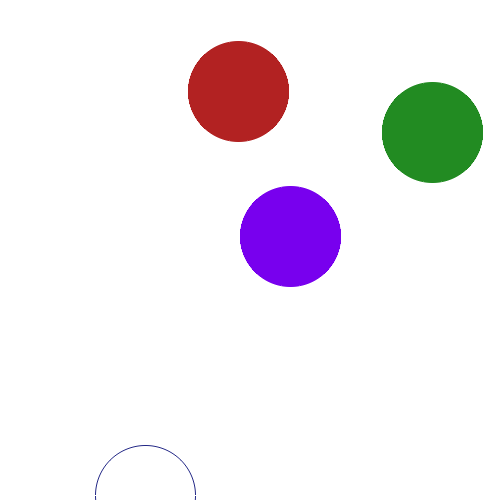

In [13]:
# The example of visualizing the saved test GIFs
from IPython.display import display, Image

# Display the GIF in Jupyter
display(Image(filename="imgs/easy_env.gif"))  # Change the file path to display yours


## Task 1.3: Plot the algorithm's performance in each environment

If all above code runs successfully, now we want to make a plot of the algorithm's training performance. You can run the code below to make plots. The training performance will look similar to this:

<p align="center">
  <figure style="display: inline-block; text-align: center; margin: 10px;">
    <img src="imgs/ppo_statistical_SandingEnvEasy.png" alt="PPO Easy Environment" width="240"/>
    <figcaption>PPO Easy</figcaption>
  </figure>
  <figure style="display: inline-block; text-align: center; margin: 10px;">
    <img src="imgs/ppo_statistical_SandingEnvMiddle.png" alt="PPO Middle Environment" width="240"/>
    <figcaption>PPO Middle</figcaption>
  </figure>
  <figure style="display: inline-block; text-align: center; margin: 10px;">
    <img src="imgs/ppo_statistical_SandingEnvDifficult.png" alt="PPO Difficult Environment" width="240"/>
    <figcaption>PPO Difficult</figcaption>
  </figure>
</p>
<p align="center">
  <figure style="display: inline-block; text-align: center; margin: 10px;">
    <img src="imgs/ddpg_statistical_SandingEnvEasy.png" alt="DDPG Easy Environment" width="240"/>
    <figcaption>DDPG Easy</figcaption>
  </figure>
  <figure style="display: inline-block; text-align: center; margin: 10px;">
    <img src="imgs/ddpg_statistical_SandingEnvMiddle.png" alt="DDPG Middle Environment" width="240"/>
    <figcaption>DDPG Middle</figcaption>
  </figure>
  <figure style="display: inline-block; text-align: center; margin: 10px;">
    <img src="imgs/ddpg_statistical_SandingEnvDifficult.png" alt="DDPG Difficult Environment" width="240"/>
    <figcaption>DDPG Difficult</figcaption>
  </figure>
</p>

**Note**: You do not need to make the plots look exactly the same as shown above.  The following code generates 3 figures (1 algorithm x 3 environments). Please comment below the algorithm you did not implement.

### Paths:
Your plot should be plotted in the following paths if the code runs successfully:

- **PPO Easy**: 
  - `results/SandingEnvMiddle/PPO/logging/figure_statistical_SandingEnvEasy.pdf`
- **PPO Middle**: 
  - `results/SandingEnvMiddle/PPO/logging/figure_statistical_SandingEnvMiddle.pdf`
- **PPO Difficult**: 
  - `results/SandingEnvMiddle/PPO/logging/figure_statistical_SandingEnvDifficult.pdf`
 
 or
 
- **DDPG Easy**: 
  - `results/SandingEnvMiddle/DDPG/logging/figure_statistical_SandingEnvEasy.pdf`
- **DDPG Middle**: 
  - `results/SandingEnvMiddle/DDPG/logging/figure_statistical_SandingEnvMiddle.pdf`
- **DDPG Difficult**: 
  - `results/SandingEnvMiddle/DDPG/logging/figure_statistical_SandingEnvDifficult.pdf`


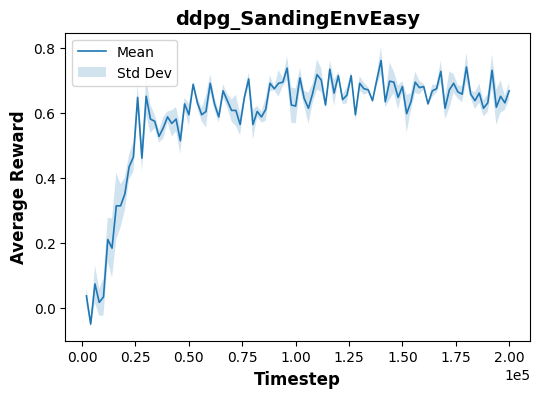

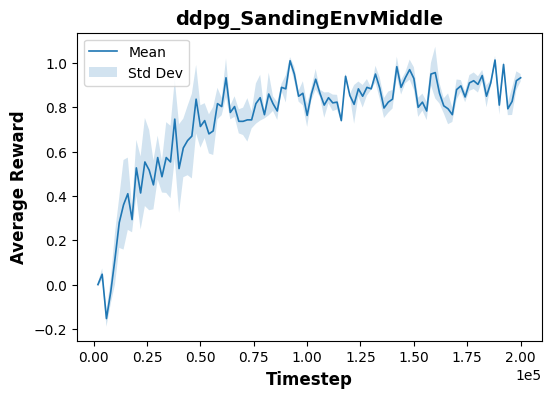

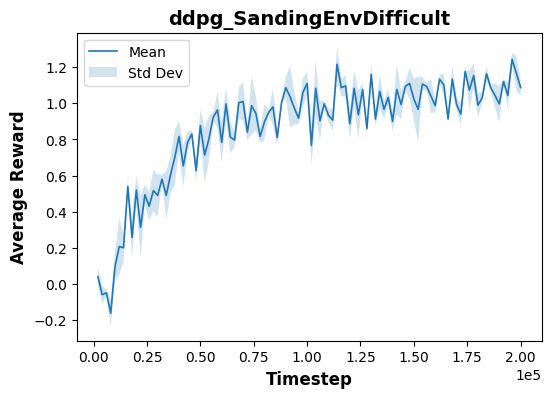

In [17]:
## Run the following code to plot PPO or DDPG's training performances
import warnings
warnings.filterwarnings('ignore')

# Uncomment the algorithm you chose 
implemented_algo ='ddpg' # 'ppo' or 'ddpg'


# Loop over the three difficulty levels
for environment in ['easy', 'middle', 'difficult']:

    training_seeds = []
    for i in range(3):
        config=setup(algo=implemented_algo, env=environment, render=False)

        config["seed"] = i
        training_seeds.append(i)


        if config["args"].algo_name == 'ppo':
            agent=PPOAgent(config)
        elif config["args"].algo_name == 'ddpg':
            agent=DDPGAgent(config)
        else:
            raise Exception('Please use ppo or ddpg!')

    # plot the statistical training curves with specific random seeds
    cu.plot_algorithm_training(agent.logging_dir, training_seeds, agent.env_name, implemented_algo)


DOUBLE CLICK HERE TO EDIT, RUN the above code to make training plots for each algorithm

<a id='T2'></a>
<div class="alert alert-warning">
    <h3><b>Student Task 2</b> (40 points)</h3>
    Your objective in this task is to enhance the performance of the DDPG/PPO algorithms, taking inspiration from the suggestions provided in Section 5.II. Carefully read the extension guidelines outlined in Section 5.II, and proceed to modify either 'ddpg_extension.py' or 'ppo_extension.py' located in the 'algos' folder. 

    1. You must elevate the base algorithm's performance to ensure the agent's success in the moderate difficulty environment (environment = 'middle'). 
    
    2. Please document your results here, including the training plots and test performance.
    
    3. Adhere to the given structure to facilitate testing with 'setup' and 'test'  function.
    
    4. If you choose PPO, implement 2 extensions. If you opt for DDPG, implement at least 1 extension.
    
    5. In cases where multiple extensions are implemented, conduct a thorough analysis to discern the performance variations between the different extensions.
</div>


## Task 2.1: Enhance Your Chosen Algorithm

### a) Overview
Improve the performance of your selected reinforcement learning algorithm. Ensure that your implementations are properly documented and organized for clarity.

### b) Implementation Details
- **Algorithm Improvements**: Enhance your chosen algorithm.
  - For PPO, implement **at least two extensions**.
  - For DDPG, implement **at least one extension**.
  - Ensure that the performance is noticeably improved.
  - Place your implementations in the appropriate file:
    - 'algo/ddpg_extension.py' for DDPG
    - 'algo/ppo_extension.py' for PPO

### c) Training
- **Random Seeds**: Train your algorithm using three distinct random seeds [0,1,2] to ensure robustness and repeatability.

### d) Evaluation
- **Environment**: Evaluate your algorithm exclusively in the **middle-level difficulty environment** to focus your improvements.

### e) Code Compatibility
- Ensure that your code is **fully compatible** with all existing functions in other files, maintaining the integrity of the overall project structure.

---



**Train**: After implementing the improvement extensions, run the following code to train your agents.

In [15]:
# Implement your improved algorithm either in algo/ddpg_extension.py or algo/ppo_extension.py
from algos.ddpg_extension import DDPGExtension
from algos.ppo_extension import PPOExtension

implemented_algo = 'ddpg_extension'# choose 'ppo_extension' or 'ddpg_extension'
environment = 'middle'

training_seeds = []
for i in range(3):
    config=setup(algo=implemented_algo, env=environment)

    config["seed"] = i
    training_seeds.append(i)


    if config["args"].algo_name == 'ppo_extension':
        agent=PPOExtension(config)
    elif config["args"].algo_name == 'ddpg_extension':
        agent=DDPGExtension(config)
    else:
        raise Exception('Please use ppo or ddpg!')

    # Train the agent using selected algorithm    
    agent.train()


Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4.
Moviepy - Writing video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4
Using DDPGExtension with TD3


Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4.
Moviepy - Writing video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4
Episode 0 Step 20 finished. Average episode return: 1.0
Episode 100 Step 2020 finished. Average episode return: 0.0
Episode 200 Step 4020 finished. Average episode return: 0.05
Episode 300 Step 6020 finished. Average episode return: -0.06
Episode 400 Step 8020 finished. Average episode return: -0.05
Episode 500 Step 10020 finished. Average episode return: 0.14
Episode 600 Step 12020 finished. Average episode return: 0.44
Episode 700 Step 14020 finished. Average episode return: 0.48
Episode 800 Step 16020 finished. Average episode return: 0.52
Episode 900 Step 18020 finished. Average episode return: 0.43
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Rein

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-1000.mp4
Episode 1000 Step 20020 finished. Average episode return: 0.64
Episode 1100 Step 22020 finished. Average episode return: 0.63
Episode 1200 Step 24020 finished. Average episode return: 0.76
Episode 1300 Step 26020 finished. Average episode return: 0.62
Episode 1400 Step 28020 finished. Average episode return: 0.65
Episode 1500 Step 30020 finished. Average episode return: 0.54
Episode 1600 Step 32020 finished. Average episode return: 0.55
Episode 1700 Step 34020 finished. Average episode return: 0.66
Episode 1800 Step 36020 finished. Average episode return: 0.67
Episode 1900 Step 38020 finished. Average episode return: 0.78
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearni

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-2000.mp4
Episode 2000 Step 40020 finished. Average episode return: 0.65
Episode 2100 Step 42020 finished. Average episode return: 0.71
Episode 2200 Step 44020 finished. Average episode return: 0.72
Episode 2300 Step 46020 finished. Average episode return: 0.61
Episode 2400 Step 48020 finished. Average episode return: 0.87
Episode 2500 Step 50020 finished. Average episode return: 0.77
Episode 2600 Step 52020 finished. Average episode return: 0.76
Episode 2700 Step 54020 finished. Average episode return: 0.87
Episode 2800 Step 56020 finished. Average episode return: 0.76
Episode 2900 Step 58020 finished. Average episode return: 0.89
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearni

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-3000.mp4
Episode 3000 Step 60020 finished. Average episode return: 0.92
Episode 3100 Step 62020 finished. Average episode return: 1.08
Episode 3200 Step 64020 finished. Average episode return: 0.82
Episode 3300 Step 66020 finished. Average episode return: 1.01
Episode 3400 Step 68020 finished. Average episode return: 0.94
Episode 3500 Step 70020 finished. Average episode return: 0.85
Episode 3600 Step 72020 finished. Average episode return: 0.92
Episode 3700 Step 74020 finished. Average episode return: 0.84
Episode 3800 Step 76020 finished. Average episode return: 0.88
Episode 3900 Step 78020 finished. Average episode return: 1.02
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearni

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-4000.mp4
Episode 4000 Step 80020 finished. Average episode return: 0.86
Episode 4100 Step 82020 finished. Average episode return: 0.97
Episode 4200 Step 84020 finished. Average episode return: 0.86
Episode 4300 Step 86020 finished. Average episode return: 0.93
Episode 4400 Step 88020 finished. Average episode return: 0.97
Episode 4500 Step 90020 finished. Average episode return: 0.82
Episode 4600 Step 92020 finished. Average episode return: 0.92
Episode 4700 Step 94020 finished. Average episode return: 0.94
Episode 4800 Step 96020 finished. Average episode return: 0.9
Episode 4900 Step 98020 finished. Average episode return: 0.88
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearnin

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-5000.mp4
Episode 5000 Step 100020 finished. Average episode return: 0.9
Episode 5100 Step 102020 finished. Average episode return: 0.91
Episode 5200 Step 104020 finished. Average episode return: 0.96
Episode 5300 Step 106020 finished. Average episode return: 0.93
Episode 5400 Step 108020 finished. Average episode return: 0.91
Episode 5500 Step 110020 finished. Average episode return: 0.84
Episode 5600 Step 112020 finished. Average episode return: 0.82
Episode 5700 Step 114020 finished. Average episode return: 0.95
Episode 5800 Step 116020 finished. Average episode return: 0.84
Episode 5900 Step 118020 finished. Average episode return: 0.9
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforceme

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-6000.mp4
Episode 6000 Step 120020 finished. Average episode return: 0.82
Episode 6100 Step 122020 finished. Average episode return: 0.91
Episode 6200 Step 124020 finished. Average episode return: 0.8
Episode 6300 Step 126020 finished. Average episode return: 0.94
Episode 6400 Step 128020 finished. Average episode return: 0.93
Episode 6500 Step 130020 finished. Average episode return: 1.0
Episode 6600 Step 132020 finished. Average episode return: 1.0
Episode 6700 Step 134020 finished. Average episode return: 0.86
Episode 6800 Step 136020 finished. Average episode return: 0.86
Episode 6900 Step 138020 finished. Average episode return: 0.84
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforcemen

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-7000.mp4
Episode 7000 Step 140020 finished. Average episode return: 0.91
Episode 7100 Step 142020 finished. Average episode return: 0.99
Episode 7200 Step 144020 finished. Average episode return: 0.91
Episode 7300 Step 146020 finished. Average episode return: 0.98
Episode 7400 Step 148020 finished. Average episode return: 0.96
Episode 7500 Step 150020 finished. Average episode return: 0.91
Episode 7600 Step 152020 finished. Average episode return: 0.73
Episode 7700 Step 154020 finished. Average episode return: 0.83
Episode 7800 Step 156020 finished. Average episode return: 0.91
Episode 7900 Step 158020 finished. Average episode return: 0.96
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforce

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-8000.mp4
Episode 8000 Step 160020 finished. Average episode return: 0.99
Episode 8100 Step 162020 finished. Average episode return: 0.88
Episode 8200 Step 164020 finished. Average episode return: 0.76
Episode 8300 Step 166020 finished. Average episode return: 0.88
Episode 8400 Step 168020 finished. Average episode return: 0.83
Episode 8500 Step 170020 finished. Average episode return: 0.9
Episode 8600 Step 172020 finished. Average episode return: 1.0
Episode 8700 Step 174020 finished. Average episode return: 0.83
Episode 8800 Step 176020 finished. Average episode return: 0.99
Episode 8900 Step 178020 finished. Average episode return: 0.92
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforceme

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-9000.mp4
Episode 9000 Step 180020 finished. Average episode return: 0.84
Episode 9100 Step 182020 finished. Average episode return: 0.84
Episode 9200 Step 184020 finished. Average episode return: 0.9
Episode 9300 Step 186020 finished. Average episode return: 0.92
Episode 9400 Step 188020 finished. Average episode return: 1.0
Episode 9500 Step 190020 finished. Average episode return: 0.76
Episode 9600 Step 192020 finished. Average episode return: 0.93
Episode 9700 Step 194020 finished. Average episode return: 0.89
Episode 9800 Step 196020 finished. Average episode return: 0.89
Episode 9900 Step 198020 finished. Average episode return: 0.93
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforceme

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-10000.mp4
Episode 10000 Step 200020 finished. Average episode return: 0.99
Saved model to /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/model/model_parameters_0.pt ...
logger and seed 0
/Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/logging/logs_0.csv
------ Training Finished ------
Total traning time is 6.118263086116591mins
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Proje

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4
Using DDPGExtension with TD3
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4.
Moviepy - Writing video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4
Episode 0 Step 20 finished. Average episode return: 0.0
Episode 100 Step 2020 finished. Average episode return: -0.04
Episode 200 Step 4020 finished. Average episode return: 0.02
Episode 300 Step 6020 finished. Average episode return: -0.05
Episode 400 Step 8020 finished. Average episode return: -0.05
Episode 500 Step 10020 finished. Average episode return: -0.18
Episode 600 Step 12020 finished. Average episode return: 0.17
Episode 700 Step 14020 finished. Average episode return: 0.22
Episode 800 Step 16020 finished. Average episode return: 0.18
Episode 900 Step 18020 finished. Average episode return: 0.0
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Re

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-1000.mp4
Episode 1000 Step 20020 finished. Average episode return: 0.17
Episode 1100 Step 22020 finished. Average episode return: 0.54
Episode 1200 Step 24020 finished. Average episode return: 0.43
Episode 1300 Step 26020 finished. Average episode return: 0.53
Episode 1400 Step 28020 finished. Average episode return: 0.5
Episode 1500 Step 30020 finished. Average episode return: 0.35
Episode 1600 Step 32020 finished. Average episode return: 0.53
Episode 1700 Step 34020 finished. Average episode return: 0.67
Episode 1800 Step 36020 finished. Average episode return: 0.48
Episode 1900 Step 38020 finished. Average episode return: 0.77
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearnin

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-2000.mp4
Episode 2000 Step 40020 finished. Average episode return: 0.69
Episode 2100 Step 42020 finished. Average episode return: 0.7
Episode 2200 Step 44020 finished. Average episode return: 0.78
Episode 2300 Step 46020 finished. Average episode return: 0.86
Episode 2400 Step 48020 finished. Average episode return: 0.85
Episode 2500 Step 50020 finished. Average episode return: 0.68
Episode 2600 Step 52020 finished. Average episode return: 0.79
Episode 2700 Step 54020 finished. Average episode return: 0.81
Episode 2800 Step 56020 finished. Average episode return: 0.88
Episode 2900 Step 58020 finished. Average episode return: 0.91
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearnin

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-3000.mp4
Episode 3000 Step 60020 finished. Average episode return: 0.88
Episode 3100 Step 62020 finished. Average episode return: 1.05
Episode 3200 Step 64020 finished. Average episode return: 0.89
Episode 3300 Step 66020 finished. Average episode return: 0.95
Episode 3400 Step 68020 finished. Average episode return: 0.83
Episode 3500 Step 70020 finished. Average episode return: 0.79
Episode 3600 Step 72020 finished. Average episode return: 0.88
Episode 3700 Step 74020 finished. Average episode return: 0.8
Episode 3800 Step 76020 finished. Average episode return: 0.84
Episode 3900 Step 78020 finished. Average episode return: 0.91
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearnin

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-4000.mp4
Episode 4000 Step 80020 finished. Average episode return: 0.9
Episode 4100 Step 82020 finished. Average episode return: 0.91
Episode 4200 Step 84020 finished. Average episode return: 0.85
Episode 4300 Step 86020 finished. Average episode return: 0.93
Episode 4400 Step 88020 finished. Average episode return: 1.04
Episode 4500 Step 90020 finished. Average episode return: 0.95
Episode 4600 Step 92020 finished. Average episode return: 0.96
Episode 4700 Step 94020 finished. Average episode return: 1.06
Episode 4800 Step 96020 finished. Average episode return: 0.9
Episode 4900 Step 98020 finished. Average episode return: 0.92
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-5000.mp4
Episode 5000 Step 100020 finished. Average episode return: 0.8
Episode 5100 Step 102020 finished. Average episode return: 0.94
Episode 5200 Step 104020 finished. Average episode return: 0.96
Episode 5300 Step 106020 finished. Average episode return: 0.92
Episode 5400 Step 108020 finished. Average episode return: 0.97
Episode 5500 Step 110020 finished. Average episode return: 0.96
Episode 5600 Step 112020 finished. Average episode return: 0.83
Episode 5700 Step 114020 finished. Average episode return: 0.86
Episode 5800 Step 116020 finished. Average episode return: 0.8
Episode 5900 Step 118020 finished. Average episode return: 1.04
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforceme

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-6000.mp4
Episode 6000 Step 120020 finished. Average episode return: 0.87
Episode 6100 Step 122020 finished. Average episode return: 0.96
Episode 6200 Step 124020 finished. Average episode return: 0.93
Episode 6300 Step 126020 finished. Average episode return: 1.02
Episode 6400 Step 128020 finished. Average episode return: 0.94
Episode 6500 Step 130020 finished. Average episode return: 0.94
Episode 6600 Step 132020 finished. Average episode return: 0.97
Episode 6700 Step 134020 finished. Average episode return: 0.9
Episode 6800 Step 136020 finished. Average episode return: 0.86
Episode 6900 Step 138020 finished. Average episode return: 0.86
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforcem

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-7000.mp4
Episode 7000 Step 140020 finished. Average episode return: 0.83
Episode 7100 Step 142020 finished. Average episode return: 0.98
Episode 7200 Step 144020 finished. Average episode return: 0.9
Episode 7300 Step 146020 finished. Average episode return: 1.0
Episode 7400 Step 148020 finished. Average episode return: 0.89
Episode 7500 Step 150020 finished. Average episode return: 1.03
Episode 7600 Step 152020 finished. Average episode return: 0.85
Episode 7700 Step 154020 finished. Average episode return: 0.98
Episode 7800 Step 156020 finished. Average episode return: 0.89
Episode 7900 Step 158020 finished. Average episode return: 1.07
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforceme

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-8000.mp4
Episode 8000 Step 160020 finished. Average episode return: 1.04
Episode 8100 Step 162020 finished. Average episode return: 0.93
Episode 8200 Step 164020 finished. Average episode return: 0.86
Episode 8300 Step 166020 finished. Average episode return: 0.87
Episode 8400 Step 168020 finished. Average episode return: 0.87
Episode 8500 Step 170020 finished. Average episode return: 0.94
Episode 8600 Step 172020 finished. Average episode return: 0.99
Episode 8700 Step 174020 finished. Average episode return: 0.85
Episode 8800 Step 176020 finished. Average episode return: 0.97
Episode 8900 Step 178020 finished. Average episode return: 1.01
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforce

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-9000.mp4
Episode 9000 Step 180020 finished. Average episode return: 0.91
Episode 9100 Step 182020 finished. Average episode return: 0.96
Episode 9200 Step 184020 finished. Average episode return: 0.91
Episode 9300 Step 186020 finished. Average episode return: 0.98
Episode 9400 Step 188020 finished. Average episode return: 1.04
Episode 9500 Step 190020 finished. Average episode return: 0.82
Episode 9600 Step 192020 finished. Average episode return: 1.0
Episode 9700 Step 194020 finished. Average episode return: 0.89
Episode 9800 Step 196020 finished. Average episode return: 0.84
Episode 9900 Step 198020 finished. Average episode return: 1.06
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforcem

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-10000.mp4
Episode 10000 Step 200020 finished. Average episode return: 0.95
Saved model to /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/model/model_parameters_1.pt ...
logger and seed 1
/Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/logging/logs_1.csv
------ Training Finished ------
Total traning time is 6.035283510416533mins
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Proje

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4
Using DDPGExtension with TD3
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4.
Moviepy - Writing video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4
Episode 0 Step 20 finished. Average episode return: 1.0
Episode 100 Step 2020 finished. Average episode return: 0.03
Episode 200 Step 4020 finished. Average episode return: 0.02
Episode 300 Step 6020 finished. Average episode return: -0.18
Episode 400 Step 8020 finished. Average episode return: -0.15
Episode 500 Step 10020 finished. Average episode return: -0.07
Episode 600 Step 12020 finished. Average episode return: 0.03
Episode 700 Step 14020 finished. Average episode return: 0.14
Episode 800 Step 16020 finished. Average episode return: 0.21
Episode 900 Step 18020 finished. Average episode return: 0.34
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Re

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-1000.mp4
Episode 1000 Step 20020 finished. Average episode return: 0.48
Episode 1100 Step 22020 finished. Average episode return: 0.53
Episode 1200 Step 24020 finished. Average episode return: 0.63
Episode 1300 Step 26020 finished. Average episode return: 0.61
Episode 1400 Step 28020 finished. Average episode return: 0.61
Episode 1500 Step 30020 finished. Average episode return: 0.7
Episode 1600 Step 32020 finished. Average episode return: 0.57
Episode 1700 Step 34020 finished. Average episode return: 0.56
Episode 1800 Step 36020 finished. Average episode return: 0.7
Episode 1900 Step 38020 finished. Average episode return: 0.73
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-2000.mp4
Episode 2000 Step 40020 finished. Average episode return: 0.74
Episode 2100 Step 42020 finished. Average episode return: 0.76
Episode 2200 Step 44020 finished. Average episode return: 0.84
Episode 2300 Step 46020 finished. Average episode return: 0.82
Episode 2400 Step 48020 finished. Average episode return: 1.06
Episode 2500 Step 50020 finished. Average episode return: 0.87
Episode 2600 Step 52020 finished. Average episode return: 0.74
Episode 2700 Step 54020 finished. Average episode return: 0.9
Episode 2800 Step 56020 finished. Average episode return: 0.71
Episode 2900 Step 58020 finished. Average episode return: 0.94
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearnin

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-3000.mp4
Episode 3000 Step 60020 finished. Average episode return: 0.84
Episode 3100 Step 62020 finished. Average episode return: 1.03
Episode 3200 Step 64020 finished. Average episode return: 0.83
Episode 3300 Step 66020 finished. Average episode return: 0.95
Episode 3400 Step 68020 finished. Average episode return: 0.81
Episode 3500 Step 70020 finished. Average episode return: 0.72
Episode 3600 Step 72020 finished. Average episode return: 0.83
Episode 3700 Step 74020 finished. Average episode return: 0.8
Episode 3800 Step 76020 finished. Average episode return: 0.86
Episode 3900 Step 78020 finished. Average episode return: 0.9
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-4000.mp4
Episode 4000 Step 80020 finished. Average episode return: 0.75
Episode 4100 Step 82020 finished. Average episode return: 0.85
Episode 4200 Step 84020 finished. Average episode return: 0.86
Episode 4300 Step 86020 finished. Average episode return: 0.82
Episode 4400 Step 88020 finished. Average episode return: 1.06
Episode 4500 Step 90020 finished. Average episode return: 0.91
Episode 4600 Step 92020 finished. Average episode return: 0.98
Episode 4700 Step 94020 finished. Average episode return: 1.01
Episode 4800 Step 96020 finished. Average episode return: 0.95
Episode 4900 Step 98020 finished. Average episode return: 0.93
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearni

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-5000.mp4
Episode 5000 Step 100020 finished. Average episode return: 0.81
Episode 5100 Step 102020 finished. Average episode return: 0.94
Episode 5200 Step 104020 finished. Average episode return: 1.04
Episode 5300 Step 106020 finished. Average episode return: 0.91
Episode 5400 Step 108020 finished. Average episode return: 0.87
Episode 5500 Step 110020 finished. Average episode return: 0.9
Episode 5600 Step 112020 finished. Average episode return: 0.9
Episode 5700 Step 114020 finished. Average episode return: 0.87
Episode 5800 Step 116020 finished. Average episode return: 0.79
Episode 5900 Step 118020 finished. Average episode return: 0.96
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforceme

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-6000.mp4
Episode 6000 Step 120020 finished. Average episode return: 0.98
Episode 6100 Step 122020 finished. Average episode return: 0.98
Episode 6200 Step 124020 finished. Average episode return: 0.91
Episode 6300 Step 126020 finished. Average episode return: 1.01
Episode 6400 Step 128020 finished. Average episode return: 0.95
Episode 6500 Step 130020 finished. Average episode return: 0.96
Episode 6600 Step 132020 finished. Average episode return: 0.98
Episode 6700 Step 134020 finished. Average episode return: 0.94
Episode 6800 Step 136020 finished. Average episode return: 0.78
Episode 6900 Step 138020 finished. Average episode return: 0.79
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforce

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-7000.mp4
Episode 7000 Step 140020 finished. Average episode return: 0.85
Episode 7100 Step 142020 finished. Average episode return: 0.92
Episode 7200 Step 144020 finished. Average episode return: 0.97
Episode 7300 Step 146020 finished. Average episode return: 0.9
Episode 7400 Step 148020 finished. Average episode return: 0.95
Episode 7500 Step 150020 finished. Average episode return: 1.04
Episode 7600 Step 152020 finished. Average episode return: 0.9
Episode 7700 Step 154020 finished. Average episode return: 0.88
Episode 7800 Step 156020 finished. Average episode return: 0.78
Episode 7900 Step 158020 finished. Average episode return: 0.76
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforceme

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-8000.mp4
Episode 8000 Step 160020 finished. Average episode return: 1.06
Episode 8100 Step 162020 finished. Average episode return: 0.9
Episode 8200 Step 164020 finished. Average episode return: 0.8
Episode 8300 Step 166020 finished. Average episode return: 0.76
Episode 8400 Step 168020 finished. Average episode return: 0.81
Episode 8500 Step 170020 finished. Average episode return: 0.8
Episode 8600 Step 172020 finished. Average episode return: 0.92
Episode 8700 Step 174020 finished. Average episode return: 0.92
Episode 8800 Step 176020 finished. Average episode return: 0.88
Episode 8900 Step 178020 finished. Average episode return: 0.85
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforcemen

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-9000.mp4
Episode 9000 Step 180020 finished. Average episode return: 0.92
Episode 9100 Step 182020 finished. Average episode return: 1.02
Episode 9200 Step 184020 finished. Average episode return: 0.96
Episode 9300 Step 186020 finished. Average episode return: 1.03
Episode 9400 Step 188020 finished. Average episode return: 1.07
Episode 9500 Step 190020 finished. Average episode return: 0.81
Episode 9600 Step 192020 finished. Average episode return: 0.93
Episode 9700 Step 194020 finished. Average episode return: 0.93
Episode 9800 Step 196020 finished. Average episode return: 0.92
Episode 9900 Step 198020 finished. Average episode return: 1.06
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforce

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-10000.mp4
Episode 10000 Step 200020 finished. Average episode return: 1.01
Saved model to /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/model/model_parameters_2.pt ...
logger and seed 2
/Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/logging/logs_2.csv
------ Training Finished ------
Total traning time is 6.158220939583407mins


In [21]:
## Code block for training and testing an agent using the implemented algorithm
## in the three different sanding environment versions with different difficulty levels

# Choose either PPO or DDPG
implemented_algo ='ddpg_extension'#'ppo' or 'ddpg'

# Loop over the three difficulty levels
for environment in ['easy', 'middle', 'difficult']:
    # environment = 'middle'
    training_seeds = []

    # Train the algorithm with a specific random seed.
    # In total, we train the algorithm with three random seeds [0, 1, 2].
    for i in range(3):
        config=setup(algo=implemented_algo, env=environment)

        config["seed"] = i
        training_seeds.append(i)

        if config["args"].algo_name == 'ppo_extension':
            agent=PPOExtension(config)
        elif config["args"].algo_name == 'ddpg_extension':
            agent=DDPGExtension(config)
        else:
            raise Exception('Please use ppo or ddpg!')

        # Train the agent using selected algorithm    
        agent.train()


Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-0.mp4.
Moviepy - Writing video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-0.mp4
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-0.mp4.
Moviepy - Writing video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-0.mp4


Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-0.mp4.
Moviepy - Writing video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-0.mp4
Episode 0 Step 20 finished. Average episode return: 1.0
Episode 100 Step 2020 finished. Average episode return: 0.03
Episode 200 Step 4020 finished. Average episode return: -0.01
Episode 300 Step 6020 finished. Average episode return: 0.02
Episode 400 Step 8020 finished. Average episode return: 0.04
Episode 500 Step 10020 finished. Average episode return: 0.01
Episode 600 Step 12020 finished. Average episode return: 0.01
Episode 700 Step 14020 finished. Average episode return: 0.09
Episode 800 Step 16020 finished. Average episode return: 0.22
Episode 900 Step 18020 finished. Average episode return: 0.23
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinfo

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-1000.mp4
Episode 1000 Step 20020 finished. Average episode return: 0.28
Episode 1100 Step 22020 finished. Average episode return: 0.53
Episode 1200 Step 24020 finished. Average episode return: 0.42
Episode 1300 Step 26020 finished. Average episode return: 0.61
Episode 1400 Step 28020 finished. Average episode return: 0.44
Episode 1500 Step 30020 finished. Average episode return: 0.63
Episode 1600 Step 32020 finished. Average episode return: 0.66
Episode 1700 Step 34020 finished. Average episode return: 0.5
Episode 1800 Step 36020 finished. Average episode return: 0.55
Episode 1900 Step 38020 finished. Average episode return: 0.58
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-2000.mp4
Episode 2000 Step 40020 finished. Average episode return: 0.55
Episode 2100 Step 42020 finished. Average episode return: 0.6
Episode 2200 Step 44020 finished. Average episode return: 0.62
Episode 2300 Step 46020 finished. Average episode return: 0.61
Episode 2400 Step 48020 finished. Average episode return: 0.59
Episode 2500 Step 50020 finished. Average episode return: 0.61
Episode 2600 Step 52020 finished. Average episode return: 0.65
Episode 2700 Step 54020 finished. Average episode return: 0.64
Episode 2800 Step 56020 finished. Average episode return: 0.64
Episode 2900 Step 58020 finished. Average episode return: 0.61
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-3000.mp4
Episode 3000 Step 60020 finished. Average episode return: 0.72
Episode 3100 Step 62020 finished. Average episode return: 0.59
Episode 3200 Step 64020 finished. Average episode return: 0.61
Episode 3300 Step 66020 finished. Average episode return: 0.64
Episode 3400 Step 68020 finished. Average episode return: 0.67
Episode 3500 Step 70020 finished. Average episode return: 0.64
Episode 3600 Step 72020 finished. Average episode return: 0.61
Episode 3700 Step 74020 finished. Average episode return: 0.6
Episode 3800 Step 76020 finished. Average episode return: 0.64
Episode 3900 Step 78020 finished. Average episode return: 0.71
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-4000.mp4
Episode 4000 Step 80020 finished. Average episode return: 0.59
Episode 4100 Step 82020 finished. Average episode return: 0.58
Episode 4200 Step 84020 finished. Average episode return: 0.6
Episode 4300 Step 86020 finished. Average episode return: 0.65
Episode 4400 Step 88020 finished. Average episode return: 0.65
Episode 4500 Step 90020 finished. Average episode return: 0.66
Episode 4600 Step 92020 finished. Average episode return: 0.63
Episode 4700 Step 94020 finished. Average episode return: 0.68
Episode 4800 Step 96020 finished. Average episode return: 0.75
Episode 4900 Step 98020 finished. Average episode return: 0.64
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-5000.mp4
Episode 5000 Step 100020 finished. Average episode return: 0.66
Episode 5100 Step 102020 finished. Average episode return: 0.69
Episode 5200 Step 104020 finished. Average episode return: 0.61
Episode 5300 Step 106020 finished. Average episode return: 0.67
Episode 5400 Step 108020 finished. Average episode return: 0.69
Episode 5500 Step 110020 finished. Average episode return: 0.7
Episode 5600 Step 112020 finished. Average episode return: 0.7
Episode 5700 Step 114020 finished. Average episode return: 0.64
Episode 5800 Step 116020 finished. Average episode return: 0.74
Episode 5900 Step 118020 finished. Average episode return: 0.6
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementL

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-6000.mp4
Episode 6000 Step 120020 finished. Average episode return: 0.69
Episode 6100 Step 122020 finished. Average episode return: 0.57
Episode 6200 Step 124020 finished. Average episode return: 0.64
Episode 6300 Step 126020 finished. Average episode return: 0.68
Episode 6400 Step 128020 finished. Average episode return: 0.62
Episode 6500 Step 130020 finished. Average episode return: 0.7
Episode 6600 Step 132020 finished. Average episode return: 0.67
Episode 6700 Step 134020 finished. Average episode return: 0.7
Episode 6800 Step 136020 finished. Average episode return: 0.66
Episode 6900 Step 138020 finished. Average episode return: 0.72
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforcement

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-7000.mp4
Episode 7000 Step 140020 finished. Average episode return: 0.75
Episode 7100 Step 142020 finished. Average episode return: 0.66
Episode 7200 Step 144020 finished. Average episode return: 0.61
Episode 7300 Step 146020 finished. Average episode return: 0.69
Episode 7400 Step 148020 finished. Average episode return: 0.68
Episode 7500 Step 150020 finished. Average episode return: 0.66
Episode 7600 Step 152020 finished. Average episode return: 0.57
Episode 7700 Step 154020 finished. Average episode return: 0.65
Episode 7800 Step 156020 finished. Average episode return: 0.65
Episode 7900 Step 158020 finished. Average episode return: 0.65
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforceme

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-8000.mp4
Episode 8000 Step 160020 finished. Average episode return: 0.7
Episode 8100 Step 162020 finished. Average episode return: 0.61
Episode 8200 Step 164020 finished. Average episode return: 0.64
Episode 8300 Step 166020 finished. Average episode return: 0.61
Episode 8400 Step 168020 finished. Average episode return: 0.7
Episode 8500 Step 170020 finished. Average episode return: 0.6
Episode 8600 Step 172020 finished. Average episode return: 0.61
Episode 8700 Step 174020 finished. Average episode return: 0.67
Episode 8800 Step 176020 finished. Average episode return: 0.62
Episode 8900 Step 178020 finished. Average episode return: 0.67
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementL

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-9000.mp4
Episode 9000 Step 180020 finished. Average episode return: 0.73
Episode 9100 Step 182020 finished. Average episode return: 0.64
Episode 9200 Step 184020 finished. Average episode return: 0.65
Episode 9300 Step 186020 finished. Average episode return: 0.62
Episode 9400 Step 188020 finished. Average episode return: 0.69
Episode 9500 Step 190020 finished. Average episode return: 0.64
Episode 9600 Step 192020 finished. Average episode return: 0.7
Episode 9700 Step 194020 finished. Average episode return: 0.7
Episode 9800 Step 196020 finished. Average episode return: 0.74
Episode 9900 Step 198020 finished. Average episode return: 0.66
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforcement

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-10000.mp4
Episode 10000 Step 200020 finished. Average episode return: 0.65
Saved model to /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/model/model_parameters_0.pt ...
logger and seed 0
/Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/logging/logs_0.csv
------ Training Finished ------
Total traning time is 5.990927700000005mins
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/res

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-0.mp4


Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-0.mp4.
Moviepy - Writing video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-0.mp4
Episode 0 Step 20 finished. Average episode return: 1.0
Episode 100 Step 2020 finished. Average episode return: -0.03
Episode 200 Step 4020 finished. Average episode return: 0.01
Episode 300 Step 6020 finished. Average episode return: 0.11
Episode 400 Step 8020 finished. Average episode return: 0.15
Episode 500 Step 10020 finished. Average episode return: 0.14
Episode 600 Step 12020 finished. Average episode return: 0.14
Episode 700 Step 14020 finished. Average episode return: 0.28
Episode 800 Step 16020 finished. Average episode return: 0.46
Episode 900 Step 18020 finished. Average episode return: 0.46
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinfo

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-1000.mp4
Episode 1000 Step 20020 finished. Average episode return: 0.43
Episode 1100 Step 22020 finished. Average episode return: 0.45
Episode 1200 Step 24020 finished. Average episode return: 0.47
Episode 1300 Step 26020 finished. Average episode return: 0.53
Episode 1400 Step 28020 finished. Average episode return: 0.4
Episode 1500 Step 30020 finished. Average episode return: 0.57
Episode 1600 Step 32020 finished. Average episode return: 0.58
Episode 1700 Step 34020 finished. Average episode return: 0.59
Episode 1800 Step 36020 finished. Average episode return: 0.54
Episode 1900 Step 38020 finished. Average episode return: 0.56
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-2000.mp4
Episode 2000 Step 40020 finished. Average episode return: 0.52
Episode 2100 Step 42020 finished. Average episode return: 0.55
Episode 2200 Step 44020 finished. Average episode return: 0.56
Episode 2300 Step 46020 finished. Average episode return: 0.55
Episode 2400 Step 48020 finished. Average episode return: 0.66
Episode 2500 Step 50020 finished. Average episode return: 0.57
Episode 2600 Step 52020 finished. Average episode return: 0.63
Episode 2700 Step 54020 finished. Average episode return: 0.59
Episode 2800 Step 56020 finished. Average episode return: 0.59
Episode 2900 Step 58020 finished. Average episode return: 0.59
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-3000.mp4
Episode 3000 Step 60020 finished. Average episode return: 0.72
Episode 3100 Step 62020 finished. Average episode return: 0.66
Episode 3200 Step 64020 finished. Average episode return: 0.58
Episode 3300 Step 66020 finished. Average episode return: 0.71
Episode 3400 Step 68020 finished. Average episode return: 0.61
Episode 3500 Step 70020 finished. Average episode return: 0.64
Episode 3600 Step 72020 finished. Average episode return: 0.55
Episode 3700 Step 74020 finished. Average episode return: 0.59
Episode 3800 Step 76020 finished. Average episode return: 0.6
Episode 3900 Step 78020 finished. Average episode return: 0.66
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-4000.mp4
Episode 4000 Step 80020 finished. Average episode return: 0.52
Episode 4100 Step 82020 finished. Average episode return: 0.61
Episode 4200 Step 84020 finished. Average episode return: 0.61
Episode 4300 Step 86020 finished. Average episode return: 0.58
Episode 4400 Step 88020 finished. Average episode return: 0.62
Episode 4500 Step 90020 finished. Average episode return: 0.66
Episode 4600 Step 92020 finished. Average episode return: 0.63
Episode 4700 Step 94020 finished. Average episode return: 0.62
Episode 4800 Step 96020 finished. Average episode return: 0.76
Episode 4900 Step 98020 finished. Average episode return: 0.69
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-5000.mp4
Episode 5000 Step 100020 finished. Average episode return: 0.61
Episode 5100 Step 102020 finished. Average episode return: 0.68
Episode 5200 Step 104020 finished. Average episode return: 0.62
Episode 5300 Step 106020 finished. Average episode return: 0.5
Episode 5400 Step 108020 finished. Average episode return: 0.66
Episode 5500 Step 110020 finished. Average episode return: 0.74
Episode 5600 Step 112020 finished. Average episode return: 0.68
Episode 5700 Step 114020 finished. Average episode return: 0.62
Episode 5800 Step 116020 finished. Average episode return: 0.74
Episode 5900 Step 118020 finished. Average episode return: 0.65
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforcemen

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-6000.mp4
Episode 6000 Step 120020 finished. Average episode return: 0.68
Episode 6100 Step 122020 finished. Average episode return: 0.66
Episode 6200 Step 124020 finished. Average episode return: 0.67
Episode 6300 Step 126020 finished. Average episode return: 0.69
Episode 6400 Step 128020 finished. Average episode return: 0.64
Episode 6500 Step 130020 finished. Average episode return: 0.64
Episode 6600 Step 132020 finished. Average episode return: 0.64
Episode 6700 Step 134020 finished. Average episode return: 0.63
Episode 6800 Step 136020 finished. Average episode return: 0.64
Episode 6900 Step 138020 finished. Average episode return: 0.66
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforceme

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-7000.mp4
Episode 7000 Step 140020 finished. Average episode return: 0.69
Episode 7100 Step 142020 finished. Average episode return: 0.66
Episode 7200 Step 144020 finished. Average episode return: 0.71
Episode 7300 Step 146020 finished. Average episode return: 0.68
Episode 7400 Step 148020 finished. Average episode return: 0.64
Episode 7500 Step 150020 finished. Average episode return: 0.62
Episode 7600 Step 152020 finished. Average episode return: 0.66
Episode 7700 Step 154020 finished. Average episode return: 0.63
Episode 7800 Step 156020 finished. Average episode return: 0.69
Episode 7900 Step 158020 finished. Average episode return: 0.69
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforceme

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-8000.mp4
Episode 8000 Step 160020 finished. Average episode return: 0.69
Episode 8100 Step 162020 finished. Average episode return: 0.62
Episode 8200 Step 164020 finished. Average episode return: 0.67
Episode 8300 Step 166020 finished. Average episode return: 0.65
Episode 8400 Step 168020 finished. Average episode return: 0.73
Episode 8500 Step 170020 finished. Average episode return: 0.61
Episode 8600 Step 172020 finished. Average episode return: 0.68
Episode 8700 Step 174020 finished. Average episode return: 0.7
Episode 8800 Step 176020 finished. Average episode return: 0.6
Episode 8900 Step 178020 finished. Average episode return: 0.63
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforcement

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-9000.mp4
Episode 9000 Step 180020 finished. Average episode return: 0.75
Episode 9100 Step 182020 finished. Average episode return: 0.67
Episode 9200 Step 184020 finished. Average episode return: 0.61
Episode 9300 Step 186020 finished. Average episode return: 0.68
Episode 9400 Step 188020 finished. Average episode return: 0.71
Episode 9500 Step 190020 finished. Average episode return: 0.64
Episode 9600 Step 192020 finished. Average episode return: 0.72
Episode 9700 Step 194020 finished. Average episode return: 0.65
Episode 9800 Step 196020 finished. Average episode return: 0.63
Episode 9900 Step 198020 finished. Average episode return: 0.65
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforceme

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-10000.mp4
Episode 10000 Step 200020 finished. Average episode return: 0.72
Saved model to /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/model/model_parameters_1.pt ...
logger and seed 1
/Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/logging/logs_1.csv
------ Training Finished ------
Total traning time is 5.9978465388999815mins
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/re

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-0.mp4
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-0.mp4.
Moviepy - Writing video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-0.mp4
Episode 0 Step 20 finished. Average episode return: 1.0
Episode 100 Step 2020 finished. Average episode return: -0.07
Episode 200 Step 4020 finished. Average episode return: -0.09
Episode 300 Step 6020 finished. Average episode return: -0.03
Episode 400 Step 8020 finished. Average episode return: -0.2
Episode 500 Step 10020 finished. Average episode return: -0.15
Episode 600 Step 12020 finished. Average episode return: -0.05
Episode 700 Step 14020 finished. Average episode return: -0.04
Episode 800 Step 16020 finished. Average episode return: 0.11
Episode 900 Step 18020 finished. Average episode return: 0.18
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/R

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-1000.mp4
Episode 1000 Step 20020 finished. Average episode return: 0.18
Episode 1100 Step 22020 finished. Average episode return: 0.11
Episode 1200 Step 24020 finished. Average episode return: 0.16
Episode 1300 Step 26020 finished. Average episode return: 0.23
Episode 1400 Step 28020 finished. Average episode return: 0.23
Episode 1500 Step 30020 finished. Average episode return: 0.37
Episode 1600 Step 32020 finished. Average episode return: 0.59
Episode 1700 Step 34020 finished. Average episode return: 0.5
Episode 1800 Step 36020 finished. Average episode return: 0.56
Episode 1900 Step 38020 finished. Average episode return: 0.56
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-2000.mp4
Episode 2000 Step 40020 finished. Average episode return: 0.57
Episode 2100 Step 42020 finished. Average episode return: 0.53
Episode 2200 Step 44020 finished. Average episode return: 0.58
Episode 2300 Step 46020 finished. Average episode return: 0.54
Episode 2400 Step 48020 finished. Average episode return: 0.66
Episode 2500 Step 50020 finished. Average episode return: 0.63
Episode 2600 Step 52020 finished. Average episode return: 0.6
Episode 2700 Step 54020 finished. Average episode return: 0.59
Episode 2800 Step 56020 finished. Average episode return: 0.53
Episode 2900 Step 58020 finished. Average episode return: 0.58
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-3000.mp4
Episode 3000 Step 60020 finished. Average episode return: 0.69
Episode 3100 Step 62020 finished. Average episode return: 0.55
Episode 3200 Step 64020 finished. Average episode return: 0.56
Episode 3300 Step 66020 finished. Average episode return: 0.69
Episode 3400 Step 68020 finished. Average episode return: 0.59
Episode 3500 Step 70020 finished. Average episode return: 0.6
Episode 3600 Step 72020 finished. Average episode return: 0.54
Episode 3700 Step 74020 finished. Average episode return: 0.55
Episode 3800 Step 76020 finished. Average episode return: 0.63
Episode 3900 Step 78020 finished. Average episode return: 0.76
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-4000.mp4
Episode 4000 Step 80020 finished. Average episode return: 0.57
Episode 4100 Step 82020 finished. Average episode return: 0.57
Episode 4200 Step 84020 finished. Average episode return: 0.57
Episode 4300 Step 86020 finished. Average episode return: 0.56
Episode 4400 Step 88020 finished. Average episode return: 0.63
Episode 4500 Step 90020 finished. Average episode return: 0.63
Episode 4600 Step 92020 finished. Average episode return: 0.68
Episode 4700 Step 94020 finished. Average episode return: 0.69
Episode 4800 Step 96020 finished. Average episode return: 0.72
Episode 4900 Step 98020 finished. Average episode return: 0.62
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-5000.mp4
Episode 5000 Step 100020 finished. Average episode return: 0.71
Episode 5100 Step 102020 finished. Average episode return: 0.72
Episode 5200 Step 104020 finished. Average episode return: 0.63
Episode 5300 Step 106020 finished. Average episode return: 0.63
Episode 5400 Step 108020 finished. Average episode return: 0.71
Episode 5500 Step 110020 finished. Average episode return: 0.8
Episode 5600 Step 112020 finished. Average episode return: 0.77
Episode 5700 Step 114020 finished. Average episode return: 0.58
Episode 5800 Step 116020 finished. Average episode return: 0.71
Episode 5900 Step 118020 finished. Average episode return: 0.64
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforcemen

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-6000.mp4
Episode 6000 Step 120020 finished. Average episode return: 0.66
Episode 6100 Step 122020 finished. Average episode return: 0.64
Episode 6200 Step 124020 finished. Average episode return: 0.68
Episode 6300 Step 126020 finished. Average episode return: 0.66
Episode 6400 Step 128020 finished. Average episode return: 0.58
Episode 6500 Step 130020 finished. Average episode return: 0.65
Episode 6600 Step 132020 finished. Average episode return: 0.57
Episode 6700 Step 134020 finished. Average episode return: 0.6
Episode 6800 Step 136020 finished. Average episode return: 0.59
Episode 6900 Step 138020 finished. Average episode return: 0.64
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforcemen

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-7000.mp4
Episode 7000 Step 140020 finished. Average episode return: 0.71
Episode 7100 Step 142020 finished. Average episode return: 0.62
Episode 7200 Step 144020 finished. Average episode return: 0.68
Episode 7300 Step 146020 finished. Average episode return: 0.7
Episode 7400 Step 148020 finished. Average episode return: 0.68
Episode 7500 Step 150020 finished. Average episode return: 0.64
Episode 7600 Step 152020 finished. Average episode return: 0.72
Episode 7700 Step 154020 finished. Average episode return: 0.65
Episode 7800 Step 156020 finished. Average episode return: 0.62
Episode 7900 Step 158020 finished. Average episode return: 0.68
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforcemen

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-8000.mp4
Episode 8000 Step 160020 finished. Average episode return: 0.68
Episode 8100 Step 162020 finished. Average episode return: 0.62
Episode 8200 Step 164020 finished. Average episode return: 0.64
Episode 8300 Step 166020 finished. Average episode return: 0.62
Episode 8400 Step 168020 finished. Average episode return: 0.69
Episode 8500 Step 170020 finished. Average episode return: 0.63
Episode 8600 Step 172020 finished. Average episode return: 0.63
Episode 8700 Step 174020 finished. Average episode return: 0.71
Episode 8800 Step 176020 finished. Average episode return: 0.59
Episode 8900 Step 178020 finished. Average episode return: 0.67
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforceme

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-9000.mp4
Episode 9000 Step 180020 finished. Average episode return: 0.69
Episode 9100 Step 182020 finished. Average episode return: 0.67
Episode 9200 Step 184020 finished. Average episode return: 0.59
Episode 9300 Step 186020 finished. Average episode return: 0.71
Episode 9400 Step 188020 finished. Average episode return: 0.66
Episode 9500 Step 190020 finished. Average episode return: 0.63
Episode 9600 Step 192020 finished. Average episode return: 0.7
Episode 9700 Step 194020 finished. Average episode return: 0.63
Episode 9800 Step 196020 finished. Average episode return: 0.7
Episode 9900 Step 198020 finished. Average episode return: 0.73
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforcement

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-10000.mp4
Episode 10000 Step 200020 finished. Average episode return: 0.64
Saved model to /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/model/model_parameters_2.pt ...
logger and seed 2
/Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvEasy/ddpg_extension/logging/logs_2.csv
------ Training Finished ------
Total traning time is 6.0130092652666765mins
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/re

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4.
Moviepy - Writing video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4
Episode 0 Step 20 finished. Average episode return: 1.0
Episode 100 Step 2020 finished. Average episode return: 0.0
Episode 200 Step 4020 finished. Average episode return: 0.05
Episode 300 Step 6020 finished. Average episode return: -0.06
Episode 400 Step 8020 finished. Average episode return: -0.05
Episode 500 Step 10020 finished. Average episode return: 0.14
Episode 600 Step 12020 finished. Average episode return: 0.44
Episode 700 Step 14020 finished. Average episode return: 0.48
Episode 800 Step 16020 finished. Average episode return: 0.52
Episode 900 Step 18020 finished. Average episode return: 0.43
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Rein

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-1000.mp4
Episode 1000 Step 20020 finished. Average episode return: 0.64
Episode 1100 Step 22020 finished. Average episode return: 0.63
Episode 1200 Step 24020 finished. Average episode return: 0.76
Episode 1300 Step 26020 finished. Average episode return: 0.62
Episode 1400 Step 28020 finished. Average episode return: 0.65
Episode 1500 Step 30020 finished. Average episode return: 0.54
Episode 1600 Step 32020 finished. Average episode return: 0.55
Episode 1700 Step 34020 finished. Average episode return: 0.66
Episode 1800 Step 36020 finished. Average episode return: 0.67
Episode 1900 Step 38020 finished. Average episode return: 0.78
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearni

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-2000.mp4
Episode 2000 Step 40020 finished. Average episode return: 0.65
Episode 2100 Step 42020 finished. Average episode return: 0.71
Episode 2200 Step 44020 finished. Average episode return: 0.72
Episode 2300 Step 46020 finished. Average episode return: 0.61
Episode 2400 Step 48020 finished. Average episode return: 0.87
Episode 2500 Step 50020 finished. Average episode return: 0.77
Episode 2600 Step 52020 finished. Average episode return: 0.76
Episode 2700 Step 54020 finished. Average episode return: 0.87
Episode 2800 Step 56020 finished. Average episode return: 0.76
Episode 2900 Step 58020 finished. Average episode return: 0.89
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearni

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-3000.mp4
Episode 3000 Step 60020 finished. Average episode return: 0.92
Episode 3100 Step 62020 finished. Average episode return: 1.08
Episode 3200 Step 64020 finished. Average episode return: 0.82
Episode 3300 Step 66020 finished. Average episode return: 1.01
Episode 3400 Step 68020 finished. Average episode return: 0.94
Episode 3500 Step 70020 finished. Average episode return: 0.85
Episode 3600 Step 72020 finished. Average episode return: 0.92
Episode 3700 Step 74020 finished. Average episode return: 0.84
Episode 3800 Step 76020 finished. Average episode return: 0.88
Episode 3900 Step 78020 finished. Average episode return: 1.02
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearni

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-4000.mp4
Episode 4000 Step 80020 finished. Average episode return: 0.86
Episode 4100 Step 82020 finished. Average episode return: 0.97
Episode 4200 Step 84020 finished. Average episode return: 0.86
Episode 4300 Step 86020 finished. Average episode return: 0.93
Episode 4400 Step 88020 finished. Average episode return: 0.97
Episode 4500 Step 90020 finished. Average episode return: 0.82
Episode 4600 Step 92020 finished. Average episode return: 0.92
Episode 4700 Step 94020 finished. Average episode return: 0.94
Episode 4800 Step 96020 finished. Average episode return: 0.9
Episode 4900 Step 98020 finished. Average episode return: 0.88
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearnin

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-5000.mp4
Episode 5000 Step 100020 finished. Average episode return: 0.9
Episode 5100 Step 102020 finished. Average episode return: 0.91
Episode 5200 Step 104020 finished. Average episode return: 0.96
Episode 5300 Step 106020 finished. Average episode return: 0.93
Episode 5400 Step 108020 finished. Average episode return: 0.91
Episode 5500 Step 110020 finished. Average episode return: 0.84
Episode 5600 Step 112020 finished. Average episode return: 0.82
Episode 5700 Step 114020 finished. Average episode return: 0.95
Episode 5800 Step 116020 finished. Average episode return: 0.84
Episode 5900 Step 118020 finished. Average episode return: 0.9
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforceme

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-6000.mp4
Episode 6000 Step 120020 finished. Average episode return: 0.82
Episode 6100 Step 122020 finished. Average episode return: 0.91
Episode 6200 Step 124020 finished. Average episode return: 0.8
Episode 6300 Step 126020 finished. Average episode return: 0.94
Episode 6400 Step 128020 finished. Average episode return: 0.93
Episode 6500 Step 130020 finished. Average episode return: 1.0
Episode 6600 Step 132020 finished. Average episode return: 1.0
Episode 6700 Step 134020 finished. Average episode return: 0.86
Episode 6800 Step 136020 finished. Average episode return: 0.86
Episode 6900 Step 138020 finished. Average episode return: 0.84
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforcemen

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-7000.mp4
Episode 7000 Step 140020 finished. Average episode return: 0.91
Episode 7100 Step 142020 finished. Average episode return: 0.99
Episode 7200 Step 144020 finished. Average episode return: 0.91
Episode 7300 Step 146020 finished. Average episode return: 0.98
Episode 7400 Step 148020 finished. Average episode return: 0.96
Episode 7500 Step 150020 finished. Average episode return: 0.91
Episode 7600 Step 152020 finished. Average episode return: 0.73
Episode 7700 Step 154020 finished. Average episode return: 0.83
Episode 7800 Step 156020 finished. Average episode return: 0.91
Episode 7900 Step 158020 finished. Average episode return: 0.96
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforce

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-8000.mp4
Episode 8000 Step 160020 finished. Average episode return: 0.99
Episode 8100 Step 162020 finished. Average episode return: 0.88
Episode 8200 Step 164020 finished. Average episode return: 0.76
Episode 8300 Step 166020 finished. Average episode return: 0.88
Episode 8400 Step 168020 finished. Average episode return: 0.83
Episode 8500 Step 170020 finished. Average episode return: 0.9
Episode 8600 Step 172020 finished. Average episode return: 1.0
Episode 8700 Step 174020 finished. Average episode return: 0.83
Episode 8800 Step 176020 finished. Average episode return: 0.99
Episode 8900 Step 178020 finished. Average episode return: 0.92
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforceme

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-9000.mp4
Episode 9000 Step 180020 finished. Average episode return: 0.84
Episode 9100 Step 182020 finished. Average episode return: 0.84
Episode 9200 Step 184020 finished. Average episode return: 0.9
Episode 9300 Step 186020 finished. Average episode return: 0.92
Episode 9400 Step 188020 finished. Average episode return: 1.0
Episode 9500 Step 190020 finished. Average episode return: 0.76
Episode 9600 Step 192020 finished. Average episode return: 0.93
Episode 9700 Step 194020 finished. Average episode return: 0.89
Episode 9800 Step 196020 finished. Average episode return: 0.89
Episode 9900 Step 198020 finished. Average episode return: 0.93
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforceme

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-10000.mp4
Episode 10000 Step 200020 finished. Average episode return: 0.99
Saved model to /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/model/model_parameters_0.pt ...
logger and seed 0
/Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/logging/logs_0.csv
------ Training Finished ------
Total traning time is 5.993054738883317mins
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Proje

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4.
Moviepy - Writing video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4
Episode 0 Step 20 finished. Average episode return: 0.0
Episode 100 Step 2020 finished. Average episode return: -0.04
Episode 200 Step 4020 finished. Average episode return: 0.02
Episode 300 Step 6020 finished. Average episode return: -0.05
Episode 400 Step 8020 finished. Average episode return: -0.05
Episode 500 Step 10020 finished. Average episode return: -0.18
Episode 600 Step 12020 finished. Average episode return: 0.17
Episode 700 Step 14020 finished. Average episode return: 0.22
Episode 800 Step 16020 finished. Average episode return: 0.18
Episode 900 Step 18020 finished. Average episode return: 0.0
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Re

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-1000.mp4
Episode 1000 Step 20020 finished. Average episode return: 0.17
Episode 1100 Step 22020 finished. Average episode return: 0.54
Episode 1200 Step 24020 finished. Average episode return: 0.43
Episode 1300 Step 26020 finished. Average episode return: 0.53
Episode 1400 Step 28020 finished. Average episode return: 0.5
Episode 1500 Step 30020 finished. Average episode return: 0.35
Episode 1600 Step 32020 finished. Average episode return: 0.53
Episode 1700 Step 34020 finished. Average episode return: 0.67
Episode 1800 Step 36020 finished. Average episode return: 0.48
Episode 1900 Step 38020 finished. Average episode return: 0.77
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearnin

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-2000.mp4
Episode 2000 Step 40020 finished. Average episode return: 0.69
Episode 2100 Step 42020 finished. Average episode return: 0.7
Episode 2200 Step 44020 finished. Average episode return: 0.78
Episode 2300 Step 46020 finished. Average episode return: 0.86
Episode 2400 Step 48020 finished. Average episode return: 0.85
Episode 2500 Step 50020 finished. Average episode return: 0.68
Episode 2600 Step 52020 finished. Average episode return: 0.79
Episode 2700 Step 54020 finished. Average episode return: 0.81
Episode 2800 Step 56020 finished. Average episode return: 0.88
Episode 2900 Step 58020 finished. Average episode return: 0.91
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearnin

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-3000.mp4
Episode 3000 Step 60020 finished. Average episode return: 0.88
Episode 3100 Step 62020 finished. Average episode return: 1.05
Episode 3200 Step 64020 finished. Average episode return: 0.89
Episode 3300 Step 66020 finished. Average episode return: 0.95
Episode 3400 Step 68020 finished. Average episode return: 0.83
Episode 3500 Step 70020 finished. Average episode return: 0.79
Episode 3600 Step 72020 finished. Average episode return: 0.88
Episode 3700 Step 74020 finished. Average episode return: 0.8
Episode 3800 Step 76020 finished. Average episode return: 0.84
Episode 3900 Step 78020 finished. Average episode return: 0.91
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearnin

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-4000.mp4
Episode 4000 Step 80020 finished. Average episode return: 0.9
Episode 4100 Step 82020 finished. Average episode return: 0.91
Episode 4200 Step 84020 finished. Average episode return: 0.85
Episode 4300 Step 86020 finished. Average episode return: 0.93
Episode 4400 Step 88020 finished. Average episode return: 1.04
Episode 4500 Step 90020 finished. Average episode return: 0.95
Episode 4600 Step 92020 finished. Average episode return: 0.96
Episode 4700 Step 94020 finished. Average episode return: 1.06
Episode 4800 Step 96020 finished. Average episode return: 0.9
Episode 4900 Step 98020 finished. Average episode return: 0.92
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-5000.mp4
Episode 5000 Step 100020 finished. Average episode return: 0.8
Episode 5100 Step 102020 finished. Average episode return: 0.94
Episode 5200 Step 104020 finished. Average episode return: 0.96
Episode 5300 Step 106020 finished. Average episode return: 0.92
Episode 5400 Step 108020 finished. Average episode return: 0.97
Episode 5500 Step 110020 finished. Average episode return: 0.96
Episode 5600 Step 112020 finished. Average episode return: 0.83
Episode 5700 Step 114020 finished. Average episode return: 0.86
Episode 5800 Step 116020 finished. Average episode return: 0.8
Episode 5900 Step 118020 finished. Average episode return: 1.04
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforceme

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-6000.mp4
Episode 6000 Step 120020 finished. Average episode return: 0.87
Episode 6100 Step 122020 finished. Average episode return: 0.96
Episode 6200 Step 124020 finished. Average episode return: 0.93
Episode 6300 Step 126020 finished. Average episode return: 1.02
Episode 6400 Step 128020 finished. Average episode return: 0.94
Episode 6500 Step 130020 finished. Average episode return: 0.94
Episode 6600 Step 132020 finished. Average episode return: 0.97
Episode 6700 Step 134020 finished. Average episode return: 0.9
Episode 6800 Step 136020 finished. Average episode return: 0.86
Episode 6900 Step 138020 finished. Average episode return: 0.86
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforcem

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-7000.mp4
Episode 7000 Step 140020 finished. Average episode return: 0.83
Episode 7100 Step 142020 finished. Average episode return: 0.98
Episode 7200 Step 144020 finished. Average episode return: 0.9
Episode 7300 Step 146020 finished. Average episode return: 1.0
Episode 7400 Step 148020 finished. Average episode return: 0.89
Episode 7500 Step 150020 finished. Average episode return: 1.03
Episode 7600 Step 152020 finished. Average episode return: 0.85
Episode 7700 Step 154020 finished. Average episode return: 0.98
Episode 7800 Step 156020 finished. Average episode return: 0.89
Episode 7900 Step 158020 finished. Average episode return: 1.07
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforceme

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-8000.mp4
Episode 8000 Step 160020 finished. Average episode return: 1.04
Episode 8100 Step 162020 finished. Average episode return: 0.93
Episode 8200 Step 164020 finished. Average episode return: 0.86
Episode 8300 Step 166020 finished. Average episode return: 0.87
Episode 8400 Step 168020 finished. Average episode return: 0.87
Episode 8500 Step 170020 finished. Average episode return: 0.94
Episode 8600 Step 172020 finished. Average episode return: 0.99
Episode 8700 Step 174020 finished. Average episode return: 0.85
Episode 8800 Step 176020 finished. Average episode return: 0.97
Episode 8900 Step 178020 finished. Average episode return: 1.01
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforce

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-9000.mp4
Episode 9000 Step 180020 finished. Average episode return: 0.91
Episode 9100 Step 182020 finished. Average episode return: 0.96
Episode 9200 Step 184020 finished. Average episode return: 0.91
Episode 9300 Step 186020 finished. Average episode return: 0.98
Episode 9400 Step 188020 finished. Average episode return: 1.04
Episode 9500 Step 190020 finished. Average episode return: 0.82
Episode 9600 Step 192020 finished. Average episode return: 1.0
Episode 9700 Step 194020 finished. Average episode return: 0.89
Episode 9800 Step 196020 finished. Average episode return: 0.84
Episode 9900 Step 198020 finished. Average episode return: 1.06
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforcem

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-10000.mp4
Episode 10000 Step 200020 finished. Average episode return: 0.95
Saved model to /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/model/model_parameters_1.pt ...
logger and seed 1
/Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/logging/logs_1.csv
------ Training Finished ------
Total traning time is 5.981896159033325mins
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Proje

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4


Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4.
Moviepy - Writing video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4
Episode 0 Step 20 finished. Average episode return: 1.0
Episode 100 Step 2020 finished. Average episode return: 0.03
Episode 200 Step 4020 finished. Average episode return: 0.02
Episode 300 Step 6020 finished. Average episode return: -0.18
Episode 400 Step 8020 finished. Average episode return: -0.15
Episode 500 Step 10020 finished. Average episode return: -0.07
Episode 600 Step 12020 finished. Average episode return: 0.03
Episode 700 Step 14020 finished. Average episode return: 0.14
Episode 800 Step 16020 finished. Average episode return: 0.21
Episode 900 Step 18020 finished. Average episode return: 0.34
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Re

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-1000.mp4
Episode 1000 Step 20020 finished. Average episode return: 0.48
Episode 1100 Step 22020 finished. Average episode return: 0.53
Episode 1200 Step 24020 finished. Average episode return: 0.63
Episode 1300 Step 26020 finished. Average episode return: 0.61
Episode 1400 Step 28020 finished. Average episode return: 0.61
Episode 1500 Step 30020 finished. Average episode return: 0.7
Episode 1600 Step 32020 finished. Average episode return: 0.57
Episode 1700 Step 34020 finished. Average episode return: 0.56
Episode 1800 Step 36020 finished. Average episode return: 0.7
Episode 1900 Step 38020 finished. Average episode return: 0.73
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-2000.mp4
Episode 2000 Step 40020 finished. Average episode return: 0.74
Episode 2100 Step 42020 finished. Average episode return: 0.76
Episode 2200 Step 44020 finished. Average episode return: 0.84
Episode 2300 Step 46020 finished. Average episode return: 0.82
Episode 2400 Step 48020 finished. Average episode return: 1.06
Episode 2500 Step 50020 finished. Average episode return: 0.87
Episode 2600 Step 52020 finished. Average episode return: 0.74
Episode 2700 Step 54020 finished. Average episode return: 0.9
Episode 2800 Step 56020 finished. Average episode return: 0.71
Episode 2900 Step 58020 finished. Average episode return: 0.94
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearnin

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-3000.mp4
Episode 3000 Step 60020 finished. Average episode return: 0.84
Episode 3100 Step 62020 finished. Average episode return: 1.03
Episode 3200 Step 64020 finished. Average episode return: 0.83
Episode 3300 Step 66020 finished. Average episode return: 0.95
Episode 3400 Step 68020 finished. Average episode return: 0.81
Episode 3500 Step 70020 finished. Average episode return: 0.72
Episode 3600 Step 72020 finished. Average episode return: 0.83
Episode 3700 Step 74020 finished. Average episode return: 0.8
Episode 3800 Step 76020 finished. Average episode return: 0.86
Episode 3900 Step 78020 finished. Average episode return: 0.9
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-4000.mp4
Episode 4000 Step 80020 finished. Average episode return: 0.75
Episode 4100 Step 82020 finished. Average episode return: 0.85
Episode 4200 Step 84020 finished. Average episode return: 0.86
Episode 4300 Step 86020 finished. Average episode return: 0.82
Episode 4400 Step 88020 finished. Average episode return: 1.06
Episode 4500 Step 90020 finished. Average episode return: 0.91
Episode 4600 Step 92020 finished. Average episode return: 0.98
Episode 4700 Step 94020 finished. Average episode return: 1.01
Episode 4800 Step 96020 finished. Average episode return: 0.95
Episode 4900 Step 98020 finished. Average episode return: 0.93
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearni

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-5000.mp4
Episode 5000 Step 100020 finished. Average episode return: 0.81
Episode 5100 Step 102020 finished. Average episode return: 0.94
Episode 5200 Step 104020 finished. Average episode return: 1.04
Episode 5300 Step 106020 finished. Average episode return: 0.91
Episode 5400 Step 108020 finished. Average episode return: 0.87
Episode 5500 Step 110020 finished. Average episode return: 0.9
Episode 5600 Step 112020 finished. Average episode return: 0.9
Episode 5700 Step 114020 finished. Average episode return: 0.87
Episode 5800 Step 116020 finished. Average episode return: 0.79
Episode 5900 Step 118020 finished. Average episode return: 0.96
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforceme

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-6000.mp4
Episode 6000 Step 120020 finished. Average episode return: 0.98
Episode 6100 Step 122020 finished. Average episode return: 0.98
Episode 6200 Step 124020 finished. Average episode return: 0.91
Episode 6300 Step 126020 finished. Average episode return: 1.01
Episode 6400 Step 128020 finished. Average episode return: 0.95
Episode 6500 Step 130020 finished. Average episode return: 0.96
Episode 6600 Step 132020 finished. Average episode return: 0.98
Episode 6700 Step 134020 finished. Average episode return: 0.94
Episode 6800 Step 136020 finished. Average episode return: 0.78
Episode 6900 Step 138020 finished. Average episode return: 0.79
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforce

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-7000.mp4
Episode 7000 Step 140020 finished. Average episode return: 0.85
Episode 7100 Step 142020 finished. Average episode return: 0.92
Episode 7200 Step 144020 finished. Average episode return: 0.97
Episode 7300 Step 146020 finished. Average episode return: 0.9
Episode 7400 Step 148020 finished. Average episode return: 0.95
Episode 7500 Step 150020 finished. Average episode return: 1.04
Episode 7600 Step 152020 finished. Average episode return: 0.9
Episode 7700 Step 154020 finished. Average episode return: 0.88
Episode 7800 Step 156020 finished. Average episode return: 0.78
Episode 7900 Step 158020 finished. Average episode return: 0.76
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforceme

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-8000.mp4
Episode 8000 Step 160020 finished. Average episode return: 1.06
Episode 8100 Step 162020 finished. Average episode return: 0.9
Episode 8200 Step 164020 finished. Average episode return: 0.8
Episode 8300 Step 166020 finished. Average episode return: 0.76
Episode 8400 Step 168020 finished. Average episode return: 0.81
Episode 8500 Step 170020 finished. Average episode return: 0.8
Episode 8600 Step 172020 finished. Average episode return: 0.92
Episode 8700 Step 174020 finished. Average episode return: 0.92
Episode 8800 Step 176020 finished. Average episode return: 0.88
Episode 8900 Step 178020 finished. Average episode return: 0.85
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforcemen

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-9000.mp4
Episode 9000 Step 180020 finished. Average episode return: 0.92
Episode 9100 Step 182020 finished. Average episode return: 1.02
Episode 9200 Step 184020 finished. Average episode return: 0.96
Episode 9300 Step 186020 finished. Average episode return: 1.03
Episode 9400 Step 188020 finished. Average episode return: 1.07
Episode 9500 Step 190020 finished. Average episode return: 0.81
Episode 9600 Step 192020 finished. Average episode return: 0.93
Episode 9700 Step 194020 finished. Average episode return: 0.93
Episode 9800 Step 196020 finished. Average episode return: 0.92
Episode 9900 Step 198020 finished. Average episode return: 1.06
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforce

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-10000.mp4
Episode 10000 Step 200020 finished. Average episode return: 1.01
Saved model to /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/model/model_parameters_2.pt ...
logger and seed 2
/Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/logging/logs_2.csv
------ Training Finished ------
Total traning time is 5.988655445133342mins
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Proje

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-0.mp4
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-0.mp4.
Moviepy - Writing video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-0.mp4
Episode 0 Step 20 finished. Average episode return: 0.0
Episode 100 Step 2020 finished. Average episode return: 0.07
Episode 200 Step 4020 finished. Average episode return: 0.0
Episode 300 Step 6020 finished. Average episode return: -0.05
Episode 400 Step 8020 finished. Average episode return: 0.17
Episode 500 Step 10020 finished. Average episode return: 0.0
Episode 600 Step 12020 finished. Average episode return: 0.27
Episode 700 Step 14020 finished. Average episode return: 0.14
Episode 800 Step 16020 finished. Average episode return: 0.27
Episode 900 Step 18020 finished. Average episode return: 0.09
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Rei

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-1000.mp4
Episode 1000 Step 20020 finished. Average episode return: 0.38
Episode 1100 Step 22020 finished. Average episode return: 0.34
Episode 1200 Step 24020 finished. Average episode return: 0.32
Episode 1300 Step 26020 finished. Average episode return: 0.36
Episode 1400 Step 28020 finished. Average episode return: 0.57
Episode 1500 Step 30020 finished. Average episode return: 0.37
Episode 1600 Step 32020 finished. Average episode return: 0.29
Episode 1700 Step 34020 finished. Average episode return: 0.48
Episode 1800 Step 36020 finished. Average episode return: 0.57
Episode 1900 Step 38020 finished. Average episode return: 0.57
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLea

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-2000.mp4
Episode 2000 Step 40020 finished. Average episode return: 0.65
Episode 2100 Step 42020 finished. Average episode return: 0.58
Episode 2200 Step 44020 finished. Average episode return: 0.67
Episode 2300 Step 46020 finished. Average episode return: 0.54
Episode 2400 Step 48020 finished. Average episode return: 0.58
Episode 2500 Step 50020 finished. Average episode return: 0.7
Episode 2600 Step 52020 finished. Average episode return: 0.86
Episode 2700 Step 54020 finished. Average episode return: 0.61
Episode 2800 Step 56020 finished. Average episode return: 0.69
Episode 2900 Step 58020 finished. Average episode return: 0.78
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLear

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-3000.mp4
Episode 3000 Step 60020 finished. Average episode return: 0.89
Episode 3100 Step 62020 finished. Average episode return: 0.87
Episode 3200 Step 64020 finished. Average episode return: 0.75
Episode 3300 Step 66020 finished. Average episode return: 0.6
Episode 3400 Step 68020 finished. Average episode return: 0.81
Episode 3500 Step 70020 finished. Average episode return: 0.92
Episode 3600 Step 72020 finished. Average episode return: 0.81
Episode 3700 Step 74020 finished. Average episode return: 0.88
Episode 3800 Step 76020 finished. Average episode return: 0.71
Episode 3900 Step 78020 finished. Average episode return: 0.93
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLear

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-4000.mp4
Episode 4000 Step 80020 finished. Average episode return: 0.87
Episode 4100 Step 82020 finished. Average episode return: 0.87
Episode 4200 Step 84020 finished. Average episode return: 1.11
Episode 4300 Step 86020 finished. Average episode return: 0.67
Episode 4400 Step 88020 finished. Average episode return: 0.8
Episode 4500 Step 90020 finished. Average episode return: 1.03
Episode 4600 Step 92020 finished. Average episode return: 1.0
Episode 4700 Step 94020 finished. Average episode return: 0.95
Episode 4800 Step 96020 finished. Average episode return: 0.9
Episode 4900 Step 98020 finished. Average episode return: 0.94
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearni

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-5000.mp4
Episode 5000 Step 100020 finished. Average episode return: 1.05
Episode 5100 Step 102020 finished. Average episode return: 0.7
Episode 5200 Step 104020 finished. Average episode return: 0.99
Episode 5300 Step 106020 finished. Average episode return: 0.89
Episode 5400 Step 108020 finished. Average episode return: 0.9
Episode 5500 Step 110020 finished. Average episode return: 0.99
Episode 5600 Step 112020 finished. Average episode return: 0.93
Episode 5700 Step 114020 finished. Average episode return: 1.0
Episode 5800 Step 116020 finished. Average episode return: 0.98
Episode 5900 Step 118020 finished. Average episode return: 1.15
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforce

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-6000.mp4
Episode 6000 Step 120020 finished. Average episode return: 0.96
Episode 6100 Step 122020 finished. Average episode return: 0.98
Episode 6200 Step 124020 finished. Average episode return: 1.11
Episode 6300 Step 126020 finished. Average episode return: 1.16
Episode 6400 Step 128020 finished. Average episode return: 0.92
Episode 6500 Step 130020 finished. Average episode return: 1.19
Episode 6600 Step 132020 finished. Average episode return: 0.81
Episode 6700 Step 134020 finished. Average episode return: 1.02
Episode 6800 Step 136020 finished. Average episode return: 1.0
Episode 6900 Step 138020 finished. Average episode return: 1.08
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinfor

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-7000.mp4
Episode 7000 Step 140020 finished. Average episode return: 1.29
Episode 7100 Step 142020 finished. Average episode return: 1.29
Episode 7200 Step 144020 finished. Average episode return: 1.03
Episode 7300 Step 146020 finished. Average episode return: 1.07
Episode 7400 Step 148020 finished. Average episode return: 1.22
Episode 7500 Step 150020 finished. Average episode return: 1.01
Episode 7600 Step 152020 finished. Average episode return: 1.11
Episode 7700 Step 154020 finished. Average episode return: 1.12
Episode 7800 Step 156020 finished. Average episode return: 1.33
Episode 7900 Step 158020 finished. Average episode return: 1.12
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinfo

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-8000.mp4
Episode 8000 Step 160020 finished. Average episode return: 1.08
Episode 8100 Step 162020 finished. Average episode return: 1.19
Episode 8200 Step 164020 finished. Average episode return: 1.11
Episode 8300 Step 166020 finished. Average episode return: 1.03
Episode 8400 Step 168020 finished. Average episode return: 1.09
Episode 8500 Step 170020 finished. Average episode return: 0.82
Episode 8600 Step 172020 finished. Average episode return: 1.04
Episode 8700 Step 174020 finished. Average episode return: 1.12
Episode 8800 Step 176020 finished. Average episode return: 1.19
Episode 8900 Step 178020 finished. Average episode return: 1.27
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinfo

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-9000.mp4
Episode 9000 Step 180020 finished. Average episode return: 0.86
Episode 9100 Step 182020 finished. Average episode return: 1.01
Episode 9200 Step 184020 finished. Average episode return: 1.25
Episode 9300 Step 186020 finished. Average episode return: 1.19
Episode 9400 Step 188020 finished. Average episode return: 0.81
Episode 9500 Step 190020 finished. Average episode return: 0.96
Episode 9600 Step 192020 finished. Average episode return: 1.13
Episode 9700 Step 194020 finished. Average episode return: 1.12
Episode 9800 Step 196020 finished. Average episode return: 1.24
Episode 9900 Step 198020 finished. Average episode return: 1.16
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinfo

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-10000.mp4
Episode 10000 Step 200020 finished. Average episode return: 1.07
Saved model to /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/model/model_parameters_0.pt ...
logger and seed 0
/Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/logging/logs_0.csv
------ Training Finished ------
Total traning time is 6.169501471533355mins
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learn

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-0.mp4


Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-0.mp4.
Moviepy - Writing video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-0.mp4
Episode 0 Step 20 finished. Average episode return: 0.0
Episode 100 Step 2020 finished. Average episode return: 0.11
Episode 200 Step 4020 finished. Average episode return: -0.17
Episode 300 Step 6020 finished. Average episode return: -0.03
Episode 400 Step 8020 finished. Average episode return: -0.23
Episode 500 Step 10020 finished. Average episode return: 0.16
Episode 600 Step 12020 finished. Average episode return: 0.38
Episode 700 Step 14020 finished. Average episode return: 0.36
Episode 800 Step 16020 finished. Average episode return: 0.62
Episode 900 Step 18020 finished. Average episode return: 0.26
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-1000.mp4
Episode 1000 Step 20020 finished. Average episode return: 0.5
Episode 1100 Step 22020 finished. Average episode return: 0.41
Episode 1200 Step 24020 finished. Average episode return: 0.14
Episode 1300 Step 26020 finished. Average episode return: 0.4
Episode 1400 Step 28020 finished. Average episode return: 0.23
Episode 1500 Step 30020 finished. Average episode return: 0.46
Episode 1600 Step 32020 finished. Average episode return: 0.25
Episode 1700 Step 34020 finished. Average episode return: 0.71
Episode 1800 Step 36020 finished. Average episode return: 0.65
Episode 1900 Step 38020 finished. Average episode return: 0.54
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearn

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-2000.mp4
Episode 2000 Step 40020 finished. Average episode return: 0.72
Episode 2100 Step 42020 finished. Average episode return: 0.59
Episode 2200 Step 44020 finished. Average episode return: 0.63
Episode 2300 Step 46020 finished. Average episode return: 0.77
Episode 2400 Step 48020 finished. Average episode return: 0.83
Episode 2500 Step 50020 finished. Average episode return: 0.93
Episode 2600 Step 52020 finished. Average episode return: 0.94
Episode 2700 Step 54020 finished. Average episode return: 0.98
Episode 2800 Step 56020 finished. Average episode return: 0.97
Episode 2900 Step 58020 finished. Average episode return: 1.07
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLea

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-3000.mp4
Episode 3000 Step 60020 finished. Average episode return: 0.82
Episode 3100 Step 62020 finished. Average episode return: 1.15
Episode 3200 Step 64020 finished. Average episode return: 0.86
Episode 3300 Step 66020 finished. Average episode return: 1.03
Episode 3400 Step 68020 finished. Average episode return: 1.14
Episode 3500 Step 70020 finished. Average episode return: 1.27
Episode 3600 Step 72020 finished. Average episode return: 0.89
Episode 3700 Step 74020 finished. Average episode return: 0.87
Episode 3800 Step 76020 finished. Average episode return: 1.09
Episode 3900 Step 78020 finished. Average episode return: 0.91
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLea

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-4000.mp4
Episode 4000 Step 80020 finished. Average episode return: 0.92
Episode 4100 Step 82020 finished. Average episode return: 0.97
Episode 4200 Step 84020 finished. Average episode return: 0.9
Episode 4300 Step 86020 finished. Average episode return: 0.85
Episode 4400 Step 88020 finished. Average episode return: 1.06
Episode 4500 Step 90020 finished. Average episode return: 1.22
Episode 4600 Step 92020 finished. Average episode return: 1.13
Episode 4700 Step 94020 finished. Average episode return: 1.14
Episode 4800 Step 96020 finished. Average episode return: 0.93
Episode 4900 Step 98020 finished. Average episode return: 1.02
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLear

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-5000.mp4
Episode 5000 Step 100020 finished. Average episode return: 1.24
Episode 5100 Step 102020 finished. Average episode return: 0.83
Episode 5200 Step 104020 finished. Average episode return: 1.1
Episode 5300 Step 106020 finished. Average episode return: 0.95
Episode 5400 Step 108020 finished. Average episode return: 0.94
Episode 5500 Step 110020 finished. Average episode return: 1.11
Episode 5600 Step 112020 finished. Average episode return: 1.03
Episode 5700 Step 114020 finished. Average episode return: 1.33
Episode 5800 Step 116020 finished. Average episode return: 1.19
Episode 5900 Step 118020 finished. Average episode return: 1.3
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforc

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-6000.mp4
Episode 6000 Step 120020 finished. Average episode return: 0.94
Episode 6100 Step 122020 finished. Average episode return: 0.95
Episode 6200 Step 124020 finished. Average episode return: 1.11
Episode 6300 Step 126020 finished. Average episode return: 1.1
Episode 6400 Step 128020 finished. Average episode return: 1.09
Episode 6500 Step 130020 finished. Average episode return: 1.32
Episode 6600 Step 132020 finished. Average episode return: 1.01
Episode 6700 Step 134020 finished. Average episode return: 1.14
Episode 6800 Step 136020 finished. Average episode return: 1.11
Episode 6900 Step 138020 finished. Average episode return: 1.19
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinfor

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-7000.mp4
Episode 7000 Step 140020 finished. Average episode return: 1.08
Episode 7100 Step 142020 finished. Average episode return: 1.4
Episode 7200 Step 144020 finished. Average episode return: 1.13
Episode 7300 Step 146020 finished. Average episode return: 1.13
Episode 7400 Step 148020 finished. Average episode return: 1.26
Episode 7500 Step 150020 finished. Average episode return: 1.17
Episode 7600 Step 152020 finished. Average episode return: 1.01
Episode 7700 Step 154020 finished. Average episode return: 1.0
Episode 7800 Step 156020 finished. Average episode return: 1.17
Episode 7900 Step 158020 finished. Average episode return: 0.99
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforc

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-8000.mp4
Episode 8000 Step 160020 finished. Average episode return: 1.14
Episode 8100 Step 162020 finished. Average episode return: 1.26
Episode 8200 Step 164020 finished. Average episode return: 1.13
Episode 8300 Step 166020 finished. Average episode return: 0.93
Episode 8400 Step 168020 finished. Average episode return: 1.22
Episode 8500 Step 170020 finished. Average episode return: 1.12
Episode 8600 Step 172020 finished. Average episode return: 0.96
Episode 8700 Step 174020 finished. Average episode return: 1.14
Episode 8800 Step 176020 finished. Average episode return: 1.18
Episode 8900 Step 178020 finished. Average episode return: 1.28
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinfo

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-9000.mp4
Episode 9000 Step 180020 finished. Average episode return: 0.97
Episode 9100 Step 182020 finished. Average episode return: 1.18
Episode 9200 Step 184020 finished. Average episode return: 1.09
Episode 9300 Step 186020 finished. Average episode return: 1.34
Episode 9400 Step 188020 finished. Average episode return: 0.97
Episode 9500 Step 190020 finished. Average episode return: 1.07
Episode 9600 Step 192020 finished. Average episode return: 1.15
Episode 9700 Step 194020 finished. Average episode return: 1.09
Episode 9800 Step 196020 finished. Average episode return: 1.29
Episode 9900 Step 198020 finished. Average episode return: 1.25
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinfo

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-10000.mp4
Episode 10000 Step 200020 finished. Average episode return: 1.09
Saved model to /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/model/model_parameters_1.pt ...
logger and seed 1
/Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/logging/logs_1.csv
------ Training Finished ------
Total traning time is 6.202952150699972mins
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learn

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-0.mp4


Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-0.mp4.
Moviepy - Writing video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-0.mp4
Episode 0 Step 20 finished. Average episode return: -1.0
Episode 100 Step 2020 finished. Average episode return: 0.04
Episode 200 Step 4020 finished. Average episode return: 0.02
Episode 300 Step 6020 finished. Average episode return: 0.23
Episode 400 Step 8020 finished. Average episode return: 0.07
Episode 500 Step 10020 finished. Average episode return: -0.06
Episode 600 Step 12020 finished. Average episode return: 0.13
Episode 700 Step 14020 finished. Average episode return: -0.01
Episode 800 Step 16020 finished. Average episode return: 0.32
Episode 900 Step 18020 finished. Average episode return: 0.45
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-1000.mp4
Episode 1000 Step 20020 finished. Average episode return: 0.3
Episode 1100 Step 22020 finished. Average episode return: 0.36
Episode 1200 Step 24020 finished. Average episode return: 0.46
Episode 1300 Step 26020 finished. Average episode return: 0.56
Episode 1400 Step 28020 finished. Average episode return: 0.44
Episode 1500 Step 30020 finished. Average episode return: 0.47
Episode 1600 Step 32020 finished. Average episode return: 0.56
Episode 1700 Step 34020 finished. Average episode return: 0.5
Episode 1800 Step 36020 finished. Average episode return: 0.61
Episode 1900 Step 38020 finished. Average episode return: 0.63
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearn

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-2000.mp4
Episode 2000 Step 40020 finished. Average episode return: 0.57
Episode 2100 Step 42020 finished. Average episode return: 0.66
Episode 2200 Step 44020 finished. Average episode return: 0.61
Episode 2300 Step 46020 finished. Average episode return: 0.49
Episode 2400 Step 48020 finished. Average episode return: 0.83
Episode 2500 Step 50020 finished. Average episode return: 0.57
Episode 2600 Step 52020 finished. Average episode return: 0.6
Episode 2700 Step 54020 finished. Average episode return: 0.51
Episode 2800 Step 56020 finished. Average episode return: 0.67
Episode 2900 Step 58020 finished. Average episode return: 0.83
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLear

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-3000.mp4
Episode 3000 Step 60020 finished. Average episode return: 0.62
Episode 3100 Step 62020 finished. Average episode return: 0.69
Episode 3200 Step 64020 finished. Average episode return: 0.75
Episode 3300 Step 66020 finished. Average episode return: 0.72
Episode 3400 Step 68020 finished. Average episode return: 0.69
Episode 3500 Step 70020 finished. Average episode return: 0.84
Episode 3600 Step 72020 finished. Average episode return: 0.74
Episode 3700 Step 74020 finished. Average episode return: 0.9
Episode 3800 Step 76020 finished. Average episode return: 0.62
Episode 3900 Step 78020 finished. Average episode return: 0.76
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLear

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-4000.mp4
Episode 4000 Step 80020 finished. Average episode return: 0.85
Episode 4100 Step 82020 finished. Average episode return: 0.77
Episode 4200 Step 84020 finished. Average episode return: 0.71
Episode 4300 Step 86020 finished. Average episode return: 0.76
Episode 4400 Step 88020 finished. Average episode return: 0.81
Episode 4500 Step 90020 finished. Average episode return: 0.93
Episode 4600 Step 92020 finished. Average episode return: 0.78
Episode 4700 Step 94020 finished. Average episode return: 0.99
Episode 4800 Step 96020 finished. Average episode return: 0.82
Episode 4900 Step 98020 finished. Average episode return: 0.95
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLea

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-5000.mp4
Episode 5000 Step 100020 finished. Average episode return: 0.76
Episode 5100 Step 102020 finished. Average episode return: 0.78
Episode 5200 Step 104020 finished. Average episode return: 1.06
Episode 5300 Step 106020 finished. Average episode return: 0.91
Episode 5400 Step 108020 finished. Average episode return: 0.96
Episode 5500 Step 110020 finished. Average episode return: 0.92
Episode 5600 Step 112020 finished. Average episode return: 0.82
Episode 5700 Step 114020 finished. Average episode return: 1.05
Episode 5800 Step 116020 finished. Average episode return: 0.87
Episode 5900 Step 118020 finished. Average episode return: 1.27
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinfo

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-6000.mp4
Episode 6000 Step 120020 finished. Average episode return: 0.9
Episode 6100 Step 122020 finished. Average episode return: 1.04
Episode 6200 Step 124020 finished. Average episode return: 1.05
Episode 6300 Step 126020 finished. Average episode return: 1.18
Episode 6400 Step 128020 finished. Average episode return: 1.04
Episode 6500 Step 130020 finished. Average episode return: 1.09
Episode 6600 Step 132020 finished. Average episode return: 0.91
Episode 6700 Step 134020 finished. Average episode return: 1.05
Episode 6800 Step 136020 finished. Average episode return: 0.97
Episode 6900 Step 138020 finished. Average episode return: 1.16
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinfor

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-7000.mp4
Episode 7000 Step 140020 finished. Average episode return: 1.05
Episode 7100 Step 142020 finished. Average episode return: 1.27
Episode 7200 Step 144020 finished. Average episode return: 0.99
Episode 7300 Step 146020 finished. Average episode return: 0.97
Episode 7400 Step 148020 finished. Average episode return: 1.21
Episode 7500 Step 150020 finished. Average episode return: 1.17
Episode 7600 Step 152020 finished. Average episode return: 1.13
Episode 7700 Step 154020 finished. Average episode return: 1.06
Episode 7800 Step 156020 finished. Average episode return: 1.29
Episode 7900 Step 158020 finished. Average episode return: 1.07
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinfo

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-8000.mp4
Episode 8000 Step 160020 finished. Average episode return: 0.92
Episode 8100 Step 162020 finished. Average episode return: 1.31
Episode 8200 Step 164020 finished. Average episode return: 1.15
Episode 8300 Step 166020 finished. Average episode return: 1.03
Episode 8400 Step 168020 finished. Average episode return: 1.08
Episode 8500 Step 170020 finished. Average episode return: 0.96
Episode 8600 Step 172020 finished. Average episode return: 1.05
Episode 8700 Step 174020 finished. Average episode return: 0.9
Episode 8800 Step 176020 finished. Average episode return: 1.14
Episode 8900 Step 178020 finished. Average episode return: 1.25
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinfor

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-9000.mp4
Episode 9000 Step 180020 finished. Average episode return: 0.97
Episode 9100 Step 182020 finished. Average episode return: 0.94
Episode 9200 Step 184020 finished. Average episode return: 1.14
Episode 9300 Step 186020 finished. Average episode return: 1.1
Episode 9400 Step 188020 finished. Average episode return: 1.02
Episode 9500 Step 190020 finished. Average episode return: 1.06
Episode 9600 Step 192020 finished. Average episode return: 0.88
Episode 9700 Step 194020 finished. Average episode return: 1.01
Episode 9800 Step 196020 finished. Average episode return: 1.23
Episode 9900 Step 198020 finished. Average episode return: 1.05
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinfor

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-10000.mp4
Episode 10000 Step 200020 finished. Average episode return: 1.02
Saved model to /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/model/model_parameters_2.pt ...
logger and seed 2
/Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/logging/logs_2.csv
------ Training Finished ------
Total traning time is 6.138056190966654mins


**Test**: After training, run the following code to test your agents.

In [16]:
from algos.ddpg_extension import DDPGExtension
from algos.ppo_extension import PPOExtension

implemented_algo = 'ddpg_extension'# choose 'ppo_extension' or 'ddpg_extension'
environment = 'middle'
training_seeds = []
for i in range(3):
    config=setup(algo=implemented_algo, env=environment, render=False)

    config["seed"] = i
    training_seeds.append(i)


    if config["args"].algo_name == 'ppo_extension':
        agent=PPOExtension(config)
    elif config["args"].algo_name == 'ddpg_extension':
        agent=DDPGExtension(config)
    else:
        raise Exception('Please use ppo or ddpg!')

    # Test the agent in the selected environment
    test(agent, environment, implemented_algo)


Using DDPGExtension with TD3
model loaded: /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/model/model_parameters_0.pt
Testing...
Saved GIF to /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/test/_seed_0_ep_0.gif
Average test reward over 10 episodes: 1.3,+- 0.6403124237432849;         Average episode length: 20.0
Using DDPGExtension with TD3
model loaded: /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/model/model_parameters_1.pt
Testing...
Saved GIF to /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/resu

In [19]:
# Middle
print(np.mean([1.3, 0.8, 0.6]))
print(np.std([1.3, 0.8, 0.6]))

0.9
0.2943920288775949


#### TD3 + RS

#### Training

In [17]:
# Implement your improved algorithm either in algo/ddpg_extension.py or algo/ppo_extension.py
from algos.ddpg_extension_TD3_RS import DDPGExtension
from algos.ppo_extension import PPOExtension

implemented_algo = 'ddpg_extension'# choose 'ppo_extension' or 'ddpg_extension'
environment = 'middle'

training_seeds = []
for i in range(3):
    config=setup(algo=implemented_algo, env=environment)

    config["seed"] = i
    training_seeds.append(i)


    if config["args"].algo_name == 'ppo_extension':
        agent=PPOExtension(config)
    elif config["args"].algo_name == 'ddpg_extension':
        agent=DDPGExtension(config)
    else:
        raise Exception('Please use ppo or ddpg!')

    # Train the agent using selected algorithm    
    agent.train()


Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4.
Moviepy - Writing video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4
Using DDPGExtension with TD3 + RS


Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4.
Moviepy - Writing video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4
Episode 0 Step 20 finished. Average episode return: 1.0
Episode 100 Step 2020 finished. Average episode return: 0.0
Episode 200 Step 4020 finished. Average episode return: 0.05
Episode 300 Step 6020 finished. Average episode return: -0.05
Episode 400 Step 8020 finished. Average episode return: -0.02
Episode 500 Step 10020 finished. Average episode return: 0.16
Episode 600 Step 12020 finished. Average episode return: 0.43
Episode 700 Step 14020 finished. Average episode return: 0.42
Episode 800 Step 16020 finished. Average episode return: 0.41
Episode 900 Step 18020 finished. Average episode return: 0.28
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Rein

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-1000.mp4
Episode 1000 Step 20020 finished. Average episode return: 0.56
Episode 1100 Step 22020 finished. Average episode return: 0.36
Episode 1200 Step 24020 finished. Average episode return: 0.59
Episode 1300 Step 26020 finished. Average episode return: 0.61
Episode 1400 Step 28020 finished. Average episode return: 0.56
Episode 1500 Step 30020 finished. Average episode return: 0.51
Episode 1600 Step 32020 finished. Average episode return: 0.72
Episode 1700 Step 34020 finished. Average episode return: 0.61
Episode 1800 Step 36020 finished. Average episode return: 0.75
Episode 1900 Step 38020 finished. Average episode return: 0.67
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearni

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-2000.mp4
Episode 2000 Step 40020 finished. Average episode return: 0.64
Episode 2100 Step 42020 finished. Average episode return: 0.66
Episode 2200 Step 44020 finished. Average episode return: 0.63
Episode 2300 Step 46020 finished. Average episode return: 0.56
Episode 2400 Step 48020 finished. Average episode return: 0.8
Episode 2500 Step 50020 finished. Average episode return: 0.74
Episode 2600 Step 52020 finished. Average episode return: 0.76
Episode 2700 Step 54020 finished. Average episode return: 0.69
Episode 2800 Step 56020 finished. Average episode return: 0.7
Episode 2900 Step 58020 finished. Average episode return: 0.72
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-3000.mp4
Episode 3000 Step 60020 finished. Average episode return: 0.73
Episode 3100 Step 62020 finished. Average episode return: 0.88
Episode 3200 Step 64020 finished. Average episode return: 0.84
Episode 3300 Step 66020 finished. Average episode return: 0.89
Episode 3400 Step 68020 finished. Average episode return: 0.7
Episode 3500 Step 70020 finished. Average episode return: 0.75
Episode 3600 Step 72020 finished. Average episode return: 0.76
Episode 3700 Step 74020 finished. Average episode return: 0.79
Episode 3800 Step 76020 finished. Average episode return: 0.77
Episode 3900 Step 78020 finished. Average episode return: 0.75
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearnin

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-4000.mp4
Episode 4000 Step 80020 finished. Average episode return: 0.77
Episode 4100 Step 82020 finished. Average episode return: 0.88
Episode 4200 Step 84020 finished. Average episode return: 0.8
Episode 4300 Step 86020 finished. Average episode return: 0.8
Episode 4400 Step 88020 finished. Average episode return: 0.84
Episode 4500 Step 90020 finished. Average episode return: 0.79
Episode 4600 Step 92020 finished. Average episode return: 0.87
Episode 4700 Step 94020 finished. Average episode return: 1.0
Episode 4800 Step 96020 finished. Average episode return: 0.96
Episode 4900 Step 98020 finished. Average episode return: 0.82
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-5000.mp4
Episode 5000 Step 100020 finished. Average episode return: 0.84
Episode 5100 Step 102020 finished. Average episode return: 0.82
Episode 5200 Step 104020 finished. Average episode return: 0.93
Episode 5300 Step 106020 finished. Average episode return: 0.9
Episode 5400 Step 108020 finished. Average episode return: 0.91
Episode 5500 Step 110020 finished. Average episode return: 0.82
Episode 5600 Step 112020 finished. Average episode return: 0.82
Episode 5700 Step 114020 finished. Average episode return: 0.84
Episode 5800 Step 116020 finished. Average episode return: 0.75
Episode 5900 Step 118020 finished. Average episode return: 0.93
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforcem

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-6000.mp4
Episode 6000 Step 120020 finished. Average episode return: 0.82
Episode 6100 Step 122020 finished. Average episode return: 0.92
Episode 6200 Step 124020 finished. Average episode return: 0.8
Episode 6300 Step 126020 finished. Average episode return: 0.89
Episode 6400 Step 128020 finished. Average episode return: 0.92
Episode 6500 Step 130020 finished. Average episode return: 0.95
Episode 6600 Step 132020 finished. Average episode return: 0.97
Episode 6700 Step 134020 finished. Average episode return: 0.82
Episode 6800 Step 136020 finished. Average episode return: 0.76
Episode 6900 Step 138020 finished. Average episode return: 0.84
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforcem

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-7000.mp4
Episode 7000 Step 140020 finished. Average episode return: 0.93
Episode 7100 Step 142020 finished. Average episode return: 0.93
Episode 7200 Step 144020 finished. Average episode return: 0.95
Episode 7300 Step 146020 finished. Average episode return: 0.97
Episode 7400 Step 148020 finished. Average episode return: 0.86
Episode 7500 Step 150020 finished. Average episode return: 0.91
Episode 7600 Step 152020 finished. Average episode return: 0.8
Episode 7700 Step 154020 finished. Average episode return: 0.83
Episode 7800 Step 156020 finished. Average episode return: 0.72
Episode 7900 Step 158020 finished. Average episode return: 0.9
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforceme

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-8000.mp4
Episode 8000 Step 160020 finished. Average episode return: 1.0
Episode 8100 Step 162020 finished. Average episode return: 0.9
Episode 8200 Step 164020 finished. Average episode return: 0.84
Episode 8300 Step 166020 finished. Average episode return: 0.82
Episode 8400 Step 168020 finished. Average episode return: 0.84
Episode 8500 Step 170020 finished. Average episode return: 0.88
Episode 8600 Step 172020 finished. Average episode return: 1.01
Episode 8700 Step 174020 finished. Average episode return: 0.81
Episode 8800 Step 176020 finished. Average episode return: 0.91
Episode 8900 Step 178020 finished. Average episode return: 0.84
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforceme

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-9000.mp4
Episode 9000 Step 180020 finished. Average episode return: 0.86
Episode 9100 Step 182020 finished. Average episode return: 0.94
Episode 9200 Step 184020 finished. Average episode return: 0.81
Episode 9300 Step 186020 finished. Average episode return: 1.0
Episode 9400 Step 188020 finished. Average episode return: 0.97
Episode 9500 Step 190020 finished. Average episode return: 0.76
Episode 9600 Step 192020 finished. Average episode return: 0.93
Episode 9700 Step 194020 finished. Average episode return: 0.78
Episode 9800 Step 196020 finished. Average episode return: 0.82
Episode 9900 Step 198020 finished. Average episode return: 0.87
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforcem

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-10000.mp4
Episode 10000 Step 200020 finished. Average episode return: 1.0
Saved model to /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/model/model_parameters_0.pt ...
logger and seed 0
/Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/logging/logs_0.csv
------ Training Finished ------
Total traning time is 6.468259327783501mins
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Projec

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4
Using DDPGExtension with TD3 + RS
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4.
Moviepy - Writing video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4
Episode 0 Step 20 finished. Average episode return: 0.0
Episode 100 Step 2020 finished. Average episode return: -0.04
Episode 200 Step 4020 finished. Average episode return: 0.02
Episode 300 Step 6020 finished. Average episode return: -0.05
Episode 400 Step 8020 finished. Average episode return: 0.03
Episode 500 Step 10020 finished. Average episode return: -0.17
Episode 600 Step 12020 finished. Average episode return: 0.14
Episode 700 Step 14020 finished. Average episode return: 0.22
Episode 800 Step 16020 finished. Average episode return: 0.2
Episode 900 Step 18020 finished. Average episode return: 0.01
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Rei

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-1000.mp4
Episode 1000 Step 20020 finished. Average episode return: 0.16
Episode 1100 Step 22020 finished. Average episode return: 0.1
Episode 1200 Step 24020 finished. Average episode return: 0.22
Episode 1300 Step 26020 finished. Average episode return: 0.2
Episode 1400 Step 28020 finished. Average episode return: 0.25
Episode 1500 Step 30020 finished. Average episode return: 0.34
Episode 1600 Step 32020 finished. Average episode return: 0.44
Episode 1700 Step 34020 finished. Average episode return: 0.33
Episode 1800 Step 36020 finished. Average episode return: 0.56
Episode 1900 Step 38020 finished. Average episode return: 0.8
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-2000.mp4
Episode 2000 Step 40020 finished. Average episode return: 0.57
Episode 2100 Step 42020 finished. Average episode return: 0.62
Episode 2200 Step 44020 finished. Average episode return: 0.72
Episode 2300 Step 46020 finished. Average episode return: 0.69
Episode 2400 Step 48020 finished. Average episode return: 0.83
Episode 2500 Step 50020 finished. Average episode return: 0.67
Episode 2600 Step 52020 finished. Average episode return: 0.74
Episode 2700 Step 54020 finished. Average episode return: 0.83
Episode 2800 Step 56020 finished. Average episode return: 0.79
Episode 2900 Step 58020 finished. Average episode return: 0.74
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearni

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-3000.mp4
Episode 3000 Step 60020 finished. Average episode return: 0.83
Episode 3100 Step 62020 finished. Average episode return: 0.99
Episode 3200 Step 64020 finished. Average episode return: 0.82
Episode 3300 Step 66020 finished. Average episode return: 1.0
Episode 3400 Step 68020 finished. Average episode return: 0.78
Episode 3500 Step 70020 finished. Average episode return: 0.75
Episode 3600 Step 72020 finished. Average episode return: 0.84
Episode 3700 Step 74020 finished. Average episode return: 0.75
Episode 3800 Step 76020 finished. Average episode return: 0.81
Episode 3900 Step 78020 finished. Average episode return: 0.87
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearnin

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-4000.mp4
Episode 4000 Step 80020 finished. Average episode return: 0.86
Episode 4100 Step 82020 finished. Average episode return: 0.89
Episode 4200 Step 84020 finished. Average episode return: 0.87
Episode 4300 Step 86020 finished. Average episode return: 0.77
Episode 4400 Step 88020 finished. Average episode return: 0.99
Episode 4500 Step 90020 finished. Average episode return: 0.99
Episode 4600 Step 92020 finished. Average episode return: 0.96
Episode 4700 Step 94020 finished. Average episode return: 0.94
Episode 4800 Step 96020 finished. Average episode return: 0.89
Episode 4900 Step 98020 finished. Average episode return: 0.9
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearnin

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-5000.mp4
Episode 5000 Step 100020 finished. Average episode return: 0.86
Episode 5100 Step 102020 finished. Average episode return: 1.0
Episode 5200 Step 104020 finished. Average episode return: 0.92
Episode 5300 Step 106020 finished. Average episode return: 0.87
Episode 5400 Step 108020 finished. Average episode return: 0.92
Episode 5500 Step 110020 finished. Average episode return: 0.9
Episode 5600 Step 112020 finished. Average episode return: 0.84
Episode 5700 Step 114020 finished. Average episode return: 0.8
Episode 5800 Step 116020 finished. Average episode return: 0.83
Episode 5900 Step 118020 finished. Average episode return: 0.98
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforcemen

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-6000.mp4
Episode 6000 Step 120020 finished. Average episode return: 0.86
Episode 6100 Step 122020 finished. Average episode return: 0.93
Episode 6200 Step 124020 finished. Average episode return: 0.99
Episode 6300 Step 126020 finished. Average episode return: 0.86
Episode 6400 Step 128020 finished. Average episode return: 0.89
Episode 6500 Step 130020 finished. Average episode return: 0.98
Episode 6600 Step 132020 finished. Average episode return: 0.94
Episode 6700 Step 134020 finished. Average episode return: 0.83
Episode 6800 Step 136020 finished. Average episode return: 0.82
Episode 6900 Step 138020 finished. Average episode return: 0.95
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforce

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-7000.mp4
Episode 7000 Step 140020 finished. Average episode return: 0.87
Episode 7100 Step 142020 finished. Average episode return: 1.01
Episode 7200 Step 144020 finished. Average episode return: 0.93
Episode 7300 Step 146020 finished. Average episode return: 1.06
Episode 7400 Step 148020 finished. Average episode return: 0.91
Episode 7500 Step 150020 finished. Average episode return: 1.04
Episode 7600 Step 152020 finished. Average episode return: 0.79
Episode 7700 Step 154020 finished. Average episode return: 0.9
Episode 7800 Step 156020 finished. Average episode return: 0.81
Episode 7900 Step 158020 finished. Average episode return: 1.0
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforceme

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-8000.mp4
Episode 8000 Step 160020 finished. Average episode return: 1.01
Episode 8100 Step 162020 finished. Average episode return: 0.89
Episode 8200 Step 164020 finished. Average episode return: 0.88
Episode 8300 Step 166020 finished. Average episode return: 0.86
Episode 8400 Step 168020 finished. Average episode return: 0.82
Episode 8500 Step 170020 finished. Average episode return: 0.86
Episode 8600 Step 172020 finished. Average episode return: 1.0
Episode 8700 Step 174020 finished. Average episode return: 0.84
Episode 8800 Step 176020 finished. Average episode return: 0.97
Episode 8900 Step 178020 finished. Average episode return: 0.92
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforcem

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-9000.mp4
Episode 9000 Step 180020 finished. Average episode return: 0.84
Episode 9100 Step 182020 finished. Average episode return: 0.99
Episode 9200 Step 184020 finished. Average episode return: 0.93
Episode 9300 Step 186020 finished. Average episode return: 0.96
Episode 9400 Step 188020 finished. Average episode return: 1.0
Episode 9500 Step 190020 finished. Average episode return: 0.87
Episode 9600 Step 192020 finished. Average episode return: 1.09
Episode 9700 Step 194020 finished. Average episode return: 0.92
Episode 9800 Step 196020 finished. Average episode return: 0.88
Episode 9900 Step 198020 finished. Average episode return: 1.0
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforceme

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-10000.mp4
Episode 10000 Step 200020 finished. Average episode return: 0.94
Saved model to /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/model/model_parameters_1.pt ...
logger and seed 1
/Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/logging/logs_1.csv
------ Training Finished ------
Total traning time is 6.491847549300049mins
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Proje

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4
Using DDPGExtension with TD3 + RS
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4.
Moviepy - Writing video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4
Episode 0 Step 20 finished. Average episode return: 1.0
Episode 100 Step 2020 finished. Average episode return: 0.03
Episode 200 Step 4020 finished. Average episode return: 0.02
Episode 300 Step 6020 finished. Average episode return: -0.17
Episode 400 Step 8020 finished. Average episode return: -0.03
Episode 500 Step 10020 finished. Average episode return: -0.08
Episode 600 Step 12020 finished. Average episode return: 0.23
Episode 700 Step 14020 finished. Average episode return: 0.38
Episode 800 Step 16020 finished. Average episode return: 0.27
Episode 900 Step 18020 finished. Average episode return: 0.56
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Re

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-1000.mp4
Episode 1000 Step 20020 finished. Average episode return: 0.62
Episode 1100 Step 22020 finished. Average episode return: 0.54
Episode 1200 Step 24020 finished. Average episode return: 0.53
Episode 1300 Step 26020 finished. Average episode return: 0.71
Episode 1400 Step 28020 finished. Average episode return: 0.52
Episode 1500 Step 30020 finished. Average episode return: 0.57
Episode 1600 Step 32020 finished. Average episode return: 0.69
Episode 1700 Step 34020 finished. Average episode return: 0.63
Episode 1800 Step 36020 finished. Average episode return: 0.69
Episode 1900 Step 38020 finished. Average episode return: 0.78
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearni

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-2000.mp4
Episode 2000 Step 40020 finished. Average episode return: 0.79
Episode 2100 Step 42020 finished. Average episode return: 0.71
Episode 2200 Step 44020 finished. Average episode return: 0.69
Episode 2300 Step 46020 finished. Average episode return: 0.77
Episode 2400 Step 48020 finished. Average episode return: 1.07
Episode 2500 Step 50020 finished. Average episode return: 0.77
Episode 2600 Step 52020 finished. Average episode return: 0.83
Episode 2700 Step 54020 finished. Average episode return: 0.69
Episode 2800 Step 56020 finished. Average episode return: 0.76
Episode 2900 Step 58020 finished. Average episode return: 0.83
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearni

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-3000.mp4
Episode 3000 Step 60020 finished. Average episode return: 0.76
Episode 3100 Step 62020 finished. Average episode return: 0.93
Episode 3200 Step 64020 finished. Average episode return: 0.66
Episode 3300 Step 66020 finished. Average episode return: 0.94
Episode 3400 Step 68020 finished. Average episode return: 0.84
Episode 3500 Step 70020 finished. Average episode return: 0.75
Episode 3600 Step 72020 finished. Average episode return: 0.88
Episode 3700 Step 74020 finished. Average episode return: 0.72
Episode 3800 Step 76020 finished. Average episode return: 0.86
Episode 3900 Step 78020 finished. Average episode return: 0.92
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearni

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-4000.mp4
Episode 4000 Step 80020 finished. Average episode return: 0.81
Episode 4100 Step 82020 finished. Average episode return: 0.95
Episode 4200 Step 84020 finished. Average episode return: 0.84
Episode 4300 Step 86020 finished. Average episode return: 0.81
Episode 4400 Step 88020 finished. Average episode return: 0.97
Episode 4500 Step 90020 finished. Average episode return: 0.82
Episode 4600 Step 92020 finished. Average episode return: 1.04
Episode 4700 Step 94020 finished. Average episode return: 1.03
Episode 4800 Step 96020 finished. Average episode return: 0.9
Episode 4900 Step 98020 finished. Average episode return: 0.92
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearnin

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-5000.mp4
Episode 5000 Step 100020 finished. Average episode return: 0.85
Episode 5100 Step 102020 finished. Average episode return: 0.92
Episode 5200 Step 104020 finished. Average episode return: 0.95
Episode 5300 Step 106020 finished. Average episode return: 0.85
Episode 5400 Step 108020 finished. Average episode return: 0.87
Episode 5500 Step 110020 finished. Average episode return: 0.89
Episode 5600 Step 112020 finished. Average episode return: 0.77
Episode 5700 Step 114020 finished. Average episode return: 0.84
Episode 5800 Step 116020 finished. Average episode return: 0.82
Episode 5900 Step 118020 finished. Average episode return: 1.04
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforce

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-6000.mp4
Episode 6000 Step 120020 finished. Average episode return: 0.83
Episode 6100 Step 122020 finished. Average episode return: 0.88
Episode 6200 Step 124020 finished. Average episode return: 0.91
Episode 6300 Step 126020 finished. Average episode return: 0.93
Episode 6400 Step 128020 finished. Average episode return: 0.94
Episode 6500 Step 130020 finished. Average episode return: 0.89
Episode 6600 Step 132020 finished. Average episode return: 0.98
Episode 6700 Step 134020 finished. Average episode return: 0.94
Episode 6800 Step 136020 finished. Average episode return: 0.78
Episode 6900 Step 138020 finished. Average episode return: 0.88
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforce

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-7000.mp4
Episode 7000 Step 140020 finished. Average episode return: 0.89
Episode 7100 Step 142020 finished. Average episode return: 0.92
Episode 7200 Step 144020 finished. Average episode return: 0.95
Episode 7300 Step 146020 finished. Average episode return: 0.98
Episode 7400 Step 148020 finished. Average episode return: 0.86
Episode 7500 Step 150020 finished. Average episode return: 0.94
Episode 7600 Step 152020 finished. Average episode return: 0.8
Episode 7700 Step 154020 finished. Average episode return: 0.94
Episode 7800 Step 156020 finished. Average episode return: 0.86
Episode 7900 Step 158020 finished. Average episode return: 0.83
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforcem

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-8000.mp4
Episode 8000 Step 160020 finished. Average episode return: 1.04
Episode 8100 Step 162020 finished. Average episode return: 0.81
Episode 8200 Step 164020 finished. Average episode return: 0.81
Episode 8300 Step 166020 finished. Average episode return: 0.85
Episode 8400 Step 168020 finished. Average episode return: 0.73
Episode 8500 Step 170020 finished. Average episode return: 0.87
Episode 8600 Step 172020 finished. Average episode return: 0.98
Episode 8700 Step 174020 finished. Average episode return: 0.77
Episode 8800 Step 176020 finished. Average episode return: 0.88
Episode 8900 Step 178020 finished. Average episode return: 0.84
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforce

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-9000.mp4
Episode 9000 Step 180020 finished. Average episode return: 1.02
Episode 9100 Step 182020 finished. Average episode return: 1.01
Episode 9200 Step 184020 finished. Average episode return: 0.94
Episode 9300 Step 186020 finished. Average episode return: 0.98
Episode 9400 Step 188020 finished. Average episode return: 1.05
Episode 9500 Step 190020 finished. Average episode return: 0.81
Episode 9600 Step 192020 finished. Average episode return: 0.94
Episode 9700 Step 194020 finished. Average episode return: 0.86
Episode 9800 Step 196020 finished. Average episode return: 0.91
Episode 9900 Step 198020 finished. Average episode return: 1.06
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforce

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-10000.mp4
Episode 10000 Step 200020 finished. Average episode return: 0.96
Saved model to /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/model/model_parameters_2.pt ...
logger and seed 2
/Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension/logging/logs_2.csv
------ Training Finished ------
Total traning time is 6.542089528483242mins


##### Testing

In [18]:
from algos.ddpg_extension_TD3_RS import DDPGExtension
from algos.ppo_extension import PPOExtension

implemented_algo = 'ddpg_extension_TD3_RS'# choose 'ppo_extension' or 'ddpg_extension'
environment = 'middle'
training_seeds = []
for i in range(3):
    config=setup(algo=implemented_algo, env=environment, render=False)

    config["seed"] = i
    training_seeds.append(i)


    if config["args"].algo_name == 'ppo_extension':
        agent=PPOExtension(config)
    elif config["args"].algo_name == 'ddpg_extension_TD3_RS':
        agent=DDPGExtension(config)
    else:
        raise Exception('Please use ppo or ddpg!')

    # Test the agent in the selected environment
    test(agent, environment, implemented_algo)


Using DDPGExtension with TD3 + RS
model loaded: /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension_TD3_RS/model/model_parameters_0.pt
Testing...
Saved GIF to /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension_TD3_RS/video/test/_seed_0_ep_0.gif
Average test reward over 10 episodes: 1.0,+- 0.6324555320336759;         Average episode length: 20.0
Using DDPGExtension with TD3 + RS
model loaded: /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvMiddle/ddpg_extension_TD3_RS/model/model_parameters_1.pt
Testing...
Saved GIF to /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Rein

In [6]:
# Middle
print(np.mean([1.0, 1.1, 1.0]))
print(np.std([1.0, 1.1, 1.0]))

1.0333333333333334
0.047140452079103216


**Write your answers here**:

- PPO_extension_Easy_environment:
    - mean:
    - standard deviation: 

 or 
 
 
- DDPG_extension_Easy_environment:
    - mean: 
    - standard deviation:
 
   
- PPO_extension_Middle_environment:
    - mean:
    - standard deviation:

 or 
 
 
- DDPG_extension_Middle_environment:
    - mean: 1.03
    - standard deviation: 0.047
 
 ---

## Task 2.2: Plot improved algorithm performance 

### a) Display the plots:
Display the training performance of your improved algorithm, similarly as in task 1.3

### b) Paths:
Your plot should be plotted in the following paths if the code runs successfully:

- **improved Middle**: 
  - `results/SandingEnvMiddle/ppo_extension(or ddpg_extension)/logging/figure_statistical_SandingEnvMiddle.pdf`



Using DDPGExtension with TD3 + RS


(0          20
 1        2020
 2        4020
 3        6020
 4        8020
         ...  
 96     192020
 97     194020
 98     196020
 99     198020
 100    200020
 Name: total_step, Length: 101, dtype: int64,
 array([ 0.66666667, -0.00333333,  0.03      , -0.04333333,  0.03333333,
         0.02333333,  0.24666667,  0.29666667,  0.35      ,  0.29      ,
         0.38      ,  0.37333333,  0.47333333,  0.47333333,  0.38333333,
         0.43333333,  0.51666667,  0.39333333,  0.47666667,  0.57      ,
         0.51666667,  0.51333333,  0.53      ,  0.62      ,  0.79333333,
         0.62      ,  0.62      ,  0.66333333,  0.69333333,  0.61666667,
         0.64666667,  0.74      ,  0.64666667,  0.81      ,  0.65333333,
         0.65666667,  0.78333333,  0.65333333,  0.76333333,  0.73      ,
         0.72666667,  0.77333333,  0.75333333,  0.70666667,  0.83666667,
         0.7       ,  0.76      ,  0.85333333,  0.75666667,  0.78666667,
         0.8       ,  0.81666667,  0.82333333,  0.75333333,

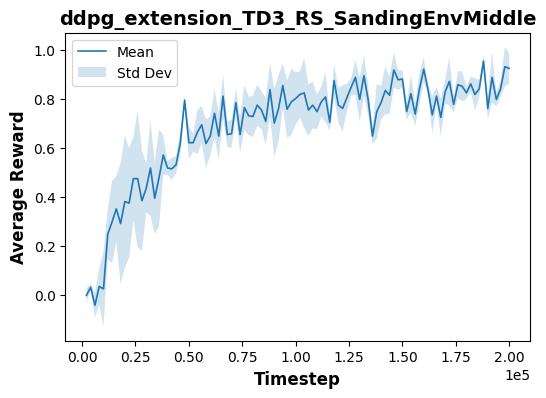

In [20]:
from algos.ddpg_extension_TD3_RS import DDPGExtension
from algos.ppo_extension import PPOExtension
## Run the following code to plot PPO or DDPG's training performances
import warnings
warnings.filterwarnings('ignore')

# Uncomment the algorithm you chose 
implemented_algo = 'ddpg_extension_TD3_RS' # 'ppo_extension' or 'ddpg_extension'
environment = 'middle'

# Loop over the three difficulty levels

training_seeds = [0,1,2]

config=setup(algo=implemented_algo, env=environment, render=False)

config["seed"] = 0

agent=DDPGExtension(config) # DDPGExtension(config) or PPOExtension(config)

# plot the statistical training curves with specific random seeds
cu.plot_algorithm_training(agent.logging_dir, training_seeds, agent.env_name, implemented_algo)


## Task 2.3: Comparison of Improved and Original Algorithm Performance

### a) Display the Plots
Display the training performance of both the improved and the original algorithms.

We aim to compare the training performances of the original and improved algorithms. To achieve this, we will generate the following plots, which will highlight the sample efficiency and the agent's performance throughout the training process. Below are some figures comparing the performances of DDPG and PPO:

<p align="center">
  <figure style="display: inline-block; text-align: center; margin: 10px;">
    <img src="imgs/middle_compare_ddpg_ppo.png" alt="PPO Middle Environment" width="540"/>
    <figcaption>PPO vs DDPG (Middle environment)</figcaption>
  </figure>
  
</p>

**Note**: The display does not need to exactly match the figures shown above. However, the code should generate a figure to compare the original algorithm with the improved algorithm.

### b) Paths
If the code runs successfully, your plot should be saved to the following paths:

- **Original vs Improved (Middle Environment)**: 
  - `results/SandingEnvMiddle/compare_ddpg_ddpg_extension.pdf`
  - or 
  - `results/SandingEnvMiddle/compare_ppo_ppo_extension.pdf`


#### TD3

In [38]:
## Run the following code to draw the comparison plots of PPO and DDPG's training performances
from algos.ddpg_extension import DDPGExtension
import warnings
warnings.filterwarnings('ignore')

environment = 'middle'

orgin_alo_name = 'ddpg' # 'ddpg' or 'ppo'
improved_alo_name = 'ddpg_extension' # 'ddpg_extension' or 'ppo_extension'

config=setup(algo=orgin_alo_name, env=environment, render=False)
origin_agent = DDPGAgent(config) # DDPGAgent(config) or PPOAgent(config)

config=setup(algo=improved_alo_name, env=environment, render=False)
improved_agent = DDPGExtension(config) # DDPGExtension(config) or PPOExtension(config)

# make the comparison plot
cu.compare_algorithm_training(origin_agent, improved_agent, seeds=[0,1,2])

Using DDPGExtension with TD3


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

Using DDPGExtension with TD3



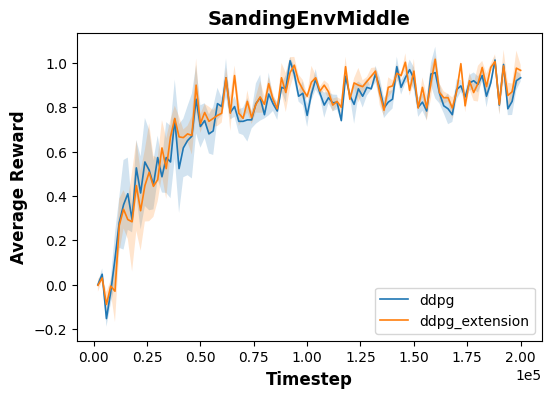

In [22]:
## Run the following code to draw the comparison plots of PPO and DDPG's training performances
from algos.ddpg_extension import DDPGExtension
import warnings
warnings.filterwarnings('ignore')

environment = 'middle'

orgin_alo_name = 'ddpg' # 'ddpg' or 'ppo'
improved_alo_name = 'ddpg_extension' # 'ddpg_extension' or 'ppo_extension'

config=setup(algo=orgin_alo_name, env=environment, render=False)
origin_agent = DDPGAgent(config) # DDPGAgent(config) or PPOAgent(config)

config=setup(algo=improved_alo_name, env=environment, render=False)
improved_agent = DDPGExtension(config) # DDPGExtension(config) or PPOExtension(config)

# make the comparison plot
cu.compare_algorithm_training(origin_agent, improved_agent, seeds=[0,1,2])

$\phi(s) = \sum_{i=1}^{N} D_{\text{SAND}i} - \sum{j=1}^{M} D_{\text{NOSAND}_j}$
$D_{\text{SAND}_i}$ is the Euclidean distance from the robot's current location to the $i$th sanding area.
$D_{\text{NOSAND}_j}$ is the Euclidean distance from the robot's current location to the $j$th no-sanding area.

$\phi(s) = -\frac{D_{\text{SAND}}}{D_{\text{MAX}}} + \frac{D_{\text{NOSAND}}}{D_{\text{MAX}}}$

#### TD3 + RS

Using DDPGExtension with TD3 + RS



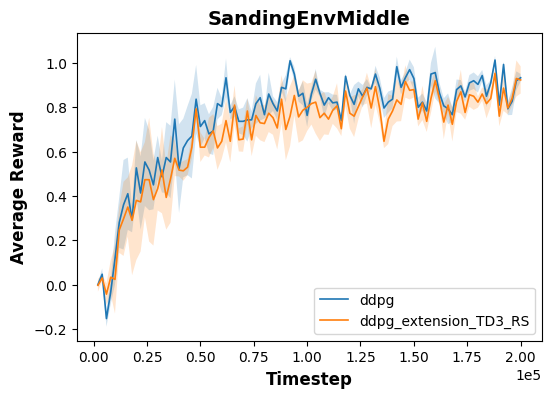

In [21]:
## Run the following code to draw the comparison plots of PPO and DDPG's training performances
from algos.ddpg_extension_TD3_RS import DDPGExtension
import warnings
warnings.filterwarnings('ignore')

environment = 'middle'

orgin_alo_name = 'ddpg' # 'ddpg' or 'ppo'
improved_alo_name = 'ddpg_extension_TD3_RS' # 'ddpg_extension' or 'ppo_extension'

config=setup(algo=orgin_alo_name, env=environment, render=False)
origin_agent = DDPGAgent(config) # DDPGAgent(config) or PPOAgent(config)

config=setup(algo=improved_alo_name, env=environment, render=False)
improved_agent = DDPGExtension(config) # DDPGExtension(config) or PPOExtension(config)

# make the comparison plot
cu.compare_algorithm_training(origin_agent, improved_agent, seeds=[0,1,2])

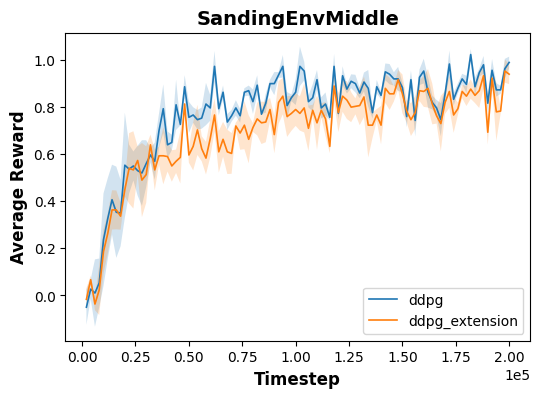

In [18]:
## Run the following code to draw the comparison plots of PPO and DDPG's training performances
import warnings
warnings.filterwarnings('ignore')

environment = 'middle'

orgin_alo_name = 'ddpg' # 'ddpg' or 'ppo'
improved_alo_name = 'ddpg_extension' # 'ddpg_extension' or 'ppo_extension'

config=setup(algo=orgin_alo_name, env=environment, render=False)
origin_agent = DDPGAgent(config) # DDPGAgent(config) or PPOAgent(config)

config=setup(algo=improved_alo_name, env=environment, render=False)
improved_agent = DDPGExtension(config) # DDPGExtension(config) or PPOExtension(config)

# make the comparison plot
cu.compare_algorithm_training(origin_agent, improved_agent, seeds=[0,1,2])

<a id='Q1'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 1</b> (30 points) </h3> 
    Explain how you extended PPO/DDPG and why in a maximum of 200 words. In addition, explain briefly in which parts of the source code the changes are (refer to file name and function names or lines of code).
</div>

DOUBLE CLICK HERE TO EDIT, CLEAR THIS TEXT AND ANSWER HERE

<a id='T3'></a>
<div class=" alert alert-warning">
    <h3><b>Student Task 3</b> (+20 points) </h3>
    This task give bonus points to the project works that get highest performance in the difficult environment. At the end of the course, we will use everyone's improved agent (please submit your pretrained weights) to run the competition on the most difficult sanding environment. Competitive grading: all projects are evaluated in the difficult environment for performance and put into ranking order. Top 10% of submitted projects get bonus points. Best performing project (100% ranked) gets 20 bonus points, 95% ranked gets 10 bonus points, 90% or lower ranked get 0 bonus points.
</div>

## Task 3.1: Evaluate Your Improved Algorithm with difficult environment


### a) Training
- **Random Seeds**: Train your algorithm using three distinct random seeds [0,1,2] to ensure robustness and repeatability.

### b) Evaluation
- **Environment**: Evaluate your algorithm exclusively in the **difficult-level difficulty environment** to focus your improvements.

### c) Code Compatibility
- Ensure that your code is **fully compatible** with all existing functions in other files, maintaining the integrity of the overall project structure.

---



In [ ]:

from algos.ddpg_agent import DDPGAgent
from algos.ppo_agent import PPOAgent
from algos.ddpg_extension import DDPGExtension
from algos.ppo_extension import PPOExtension
# implement your improved algorithm either in algo/ddpg_extension.py or algo/ppo_extension.py

implemented_algo = 'ddpg_extension_TD3_RS'# choose 'ppo_extension' or 'ddpg_extension'
environment = 'difficult'


training_seeds = []
for i in range(3):
    config=setup(algo=implemented_algo, env=environment)

    config["seed"] = i
    training_seeds.append(i)


    if config["args"].algo_name == 'ppo':
        agent=PPOAgent(config)
    elif config["args"].algo_name == 'ddpg':
        agent=DDPGAgent(config)
    elif config["args"].algo_name == 'ppo_extension':
        agent=PPOExtension(config)
    elif config["args"].algo_name == 'ddpg_extension_TD3_RS':
        agent=DDPGExtension(config)
    else:
        raise Exception('Please use ppo or ddpg!')

    # Train the agent using selected algorithm    
    agent.train()

  

**Test**: After training, run the following code to test your agents.

In [ ]:
training_seeds = []
for i in range(3):
    config=setup(algo=implemented_algo, env=environment, render=False)

    config["seed"] = i
    training_seeds.append(i)


    if config["args"].algo_name == 'ppo_extension':
        agent=PPOExtension(config)
    elif config["args"].algo_name == 'ddpg_extension':
        agent=DDPGExtension(config)
    else:
        raise Exception('Please use ppo or ddpg!')

    # Test the agent in the selected environment
    test(agent, environment, implemented_algo)

#### TD3

##### Training

In [23]:

from algos.ddpg_agent import DDPGAgent
from algos.ppo_agent import PPOAgent
from algos.ddpg_extension import DDPGExtension
from algos.ppo_extension import PPOExtension
# implement your improved algorithm either in algo/ddpg_extension.py or algo/ppo_extension.py

implemented_algo = 'ddpg_extension'# choose 'ppo_extension' or 'ddpg_extension'
environment = 'difficult'


training_seeds = []
for i in range(3):
    config=setup(algo=implemented_algo, env=environment)

    config["seed"] = i
    training_seeds.append(i)


    if config["args"].algo_name == 'ppo':
        agent=PPOAgent(config)
    elif config["args"].algo_name == 'ddpg':
        agent=DDPGAgent(config)
    elif config["args"].algo_name == 'ppo_extension':
        agent=PPOExtension(config)
    elif config["args"].algo_name == 'ddpg_extension':
        agent=DDPGExtension(config)
    else:
        raise Exception('Please use ppo or ddpg!')

    # Train the agent using selected algorithm    
    agent.train()


Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-0.mp4.
Moviepy - Writing video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-0.mp4
Using DDPGExtension with TD3


Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-0.mp4.
Moviepy - Writing video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-0.mp4
Episode 0 Step 20 finished. Average episode return: 0.0
Episode 100 Step 2020 finished. Average episode return: 0.07
Episode 200 Step 4020 finished. Average episode return: 0.0
Episode 300 Step 6020 finished. Average episode return: -0.05
Episode 400 Step 8020 finished. Average episode return: 0.17
Episode 500 Step 10020 finished. Average episode return: 0.0
Episode 600 Step 12020 finished. Average episode return: 0.27
Episode 700 Step 14020 finished. Average episode return: 0.14
Episode 800 Step 16020 finished. Average episode return: 0.27
Episode 900 Step 18020 finished. Average episode return: 0.09
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Rei

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-1000.mp4
Episode 1000 Step 20020 finished. Average episode return: 0.38
Episode 1100 Step 22020 finished. Average episode return: 0.34
Episode 1200 Step 24020 finished. Average episode return: 0.32
Episode 1300 Step 26020 finished. Average episode return: 0.36
Episode 1400 Step 28020 finished. Average episode return: 0.57
Episode 1500 Step 30020 finished. Average episode return: 0.37
Episode 1600 Step 32020 finished. Average episode return: 0.29
Episode 1700 Step 34020 finished. Average episode return: 0.48
Episode 1800 Step 36020 finished. Average episode return: 0.57
Episode 1900 Step 38020 finished. Average episode return: 0.57
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLea

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-2000.mp4
Episode 2000 Step 40020 finished. Average episode return: 0.65
Episode 2100 Step 42020 finished. Average episode return: 0.58
Episode 2200 Step 44020 finished. Average episode return: 0.67
Episode 2300 Step 46020 finished. Average episode return: 0.54
Episode 2400 Step 48020 finished. Average episode return: 0.58
Episode 2500 Step 50020 finished. Average episode return: 0.7
Episode 2600 Step 52020 finished. Average episode return: 0.86
Episode 2700 Step 54020 finished. Average episode return: 0.61
Episode 2800 Step 56020 finished. Average episode return: 0.69
Episode 2900 Step 58020 finished. Average episode return: 0.78
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLear

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-3000.mp4
Episode 3000 Step 60020 finished. Average episode return: 0.89
Episode 3100 Step 62020 finished. Average episode return: 0.87
Episode 3200 Step 64020 finished. Average episode return: 0.75
Episode 3300 Step 66020 finished. Average episode return: 0.6
Episode 3400 Step 68020 finished. Average episode return: 0.81
Episode 3500 Step 70020 finished. Average episode return: 0.92
Episode 3600 Step 72020 finished. Average episode return: 0.81
Episode 3700 Step 74020 finished. Average episode return: 0.88
Episode 3800 Step 76020 finished. Average episode return: 0.71
Episode 3900 Step 78020 finished. Average episode return: 0.93
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLear

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-4000.mp4
Episode 4000 Step 80020 finished. Average episode return: 0.87
Episode 4100 Step 82020 finished. Average episode return: 0.87
Episode 4200 Step 84020 finished. Average episode return: 1.11
Episode 4300 Step 86020 finished. Average episode return: 0.67
Episode 4400 Step 88020 finished. Average episode return: 0.8
Episode 4500 Step 90020 finished. Average episode return: 1.03
Episode 4600 Step 92020 finished. Average episode return: 1.0
Episode 4700 Step 94020 finished. Average episode return: 0.95
Episode 4800 Step 96020 finished. Average episode return: 0.9
Episode 4900 Step 98020 finished. Average episode return: 0.94
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearni

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-5000.mp4
Episode 5000 Step 100020 finished. Average episode return: 1.05
Episode 5100 Step 102020 finished. Average episode return: 0.7
Episode 5200 Step 104020 finished. Average episode return: 0.99
Episode 5300 Step 106020 finished. Average episode return: 0.89
Episode 5400 Step 108020 finished. Average episode return: 0.9
Episode 5500 Step 110020 finished. Average episode return: 0.99
Episode 5600 Step 112020 finished. Average episode return: 0.93
Episode 5700 Step 114020 finished. Average episode return: 1.0
Episode 5800 Step 116020 finished. Average episode return: 0.98
Episode 5900 Step 118020 finished. Average episode return: 1.15
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforce

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-6000.mp4
Episode 6000 Step 120020 finished. Average episode return: 0.96
Episode 6100 Step 122020 finished. Average episode return: 0.98
Episode 6200 Step 124020 finished. Average episode return: 1.11
Episode 6300 Step 126020 finished. Average episode return: 1.16
Episode 6400 Step 128020 finished. Average episode return: 0.92
Episode 6500 Step 130020 finished. Average episode return: 1.19
Episode 6600 Step 132020 finished. Average episode return: 0.81
Episode 6700 Step 134020 finished. Average episode return: 1.02
Episode 6800 Step 136020 finished. Average episode return: 1.0
Episode 6900 Step 138020 finished. Average episode return: 1.08
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinfor

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-7000.mp4
Episode 7000 Step 140020 finished. Average episode return: 1.29
Episode 7100 Step 142020 finished. Average episode return: 1.29
Episode 7200 Step 144020 finished. Average episode return: 1.03
Episode 7300 Step 146020 finished. Average episode return: 1.07
Episode 7400 Step 148020 finished. Average episode return: 1.22
Episode 7500 Step 150020 finished. Average episode return: 1.01
Episode 7600 Step 152020 finished. Average episode return: 1.11
Episode 7700 Step 154020 finished. Average episode return: 1.12
Episode 7800 Step 156020 finished. Average episode return: 1.33
Episode 7900 Step 158020 finished. Average episode return: 1.12
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinfo

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-8000.mp4
Episode 8000 Step 160020 finished. Average episode return: 1.08
Episode 8100 Step 162020 finished. Average episode return: 1.19
Episode 8200 Step 164020 finished. Average episode return: 1.11
Episode 8300 Step 166020 finished. Average episode return: 1.03
Episode 8400 Step 168020 finished. Average episode return: 1.09
Episode 8500 Step 170020 finished. Average episode return: 0.82
Episode 8600 Step 172020 finished. Average episode return: 1.04
Episode 8700 Step 174020 finished. Average episode return: 1.12
Episode 8800 Step 176020 finished. Average episode return: 1.19
Episode 8900 Step 178020 finished. Average episode return: 1.27
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinfo

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-9000.mp4
Episode 9000 Step 180020 finished. Average episode return: 0.86
Episode 9100 Step 182020 finished. Average episode return: 1.01
Episode 9200 Step 184020 finished. Average episode return: 1.25
Episode 9300 Step 186020 finished. Average episode return: 1.19
Episode 9400 Step 188020 finished. Average episode return: 0.81
Episode 9500 Step 190020 finished. Average episode return: 0.96
Episode 9600 Step 192020 finished. Average episode return: 1.13
Episode 9700 Step 194020 finished. Average episode return: 1.12
Episode 9800 Step 196020 finished. Average episode return: 1.24
Episode 9900 Step 198020 finished. Average episode return: 1.16
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinfo

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-10000.mp4
Episode 10000 Step 200020 finished. Average episode return: 1.07
Saved model to /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/model/model_parameters_0.pt ...
logger and seed 0
/Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/logging/logs_0.csv
------ Training Finished ------
Total traning time is 6.396730872216722mins
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learn

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-0.mp4
Using DDPGExtension with TD3
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-0.mp4.
Moviepy - Writing video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-0.mp4
Episode 0 Step 20 finished. Average episode return: 0.0
Episode 100 Step 2020 finished. Average episode return: 0.11
Episode 200 Step 4020 finished. Average episode return: -0.17
Episode 300 Step 6020 finished. Average episode return: -0.03
Episode 400 Step 8020 finished. Average episode return: -0.23
Episode 500 Step 10020 finished. Average episode return: 0.16
Episode 600 Step 12020 finished. Average episode return: 0.38
Episode 700 Step 14020 finished. Average episode return: 0.36
Episode 800 Step 16020 finished. Average episode return: 0.62
Episode 900 Step 18020 finished. Average episode return: 0.26
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-1000.mp4
Episode 1000 Step 20020 finished. Average episode return: 0.5
Episode 1100 Step 22020 finished. Average episode return: 0.41
Episode 1200 Step 24020 finished. Average episode return: 0.14
Episode 1300 Step 26020 finished. Average episode return: 0.4
Episode 1400 Step 28020 finished. Average episode return: 0.23
Episode 1500 Step 30020 finished. Average episode return: 0.46
Episode 1600 Step 32020 finished. Average episode return: 0.25
Episode 1700 Step 34020 finished. Average episode return: 0.71
Episode 1800 Step 36020 finished. Average episode return: 0.65
Episode 1900 Step 38020 finished. Average episode return: 0.54
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearn

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-2000.mp4
Episode 2000 Step 40020 finished. Average episode return: 0.72
Episode 2100 Step 42020 finished. Average episode return: 0.59
Episode 2200 Step 44020 finished. Average episode return: 0.63
Episode 2300 Step 46020 finished. Average episode return: 0.77
Episode 2400 Step 48020 finished. Average episode return: 0.83
Episode 2500 Step 50020 finished. Average episode return: 0.93
Episode 2600 Step 52020 finished. Average episode return: 0.94
Episode 2700 Step 54020 finished. Average episode return: 0.98
Episode 2800 Step 56020 finished. Average episode return: 0.97
Episode 2900 Step 58020 finished. Average episode return: 1.07
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLea

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-3000.mp4
Episode 3000 Step 60020 finished. Average episode return: 0.82
Episode 3100 Step 62020 finished. Average episode return: 1.15
Episode 3200 Step 64020 finished. Average episode return: 0.86
Episode 3300 Step 66020 finished. Average episode return: 1.03
Episode 3400 Step 68020 finished. Average episode return: 1.14
Episode 3500 Step 70020 finished. Average episode return: 1.27
Episode 3600 Step 72020 finished. Average episode return: 0.89
Episode 3700 Step 74020 finished. Average episode return: 0.87
Episode 3800 Step 76020 finished. Average episode return: 1.09
Episode 3900 Step 78020 finished. Average episode return: 0.91
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLea

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-4000.mp4
Episode 4000 Step 80020 finished. Average episode return: 0.92
Episode 4100 Step 82020 finished. Average episode return: 0.97
Episode 4200 Step 84020 finished. Average episode return: 0.9
Episode 4300 Step 86020 finished. Average episode return: 0.85
Episode 4400 Step 88020 finished. Average episode return: 1.06
Episode 4500 Step 90020 finished. Average episode return: 1.22
Episode 4600 Step 92020 finished. Average episode return: 1.13
Episode 4700 Step 94020 finished. Average episode return: 1.14
Episode 4800 Step 96020 finished. Average episode return: 0.93
Episode 4900 Step 98020 finished. Average episode return: 1.02
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLear

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-5000.mp4
Episode 5000 Step 100020 finished. Average episode return: 1.24
Episode 5100 Step 102020 finished. Average episode return: 0.83
Episode 5200 Step 104020 finished. Average episode return: 1.1
Episode 5300 Step 106020 finished. Average episode return: 0.95
Episode 5400 Step 108020 finished. Average episode return: 0.94
Episode 5500 Step 110020 finished. Average episode return: 1.11
Episode 5600 Step 112020 finished. Average episode return: 1.03
Episode 5700 Step 114020 finished. Average episode return: 1.33
Episode 5800 Step 116020 finished. Average episode return: 1.19
Episode 5900 Step 118020 finished. Average episode return: 1.3
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforc

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-6000.mp4
Episode 6000 Step 120020 finished. Average episode return: 0.94
Episode 6100 Step 122020 finished. Average episode return: 0.95
Episode 6200 Step 124020 finished. Average episode return: 1.11
Episode 6300 Step 126020 finished. Average episode return: 1.1
Episode 6400 Step 128020 finished. Average episode return: 1.09
Episode 6500 Step 130020 finished. Average episode return: 1.32
Episode 6600 Step 132020 finished. Average episode return: 1.01
Episode 6700 Step 134020 finished. Average episode return: 1.14
Episode 6800 Step 136020 finished. Average episode return: 1.11
Episode 6900 Step 138020 finished. Average episode return: 1.19
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinfor

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-7000.mp4
Episode 7000 Step 140020 finished. Average episode return: 1.08
Episode 7100 Step 142020 finished. Average episode return: 1.4
Episode 7200 Step 144020 finished. Average episode return: 1.13
Episode 7300 Step 146020 finished. Average episode return: 1.13
Episode 7400 Step 148020 finished. Average episode return: 1.26
Episode 7500 Step 150020 finished. Average episode return: 1.17
Episode 7600 Step 152020 finished. Average episode return: 1.01
Episode 7700 Step 154020 finished. Average episode return: 1.0
Episode 7800 Step 156020 finished. Average episode return: 1.17
Episode 7900 Step 158020 finished. Average episode return: 0.99
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforc

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-8000.mp4
Episode 8000 Step 160020 finished. Average episode return: 1.14
Episode 8100 Step 162020 finished. Average episode return: 1.26
Episode 8200 Step 164020 finished. Average episode return: 1.13
Episode 8300 Step 166020 finished. Average episode return: 0.93
Episode 8400 Step 168020 finished. Average episode return: 1.22
Episode 8500 Step 170020 finished. Average episode return: 1.12
Episode 8600 Step 172020 finished. Average episode return: 0.96
Episode 8700 Step 174020 finished. Average episode return: 1.14
Episode 8800 Step 176020 finished. Average episode return: 1.18
Episode 8900 Step 178020 finished. Average episode return: 1.28
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinfo

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-9000.mp4
Episode 9000 Step 180020 finished. Average episode return: 0.97
Episode 9100 Step 182020 finished. Average episode return: 1.18
Episode 9200 Step 184020 finished. Average episode return: 1.09
Episode 9300 Step 186020 finished. Average episode return: 1.34
Episode 9400 Step 188020 finished. Average episode return: 0.97
Episode 9500 Step 190020 finished. Average episode return: 1.07
Episode 9600 Step 192020 finished. Average episode return: 1.15
Episode 9700 Step 194020 finished. Average episode return: 1.09
Episode 9800 Step 196020 finished. Average episode return: 1.29
Episode 9900 Step 198020 finished. Average episode return: 1.25
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinfo

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-10000.mp4
Episode 10000 Step 200020 finished. Average episode return: 1.09
Saved model to /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/model/model_parameters_1.pt ...
logger and seed 1
/Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/logging/logs_1.csv
------ Training Finished ------
Total traning time is 6.27898162499987mins
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learni

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-0.mp4
Using DDPGExtension with TD3


Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-0.mp4.
Moviepy - Writing video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-0.mp4
Episode 0 Step 20 finished. Average episode return: -1.0
Episode 100 Step 2020 finished. Average episode return: 0.04
Episode 200 Step 4020 finished. Average episode return: 0.02
Episode 300 Step 6020 finished. Average episode return: 0.23
Episode 400 Step 8020 finished. Average episode return: 0.07
Episode 500 Step 10020 finished. Average episode return: -0.06
Episode 600 Step 12020 finished. Average episode return: 0.13
Episode 700 Step 14020 finished. Average episode return: -0.01
Episode 800 Step 16020 finished. Average episode return: 0.32
Episode 900 Step 18020 finished. Average episode return: 0.45
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-1000.mp4
Episode 1000 Step 20020 finished. Average episode return: 0.3
Episode 1100 Step 22020 finished. Average episode return: 0.36
Episode 1200 Step 24020 finished. Average episode return: 0.46
Episode 1300 Step 26020 finished. Average episode return: 0.56
Episode 1400 Step 28020 finished. Average episode return: 0.44
Episode 1500 Step 30020 finished. Average episode return: 0.47
Episode 1600 Step 32020 finished. Average episode return: 0.56
Episode 1700 Step 34020 finished. Average episode return: 0.5
Episode 1800 Step 36020 finished. Average episode return: 0.61
Episode 1900 Step 38020 finished. Average episode return: 0.63
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearn

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-2000.mp4
Episode 2000 Step 40020 finished. Average episode return: 0.57
Episode 2100 Step 42020 finished. Average episode return: 0.66
Episode 2200 Step 44020 finished. Average episode return: 0.61
Episode 2300 Step 46020 finished. Average episode return: 0.49
Episode 2400 Step 48020 finished. Average episode return: 0.83
Episode 2500 Step 50020 finished. Average episode return: 0.57
Episode 2600 Step 52020 finished. Average episode return: 0.6
Episode 2700 Step 54020 finished. Average episode return: 0.51
Episode 2800 Step 56020 finished. Average episode return: 0.67
Episode 2900 Step 58020 finished. Average episode return: 0.83
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLear

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-3000.mp4
Episode 3000 Step 60020 finished. Average episode return: 0.62
Episode 3100 Step 62020 finished. Average episode return: 0.69
Episode 3200 Step 64020 finished. Average episode return: 0.75
Episode 3300 Step 66020 finished. Average episode return: 0.72
Episode 3400 Step 68020 finished. Average episode return: 0.69
Episode 3500 Step 70020 finished. Average episode return: 0.84
Episode 3600 Step 72020 finished. Average episode return: 0.74
Episode 3700 Step 74020 finished. Average episode return: 0.9
Episode 3800 Step 76020 finished. Average episode return: 0.62
Episode 3900 Step 78020 finished. Average episode return: 0.76
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLear

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-4000.mp4
Episode 4000 Step 80020 finished. Average episode return: 0.85
Episode 4100 Step 82020 finished. Average episode return: 0.77
Episode 4200 Step 84020 finished. Average episode return: 0.71
Episode 4300 Step 86020 finished. Average episode return: 0.76
Episode 4400 Step 88020 finished. Average episode return: 0.81
Episode 4500 Step 90020 finished. Average episode return: 0.93
Episode 4600 Step 92020 finished. Average episode return: 0.78
Episode 4700 Step 94020 finished. Average episode return: 0.99
Episode 4800 Step 96020 finished. Average episode return: 0.82
Episode 4900 Step 98020 finished. Average episode return: 0.95
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLea

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-5000.mp4
Episode 5000 Step 100020 finished. Average episode return: 0.76
Episode 5100 Step 102020 finished. Average episode return: 0.78
Episode 5200 Step 104020 finished. Average episode return: 1.06
Episode 5300 Step 106020 finished. Average episode return: 0.91
Episode 5400 Step 108020 finished. Average episode return: 0.96
Episode 5500 Step 110020 finished. Average episode return: 0.92
Episode 5600 Step 112020 finished. Average episode return: 0.82
Episode 5700 Step 114020 finished. Average episode return: 1.05
Episode 5800 Step 116020 finished. Average episode return: 0.87
Episode 5900 Step 118020 finished. Average episode return: 1.27
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinfo

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-6000.mp4
Episode 6000 Step 120020 finished. Average episode return: 0.9
Episode 6100 Step 122020 finished. Average episode return: 1.04
Episode 6200 Step 124020 finished. Average episode return: 1.05
Episode 6300 Step 126020 finished. Average episode return: 1.18
Episode 6400 Step 128020 finished. Average episode return: 1.04
Episode 6500 Step 130020 finished. Average episode return: 1.09
Episode 6600 Step 132020 finished. Average episode return: 0.91
Episode 6700 Step 134020 finished. Average episode return: 1.05
Episode 6800 Step 136020 finished. Average episode return: 0.97
Episode 6900 Step 138020 finished. Average episode return: 1.16
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinfor

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-7000.mp4
Episode 7000 Step 140020 finished. Average episode return: 1.05
Episode 7100 Step 142020 finished. Average episode return: 1.27
Episode 7200 Step 144020 finished. Average episode return: 0.99
Episode 7300 Step 146020 finished. Average episode return: 0.97
Episode 7400 Step 148020 finished. Average episode return: 1.21
Episode 7500 Step 150020 finished. Average episode return: 1.17
Episode 7600 Step 152020 finished. Average episode return: 1.13
Episode 7700 Step 154020 finished. Average episode return: 1.06
Episode 7800 Step 156020 finished. Average episode return: 1.29
Episode 7900 Step 158020 finished. Average episode return: 1.07
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinfo

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-8000.mp4
Episode 8000 Step 160020 finished. Average episode return: 0.92
Episode 8100 Step 162020 finished. Average episode return: 1.31
Episode 8200 Step 164020 finished. Average episode return: 1.15
Episode 8300 Step 166020 finished. Average episode return: 1.03
Episode 8400 Step 168020 finished. Average episode return: 1.08
Episode 8500 Step 170020 finished. Average episode return: 0.96
Episode 8600 Step 172020 finished. Average episode return: 1.05
Episode 8700 Step 174020 finished. Average episode return: 0.9
Episode 8800 Step 176020 finished. Average episode return: 1.14
Episode 8900 Step 178020 finished. Average episode return: 1.25
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinfor

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-9000.mp4
Episode 9000 Step 180020 finished. Average episode return: 0.97
Episode 9100 Step 182020 finished. Average episode return: 0.94
Episode 9200 Step 184020 finished. Average episode return: 1.14
Episode 9300 Step 186020 finished. Average episode return: 1.1
Episode 9400 Step 188020 finished. Average episode return: 1.02
Episode 9500 Step 190020 finished. Average episode return: 1.06
Episode 9600 Step 192020 finished. Average episode return: 0.88
Episode 9700 Step 194020 finished. Average episode return: 1.01
Episode 9800 Step 196020 finished. Average episode return: 1.23
Episode 9900 Step 198020 finished. Average episode return: 1.05
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinfor

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-10000.mp4
Episode 10000 Step 200020 finished. Average episode return: 1.02
Saved model to /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/model/model_parameters_2.pt ...
logger and seed 2
/Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/logging/logs_2.csv
------ Training Finished ------
Total traning time is 6.299053575699994mins


##### Testing

In [24]:
training_seeds = []
for i in range(3):
    config=setup(algo=implemented_algo, env=environment, render=False)

    config["seed"] = i
    training_seeds.append(i)


    if config["args"].algo_name == 'ppo_extension':
        agent=PPOExtension(config)
    elif config["args"].algo_name == 'ddpg_extension':
        agent=DDPGExtension(config)
    else:
        raise Exception('Please use ppo or ddpg!')

    # Test the agent in the selected environment
    test(agent, environment, implemented_algo)

Using DDPGExtension with TD3
model loaded: /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/model/model_parameters_0.pt
Testing...
Saved GIF to /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/video/test/_seed_0_ep_0.gif
Average test reward over 10 episodes: 1.1,+- 1.1357816691600549;         Average episode length: 20.0
Using DDPGExtension with TD3
model loaded: /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension/model/model_parameters_1.pt
Testing...
Saved GIF to /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Pro

In [27]:
# TD3 + RS result in Difficult env
print(np.mean([1.1, 1.8, 1.3]))
print(np.std([1.1, 1.8, 1.3]))

1.4000000000000001
0.29439202887759486


#### TD3 + RS

##### Training

In [25]:

from algos.ddpg_agent import DDPGAgent
from algos.ppo_agent import PPOAgent
from algos.ddpg_extension_TD3_RS import DDPGExtension
from algos.ppo_extension import PPOExtension
# implement your improved algorithm either in algo/ddpg_extension.py or algo/ppo_extension.py

implemented_algo = 'ddpg_extension_TD3_RS'# choose 'ppo_extension' or 'ddpg_extension'
environment = 'difficult'


training_seeds = []
for i in range(3):
    config=setup(algo=implemented_algo, env=environment)

    config["seed"] = i
    training_seeds.append(i)


    if config["args"].algo_name == 'ppo':
        agent=PPOAgent(config)
    elif config["args"].algo_name == 'ddpg':
        agent=DDPGAgent(config)
    elif config["args"].algo_name == 'ppo_extension':
        agent=PPOExtension(config)
    elif config["args"].algo_name == 'ddpg_extension_TD3_RS':
        agent=DDPGExtension(config)
    else:
        raise Exception('Please use ppo or ddpg!')

    # Train the agent using selected algorithm    
    agent.train()


Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/video/train/project-episode-0.mp4.
Moviepy - Writing video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/video/train/project-episode-0.mp4
Using DDPGExtension with TD3 + RS


Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/video/train/project-episode-0.mp4.
Moviepy - Writing video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/video/train/project-episode-0.mp4
Episode 0 Step 20 finished. Average episode return: 0.0
Episode 100 Step 2020 finished. Average episode return: 0.07
Episode 200 Step 4020 finished. Average episode return: 0.0
Episode 300 Step 6020 finished. Average episode return: -0.03
Episode 400 Step 8020 finished. Average episode return: 0.09
Episode 500 Step 10020 finished. Average episode return: 0.23
Episode 600 Step 12020 finished. Average episode return: 0.35
Episode 700 Step 14020 finished. Average episode return: 0.35
Episode 800 Step 16020 finished. Average episode return: 0.39
Episode 900 Step 18020 finished. Average episode return: 0.2
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/Git

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/video/train/project-episode-1000.mp4
Episode 1000 Step 20020 finished. Average episode return: 0.31
Episode 1100 Step 22020 finished. Average episode return: 0.23
Episode 1200 Step 24020 finished. Average episode return: 0.22
Episode 1300 Step 26020 finished. Average episode return: 0.34
Episode 1400 Step 28020 finished. Average episode return: 0.42
Episode 1500 Step 30020 finished. Average episode return: 0.41
Episode 1600 Step 32020 finished. Average episode return: 0.33
Episode 1700 Step 34020 finished. Average episode return: 0.47
Episode 1800 Step 36020 finished. Average episode return: 0.58
Episode 1900 Step 38020 finished. Average episode return: 0.59
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforce

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/video/train/project-episode-2000.mp4
Episode 2000 Step 40020 finished. Average episode return: 0.64
Episode 2100 Step 42020 finished. Average episode return: 0.39
Episode 2200 Step 44020 finished. Average episode return: 0.71
Episode 2300 Step 46020 finished. Average episode return: 0.63
Episode 2400 Step 48020 finished. Average episode return: 0.7
Episode 2500 Step 50020 finished. Average episode return: 0.9
Episode 2600 Step 52020 finished. Average episode return: 0.76
Episode 2700 Step 54020 finished. Average episode return: 0.63
Episode 2800 Step 56020 finished. Average episode return: 0.93
Episode 2900 Step 58020 finished. Average episode return: 1.07
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforceme

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/video/train/project-episode-3000.mp4
Episode 3000 Step 60020 finished. Average episode return: 0.72
Episode 3100 Step 62020 finished. Average episode return: 0.93
Episode 3200 Step 64020 finished. Average episode return: 0.61
Episode 3300 Step 66020 finished. Average episode return: 0.87
Episode 3400 Step 68020 finished. Average episode return: 0.91
Episode 3500 Step 70020 finished. Average episode return: 1.0
Episode 3600 Step 72020 finished. Average episode return: 0.87
Episode 3700 Step 74020 finished. Average episode return: 0.97
Episode 3800 Step 76020 finished. Average episode return: 0.81
Episode 3900 Step 78020 finished. Average episode return: 0.92
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforcem

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/video/train/project-episode-4000.mp4
Episode 4000 Step 80020 finished. Average episode return: 0.77
Episode 4100 Step 82020 finished. Average episode return: 0.99
Episode 4200 Step 84020 finished. Average episode return: 0.91
Episode 4300 Step 86020 finished. Average episode return: 0.7
Episode 4400 Step 88020 finished. Average episode return: 0.84
Episode 4500 Step 90020 finished. Average episode return: 1.0
Episode 4600 Step 92020 finished. Average episode return: 1.09
Episode 4700 Step 94020 finished. Average episode return: 1.04
Episode 4800 Step 96020 finished. Average episode return: 1.04
Episode 4900 Step 98020 finished. Average episode return: 1.06
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforceme

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/video/train/project-episode-5000.mp4
Episode 5000 Step 100020 finished. Average episode return: 1.05
Episode 5100 Step 102020 finished. Average episode return: 0.96
Episode 5200 Step 104020 finished. Average episode return: 1.25
Episode 5300 Step 106020 finished. Average episode return: 1.09
Episode 5400 Step 108020 finished. Average episode return: 1.03
Episode 5500 Step 110020 finished. Average episode return: 1.07
Episode 5600 Step 112020 finished. Average episode return: 0.92
Episode 5700 Step 114020 finished. Average episode return: 1.09
Episode 5800 Step 116020 finished. Average episode return: 1.07
Episode 5900 Step 118020 finished. Average episode return: 1.24
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/video/train/project-episode-6000.mp4
Episode 6000 Step 120020 finished. Average episode return: 0.87
Episode 6100 Step 122020 finished. Average episode return: 1.09
Episode 6200 Step 124020 finished. Average episode return: 1.05
Episode 6300 Step 126020 finished. Average episode return: 1.24
Episode 6400 Step 128020 finished. Average episode return: 1.05
Episode 6500 Step 130020 finished. Average episode return: 1.21
Episode 6600 Step 132020 finished. Average episode return: 0.89
Episode 6700 Step 134020 finished. Average episode return: 1.12
Episode 6800 Step 136020 finished. Average episode return: 1.1
Episode 6900 Step 138020 finished. Average episode return: 1.01
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/video/train/project-episode-7000.mp4
Episode 7000 Step 140020 finished. Average episode return: 1.09
Episode 7100 Step 142020 finished. Average episode return: 1.24
Episode 7200 Step 144020 finished. Average episode return: 1.19
Episode 7300 Step 146020 finished. Average episode return: 1.15
Episode 7400 Step 148020 finished. Average episode return: 1.23
Episode 7500 Step 150020 finished. Average episode return: 1.14
Episode 7600 Step 152020 finished. Average episode return: 0.98
Episode 7700 Step 154020 finished. Average episode return: 1.23
Episode 7800 Step 156020 finished. Average episode return: 1.15
Episode 7900 Step 158020 finished. Average episode return: 1.17
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/video/train/project-episode-8000.mp4
Episode 8000 Step 160020 finished. Average episode return: 1.12
Episode 8100 Step 162020 finished. Average episode return: 1.16
Episode 8200 Step 164020 finished. Average episode return: 1.34
Episode 8300 Step 166020 finished. Average episode return: 0.98
Episode 8400 Step 168020 finished. Average episode return: 1.09
Episode 8500 Step 170020 finished. Average episode return: 0.94
Episode 8600 Step 172020 finished. Average episode return: 1.04
Episode 8700 Step 174020 finished. Average episode return: 1.17
Episode 8800 Step 176020 finished. Average episode return: 1.18
Episode 8900 Step 178020 finished. Average episode return: 1.25
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/video/train/project-episode-9000.mp4
Episode 9000 Step 180020 finished. Average episode return: 0.99
Episode 9100 Step 182020 finished. Average episode return: 1.24
Episode 9200 Step 184020 finished. Average episode return: 1.19
Episode 9300 Step 186020 finished. Average episode return: 1.18
Episode 9400 Step 188020 finished. Average episode return: 0.95
Episode 9500 Step 190020 finished. Average episode return: 1.0
Episode 9600 Step 192020 finished. Average episode return: 1.15
Episode 9700 Step 194020 finished. Average episode return: 1.21
Episode 9800 Step 196020 finished. Average episode return: 1.24
Episode 9900 Step 198020 finished. Average episode return: 1.33
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/video/train/project-episode-10000.mp4
Episode 10000 Step 200020 finished. Average episode return: 1.05
Saved model to /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/model/model_parameters_0.pt ...
logger and seed 0
/Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/logging/logs_0.csv
------ Training Finished ------
Total traning time is 6.739597874299943mins
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHu

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/video/train/project-episode-0.mp4
Using DDPGExtension with TD3 + RS


Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/video/train/project-episode-0.mp4.
Moviepy - Writing video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/video/train/project-episode-0.mp4
Episode 0 Step 20 finished. Average episode return: 0.0
Episode 100 Step 2020 finished. Average episode return: 0.11
Episode 200 Step 4020 finished. Average episode return: -0.17
Episode 300 Step 6020 finished. Average episode return: -0.05
Episode 400 Step 8020 finished. Average episode return: -0.11
Episode 500 Step 10020 finished. Average episode return: 0.06
Episode 600 Step 12020 finished. Average episode return: 0.31
Episode 700 Step 14020 finished. Average episode return: 0.05
Episode 800 Step 16020 finished. Average episode return: 0.18
Episode 900 Step 18020 finished. Average episode return: -0.03
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Projec

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/video/train/project-episode-1000.mp4
Episode 1000 Step 20020 finished. Average episode return: 0.39
Episode 1100 Step 22020 finished. Average episode return: 0.22
Episode 1200 Step 24020 finished. Average episode return: 0.24
Episode 1300 Step 26020 finished. Average episode return: 0.32
Episode 1400 Step 28020 finished. Average episode return: 0.33
Episode 1500 Step 30020 finished. Average episode return: 0.23
Episode 1600 Step 32020 finished. Average episode return: 0.27
Episode 1700 Step 34020 finished. Average episode return: 0.4
Episode 1800 Step 36020 finished. Average episode return: 0.46
Episode 1900 Step 38020 finished. Average episode return: 0.39
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforcem

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/video/train/project-episode-2000.mp4
Episode 2000 Step 40020 finished. Average episode return: 0.71
Episode 2100 Step 42020 finished. Average episode return: 0.63
Episode 2200 Step 44020 finished. Average episode return: 0.82
Episode 2300 Step 46020 finished. Average episode return: 0.77
Episode 2400 Step 48020 finished. Average episode return: 0.87
Episode 2500 Step 50020 finished. Average episode return: 1.0
Episode 2600 Step 52020 finished. Average episode return: 0.92
Episode 2700 Step 54020 finished. Average episode return: 0.77
Episode 2800 Step 56020 finished. Average episode return: 1.06
Episode 2900 Step 58020 finished. Average episode return: 1.22
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforcem

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/video/train/project-episode-3000.mp4
Episode 3000 Step 60020 finished. Average episode return: 0.89
Episode 3100 Step 62020 finished. Average episode return: 1.12
Episode 3200 Step 64020 finished. Average episode return: 1.0
Episode 3300 Step 66020 finished. Average episode return: 1.01
Episode 3400 Step 68020 finished. Average episode return: 1.14
Episode 3500 Step 70020 finished. Average episode return: 1.14
Episode 3600 Step 72020 finished. Average episode return: 0.87
Episode 3700 Step 74020 finished. Average episode return: 1.02
Episode 3800 Step 76020 finished. Average episode return: 1.11
Episode 3900 Step 78020 finished. Average episode return: 0.99
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforcem

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/video/train/project-episode-4000.mp4
Episode 4000 Step 80020 finished. Average episode return: 1.0
Episode 4100 Step 82020 finished. Average episode return: 0.96
Episode 4200 Step 84020 finished. Average episode return: 1.04
Episode 4300 Step 86020 finished. Average episode return: 0.89
Episode 4400 Step 88020 finished. Average episode return: 1.0
Episode 4500 Step 90020 finished. Average episode return: 1.17
Episode 4600 Step 92020 finished. Average episode return: 1.08
Episode 4700 Step 94020 finished. Average episode return: 1.24
Episode 4800 Step 96020 finished. Average episode return: 1.16
Episode 4900 Step 98020 finished. Average episode return: 1.06
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforceme

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/video/train/project-episode-5000.mp4
Episode 5000 Step 100020 finished. Average episode return: 1.18
Episode 5100 Step 102020 finished. Average episode return: 0.88
Episode 5200 Step 104020 finished. Average episode return: 1.19
Episode 5300 Step 106020 finished. Average episode return: 0.91
Episode 5400 Step 108020 finished. Average episode return: 1.13
Episode 5500 Step 110020 finished. Average episode return: 0.97
Episode 5600 Step 112020 finished. Average episode return: 1.02
Episode 5700 Step 114020 finished. Average episode return: 1.16
Episode 5800 Step 116020 finished. Average episode return: 1.18
Episode 5900 Step 118020 finished. Average episode return: 1.26
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/video/train/project-episode-6000.mp4
Episode 6000 Step 120020 finished. Average episode return: 1.07
Episode 6100 Step 122020 finished. Average episode return: 0.97
Episode 6200 Step 124020 finished. Average episode return: 1.12
Episode 6300 Step 126020 finished. Average episode return: 1.16
Episode 6400 Step 128020 finished. Average episode return: 1.14
Episode 6500 Step 130020 finished. Average episode return: 1.23
Episode 6600 Step 132020 finished. Average episode return: 0.84
Episode 6700 Step 134020 finished. Average episode return: 1.11
Episode 6800 Step 136020 finished. Average episode return: 1.25
Episode 6900 Step 138020 finished. Average episode return: 1.17
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/video/train/project-episode-7000.mp4
Episode 7000 Step 140020 finished. Average episode return: 1.07
Episode 7100 Step 142020 finished. Average episode return: 1.23
Episode 7200 Step 144020 finished. Average episode return: 1.13
Episode 7300 Step 146020 finished. Average episode return: 1.25
Episode 7400 Step 148020 finished. Average episode return: 1.2
Episode 7500 Step 150020 finished. Average episode return: 1.26
Episode 7600 Step 152020 finished. Average episode return: 0.93
Episode 7700 Step 154020 finished. Average episode return: 1.17
Episode 7800 Step 156020 finished. Average episode return: 1.4
Episode 7900 Step 158020 finished. Average episode return: 1.09
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/R

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/video/train/project-episode-8000.mp4
Episode 8000 Step 160020 finished. Average episode return: 1.25
Episode 8100 Step 162020 finished. Average episode return: 1.29
Episode 8200 Step 164020 finished. Average episode return: 1.31
Episode 8300 Step 166020 finished. Average episode return: 1.03
Episode 8400 Step 168020 finished. Average episode return: 1.11
Episode 8500 Step 170020 finished. Average episode return: 1.17
Episode 8600 Step 172020 finished. Average episode return: 1.03
Episode 8700 Step 174020 finished. Average episode return: 1.15
Episode 8800 Step 176020 finished. Average episode return: 1.13
Episode 8900 Step 178020 finished. Average episode return: 1.22
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/video/train/project-episode-9000.mp4
Episode 9000 Step 180020 finished. Average episode return: 1.15
Episode 9100 Step 182020 finished. Average episode return: 1.18
Episode 9200 Step 184020 finished. Average episode return: 1.24
Episode 9300 Step 186020 finished. Average episode return: 1.27
Episode 9400 Step 188020 finished. Average episode return: 1.08
Episode 9500 Step 190020 finished. Average episode return: 1.01
Episode 9600 Step 192020 finished. Average episode return: 1.18
Episode 9700 Step 194020 finished. Average episode return: 1.1
Episode 9800 Step 196020 finished. Average episode return: 1.18
Episode 9900 Step 198020 finished. Average episode return: 1.28
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/video/train/project-episode-10000.mp4
Episode 10000 Step 200020 finished. Average episode return: 1.2
Saved model to /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/model/model_parameters_1.pt ...
logger and seed 1
/Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/logging/logs_1.csv
------ Training Finished ------
Total traning time is 6.730076911816771mins
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/video/train/project-episode-0.mp4
Using DDPGExtension with TD3 + RS
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/video/train/project-episode-0.mp4.
Moviepy - Writing video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/video/train/project-episode-0.mp4
Episode 0 Step 20 finished. Average episode return: -1.0
Episode 100 Step 2020 finished. Average episode return: 0.04
Episode 200 Step 4020 finished. Average episode return: 0.02
Episode 300 Step 6020 finished. Average episode return: 0.26
Episode 400 Step 8020 finished. Average episode return: 0.04
Episode 500 Step 10020 finished. Average episode return: -0.03
Episode 600 Step 12020 finished. Average episode return: 0.03
Episode 700 Step 14020 finished. Average episode return: -0.06
Episode 800 Step 16020 finished. Average episode return: 0.26
Episode 900 Step 18020 finished. Average episode return: 0.11
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/video/train/project-episode-1000.mp4
Episode 1000 Step 20020 finished. Average episode return: 0.15
Episode 1100 Step 22020 finished. Average episode return: 0.4
Episode 1200 Step 24020 finished. Average episode return: 0.12
Episode 1300 Step 26020 finished. Average episode return: 0.35
Episode 1400 Step 28020 finished. Average episode return: 0.52
Episode 1500 Step 30020 finished. Average episode return: 0.18
Episode 1600 Step 32020 finished. Average episode return: 0.36
Episode 1700 Step 34020 finished. Average episode return: 0.18
Episode 1800 Step 36020 finished. Average episode return: 0.35
Episode 1900 Step 38020 finished. Average episode return: 0.45
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforcem

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/video/train/project-episode-2000.mp4
Episode 2000 Step 40020 finished. Average episode return: 0.52
Episode 2100 Step 42020 finished. Average episode return: 0.49
Episode 2200 Step 44020 finished. Average episode return: 0.38
Episode 2300 Step 46020 finished. Average episode return: 0.45
Episode 2400 Step 48020 finished. Average episode return: 0.8
Episode 2500 Step 50020 finished. Average episode return: 0.49
Episode 2600 Step 52020 finished. Average episode return: 0.59
Episode 2700 Step 54020 finished. Average episode return: 0.65
Episode 2800 Step 56020 finished. Average episode return: 0.71
Episode 2900 Step 58020 finished. Average episode return: 0.77
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforcem

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/video/train/project-episode-3000.mp4
Episode 3000 Step 60020 finished. Average episode return: 0.7
Episode 3100 Step 62020 finished. Average episode return: 0.6
Episode 3200 Step 64020 finished. Average episode return: 0.46
Episode 3300 Step 66020 finished. Average episode return: 0.44
Episode 3400 Step 68020 finished. Average episode return: 0.75
Episode 3500 Step 70020 finished. Average episode return: 0.8
Episode 3600 Step 72020 finished. Average episode return: 0.73
Episode 3700 Step 74020 finished. Average episode return: 0.7
Episode 3800 Step 76020 finished. Average episode return: 0.89
Episode 3900 Step 78020 finished. Average episode return: 0.62
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforcement

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/video/train/project-episode-4000.mp4
Episode 4000 Step 80020 finished. Average episode return: 0.68
Episode 4100 Step 82020 finished. Average episode return: 0.67
Episode 4200 Step 84020 finished. Average episode return: 0.78
Episode 4300 Step 86020 finished. Average episode return: 0.76
Episode 4400 Step 88020 finished. Average episode return: 0.88
Episode 4500 Step 90020 finished. Average episode return: 1.01
Episode 4600 Step 92020 finished. Average episode return: 0.96
Episode 4700 Step 94020 finished. Average episode return: 0.9
Episode 4800 Step 96020 finished. Average episode return: 0.85
Episode 4900 Step 98020 finished. Average episode return: 0.94
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Reinforcem

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/video/train/project-episode-5000.mp4
Episode 5000 Step 100020 finished. Average episode return: 0.95
Episode 5100 Step 102020 finished. Average episode return: 0.7
Episode 5200 Step 104020 finished. Average episode return: 1.1
Episode 5300 Step 106020 finished. Average episode return: 1.02
Episode 5400 Step 108020 finished. Average episode return: 1.05
Episode 5500 Step 110020 finished. Average episode return: 1.0
Episode 5600 Step 112020 finished. Average episode return: 0.97
Episode 5700 Step 114020 finished. Average episode return: 1.03
Episode 5800 Step 116020 finished. Average episode return: 0.99
Episode 5900 Step 118020 finished. Average episode return: 1.22
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/Re

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/video/train/project-episode-6000.mp4
Episode 6000 Step 120020 finished. Average episode return: 0.79
Episode 6100 Step 122020 finished. Average episode return: 1.17
Episode 6200 Step 124020 finished. Average episode return: 1.02
Episode 6300 Step 126020 finished. Average episode return: 1.23
Episode 6400 Step 128020 finished. Average episode return: 1.04
Episode 6500 Step 130020 finished. Average episode return: 1.09
Episode 6600 Step 132020 finished. Average episode return: 0.92
Episode 6700 Step 134020 finished. Average episode return: 1.08
Episode 6800 Step 136020 finished. Average episode return: 1.01
Episode 6900 Step 138020 finished. Average episode return: 1.09
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/video/train/project-episode-7000.mp4
Episode 7000 Step 140020 finished. Average episode return: 0.96
Episode 7100 Step 142020 finished. Average episode return: 1.33
Episode 7200 Step 144020 finished. Average episode return: 1.02
Episode 7300 Step 146020 finished. Average episode return: 1.01
Episode 7400 Step 148020 finished. Average episode return: 1.17
Episode 7500 Step 150020 finished. Average episode return: 0.97
Episode 7600 Step 152020 finished. Average episode return: 0.94
Episode 7700 Step 154020 finished. Average episode return: 1.02
Episode 7800 Step 156020 finished. Average episode return: 1.09
Episode 7900 Step 158020 finished. Average episode return: 0.92
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/video/train/project-episode-8000.mp4
Episode 8000 Step 160020 finished. Average episode return: 0.91
Episode 8100 Step 162020 finished. Average episode return: 1.16
Episode 8200 Step 164020 finished. Average episode return: 1.16
Episode 8300 Step 166020 finished. Average episode return: 0.91
Episode 8400 Step 168020 finished. Average episode return: 0.99
Episode 8500 Step 170020 finished. Average episode return: 0.95
Episode 8600 Step 172020 finished. Average episode return: 0.95
Episode 8700 Step 174020 finished. Average episode return: 0.84
Episode 8800 Step 176020 finished. Average episode return: 1.04
Episode 8900 Step 178020 finished. Average episode return: 1.16
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/video/train/project-episode-9000.mp4
Episode 9000 Step 180020 finished. Average episode return: 0.9
Episode 9100 Step 182020 finished. Average episode return: 0.92
Episode 9200 Step 184020 finished. Average episode return: 1.1
Episode 9300 Step 186020 finished. Average episode return: 0.95
Episode 9400 Step 188020 finished. Average episode return: 1.01
Episode 9500 Step 190020 finished. Average episode return: 1.02
Episode 9600 Step 192020 finished. Average episode return: 0.94
Episode 9700 Step 194020 finished. Average episode return: 1.09
Episode 9800 Step 196020 finished. Average episode return: 1.06
Episode 9900 Step 198020 finished. Average episode return: 0.92
Moviepy - Building video /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/R

Moviepy - Done !
Moviepy - video ready /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/video/train/project-episode-10000.mp4
Episode 10000 Step 200020 finished. Average episode return: 1.03
Saved model to /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/model/model_parameters_2.pt ...
logger and seed 2
/Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/logging/logs_2.csv
------ Training Finished ------
Total traning time is 6.858747711100053mins


##### Testing

In [26]:
training_seeds = []
for i in range(3):
    config=setup(algo=implemented_algo, env=environment, render=False)

    config["seed"] = i
    training_seeds.append(i)

    if config["args"].algo_name == 'ppo_extension':
        agent=PPOExtension(config)
    elif config["args"].algo_name == 'ddpg_extension_TD3_RS':
        agent=DDPGExtension(config)
    else:
        raise Exception('Please use ppo or ddpg!')

    # Test the agent in the selected environment
    test(agent, environment, implemented_algo)

Using DDPGExtension with TD3 + RS
model loaded: /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/model/model_parameters_0.pt
Testing...
Saved GIF to /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/video/test/_seed_0_ep_0.gif
Average test reward over 10 episodes: 0.9,+- 1.044030650891055;         Average episode length: 20.0
Using DDPGExtension with TD3 + RS
model loaded: /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/GitHub/Reinforcement-Learning-Project/results/SandingEnvDifficult/ddpg_extension_TD3_RS/model/model_parameters_1.pt
Testing...
Saved GIF to /Users/lgk1910/Library/CloudStorage/OneDrive-AaltoUniversity/Learning2/ReinforcementLearning/Project/Git

In [28]:
# TD3 + RS result in Difficult env
print(np.mean([0.9, 1.8, 0.7]))
print(np.std([0.9, 1.8, 0.7]))

1.1333333333333335
0.47842333648024415


**Write your answers here**:


   
- PPO_extension_Difficult_environment:
    - mean:
    - standard deviation:

 or 
 
 
- DDPG_extension_Difficult_environment:
    - mean: 1.40
    - standard deviation: 0.48
 
 ---

## Task 3.2: Plot the Improved Algorithm's Performance 

#### Display the Plots
Display the training performance of your improved algorithm, similar to what was done in Task 2.2.

#### Paths
If the code runs successfully, your plot should be saved to the following paths:

- **Improved Difficult**: 
  - `results/SandingEnvDifficult/ppo_extension/logging/figure_statistical_SandingEnvDifficult.pdf`
  
  or
  
  - `results/SandingEnvDifficult/ddpg_extension/logging/figure_statistical_SandingEnvDifficult.pdf`


Using DDPGExtension with TD3 + RS


(0          20
 1        2020
 2        4020
 3        6020
 4        8020
         ...  
 96     192020
 97     194020
 98     196020
 99     198020
 100    200020
 Name: total_step, Length: 101, dtype: int64,
 array([-0.33333333,  0.07333333, -0.05      ,  0.05      ,  0.00333333,
         0.03333333,  0.26      ,  0.16333333,  0.40333333,  0.26666667,
         0.39333333,  0.37      ,  0.30666667,  0.44      ,  0.41333333,
         0.43333333,  0.36666667,  0.56333333,  0.61      ,  0.58      ,
         0.64666667,  0.61      ,  0.63666667,  0.6       ,  0.74666667,
         0.73333333,  0.8       ,  0.7       ,  0.77666667,  0.89333333,
         0.77666667,  0.90333333,  0.78666667,  0.78333333,  0.88      ,
         1.01      ,  0.81333333,  0.88333333,  0.80666667,  0.86666667,
         0.88      ,  0.87      ,  0.90666667,  0.76      ,  0.89      ,
         1.06      ,  0.97      ,  1.02666667,  0.88333333,  0.97      ,
         1.01666667,  0.77      ,  1.05      ,  0.91666667,

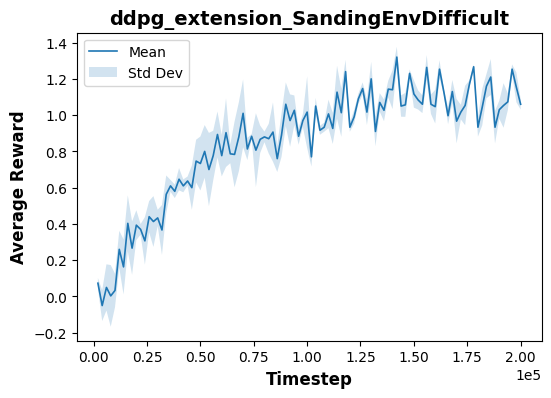

In [30]:
## Run the following code to plot PPO or DDPG's training performances
from algos.ppo_extension import PPOExtension
import warnings
warnings.filterwarnings('ignore')

# Uncomment the algorithm you chose 
implemented_algo = 'ddpg_extension' # 'ppo_extension' or 'ddpg_extension'
environment = 'difficult'

# Loop over the three difficulty levels

training_seeds = [0,1,2]

config=setup(algo=implemented_algo, env=environment, render=False)

config["seed"] = 0

agent= DDPGExtension(config) # DDPGExtension(config) or PPOExtension(config)

# plot the statistical training curves with specific random seeds
cu.plot_algorithm_training(agent.logging_dir, training_seeds, agent.env_name, implemented_algo)


## Task 3.3: Plot improved algorithm's and original's comparison performance

### Display the plots:
Display the training performance of your improvement algorithm, similarly as in task 2.3

### Paths:
Your plot should be plotted in the following paths if the code runs successfully:

- **Original vs Improved (difficult environment)**: 
  - `results/SandingEnvDifficult/compare_ddpg_ddpg_extension.pdf`
  - or 
  - `results/SandingEnvDifficult/compare_ppo_ppo_extension.pdf`
  

Using DDPGExtension with TD3



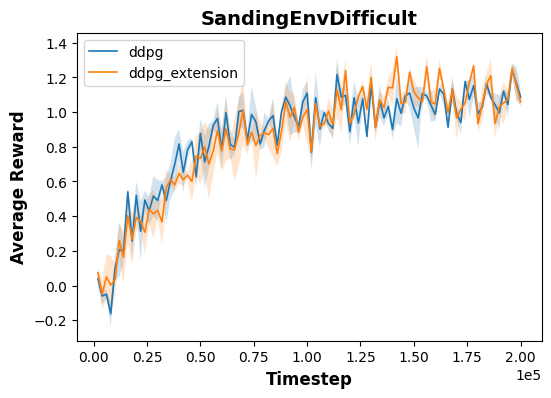

In [31]:
## Run the following code to draw the comparison plots of PPO and DDPG's training performances
from algos.ddpg_extension import DDPGExtension
import warnings
warnings.filterwarnings('ignore')

environment = 'difficult'

orgin_alo_name = 'ddpg' # 'ddpg' or 'ppo'
improved_alo_name = 'ddpg_extension' # 'ddpg_extension' or 'ppo_extension'

config=setup(algo=orgin_alo_name, env=environment, render=False)
origin_agent = DDPGAgent(config)

config=setup(algo=improved_alo_name, env=environment, render=False)
improved_agent = DDPGExtension(config)

# make the comparison plot
cu.compare_algorithm_training(origin_agent, improved_agent, seeds=[0,1,2])

Using DDPGExtension with TD3 + RS



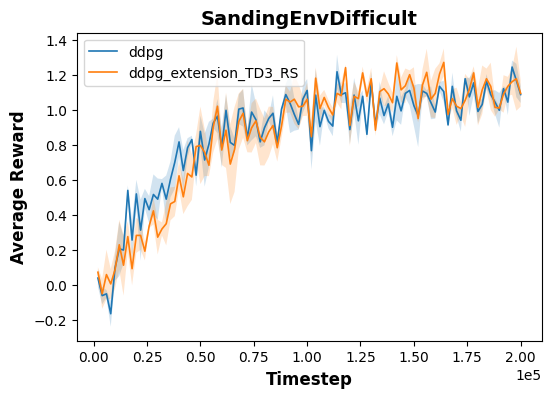

In [33]:
## Run the following code to draw the comparison plots of PPO and DDPG's training performances
from algos.ddpg_extension_TD3_RS import DDPGExtension
import warnings
warnings.filterwarnings('ignore')

environment = 'difficult'

orgin_alo_name = 'ddpg' # 'ddpg' or 'ppo'
improved_alo_name = 'ddpg_extension_TD3_RS' # 'ddpg_extension' or 'ppo_extension'

config=setup(algo=orgin_alo_name, env=environment, render=False)
origin_agent = DDPGAgent(config)

config=setup(algo=improved_alo_name, env=environment, render=False)
improved_agent = DDPGExtension(config)

# make the comparison plot
cu.compare_algorithm_training(origin_agent, improved_agent, seeds=[0,1,2])

 ---
## 9. Submitting <a id='9'></a>
Ensure that all tasks and questions are answered, and that the necessary plots are saved in the appropriate locations. Below is a list of the relevant plots and files that need to be submitted for the project work:

### 1. Model Weights
For each algorithm, you should have saved three model weights in the corresponding paths:

`'results/(environment name)/(algorithm name)/model/model_parameters_(seed number).pt'`

**Examples:**
- For a DDPG agent trained with seed number 0 in the middle-level sanding environment:
  - `'results/SandingEnvMiddle/ddpg/model/model_parameters_0.pt'`

**Submission Checklist:**
Ensure that each algorithm (ddpg, ppo, ddpg_extension, ppo_extension) has three sets of model weights (model_parameters_0, model_parameters_1, model_parameters_2) saved in the above paths.

### 2. Individual Algorithm Plots

You need to check that you have plotted the average training performances and the comparison plots for each algorithm. For submission, ensure the following figures are included:

#### Task 1.3:

- **PPO Easy**: 
  - `results/SandingEnvMiddle/PPO/logging/figure_statistical_SandingEnvEasy.pdf`
- **PPO Middle**: 
  - `results/SandingEnvMiddle/PPO/logging/figure_statistical_SandingEnvMiddle.pdf`
- **PPO Difficult**: 
  - `results/SandingEnvMiddle/PPO/logging/figure_statistical_SandingEnvDifficult.pdf`
  
  or
  
  
- **DDPG Easy**: 
  - `results/SandingEnvMiddle/DDPG/logging/figure_statistical_SandingEnvEasy.pdf`
- **DDPG Middle**: 
  - `results/SandingEnvMiddle/DDPG/logging/figure_statistical_SandingEnvMiddle.pdf`
- **DDPG Difficult**: 
  - `results/SandingEnvMiddle/DDPG/logging/figure_statistical_SandingEnvDifficult.pdf`


#### Task 2.3:

- **Improved agent for Middle-level environment**: 
  - `results/SandingEnvMiddle/ppo_extension(or ddpg_extension)/logging/figure_statistical_SandingEnvMiddle.pdf`

#### Task 2.4:

- **Original vs Improved (Middle-level Environment)**: 
  - `results/SandingEnvMiddle/compare_ddpg_ddpg_extension.pdf`
  - or 
  - `results/SandingEnvMiddle/compare_ppo_ppo_extension.pdf`
  
#### Task 3.3:

- **Improved Difficult-level environment**: 
  - `results/SandingEnvDifficult/ppo_extension(or ddpg_extension)/logging/figure_statistical_SandingEnvMiddle.pdf`

#### Task 3.4:

- **Original vs Improved (Difficult-level Environment)**: 
  - `results/SandingEnvDifficult/compare_ddpg_ddpg_extension.pdf`
  - or 
  - `results/SandingEnvDifficult/compare_ppo_ppo_extension.pdf`


## 10. Feedback <a id='10'></a>

In order to help the staff of the course as well as the forthcoming students, it would be great if you could answer the following questions in your submission:

1) How much time did the project work members in total spend on the project work? (change the ```hrs``` variable below to a floating point number representing the number of hours taken e.g. 35.43)

In [ ]:
hrs = None

2) Difficulty of each task/question from 1-5 (int or float)

In [ ]:
T1 = None   # Implementing PPO or DDPG for the sanding task (35 points)
T2 = None   # Extending PPO/DDPG to work on the easy and moderate difficulty tasks (45 points)
T3 = None   # Extending PPO/DDPG to work on the difficult task (+20 points)
Q1 = None   # Question 1 How did you extend PPO/DDPG and why? (20 points)

3) How well did you understand the content of the task/question from 1-5? (int or float)

In [ ]:
T1 = None   # Implementing PPO or DDPG for the sanding task (35 points)
T2 = None   # Extending PPO/DDPG to work on the easy and moderate difficulty tasks (45 points)
T3 = None   # Extending PPO/DDPG to work on the difficult task (+20 points)
Q1 = None   # Question 1 How did you extend PPO/DDPG and why? (20 points)

4) General feedback. Consider questions like:

    - How difficult / time consuming was the project work? What was the most difficult part?
    - What should be changed in the project work?
    - What was the most useful / interesting part in the project work?
    
Please share any additional feedback, suggestions, or comments you have about the lecture, assignment, or course content. Your input is valuable in helping us improve the learning experience.

DOUBLE CLICK HERE TO EDIT, CLEAR THIS TEXT AND ANSWER HERE